# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 24971 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all, max_distance=2)


  0% (    0 of 24971) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (    9 of 24971) |                    | Elapsed Time: 0:00:27 ETA: 21:01:11

  0% (   25 of 24971) |                     | Elapsed Time: 0:00:27 ETA: 7:37:19

  0% (   40 of 24971) |                     | Elapsed Time: 0:00:27 ETA: 4:47:52

  0% (   56 of 24971) |                     | Elapsed Time: 0:00:27 ETA: 3:27:02

  0% (   72 of 24971) |                     | Elapsed Time: 0:00:28 ETA: 0:05:37

  0% (   88 of 24971) |                     | Elapsed Time: 0:00:28 ETA: 0:05:34

  0% (  104 of 24971) |                     | Elapsed Time: 0:00:28 ETA: 0:05:29

  0% (  120 of 24971) |                     | Elapsed Time: 0:00:28 ETA: 0:05:28

  0% (  136 of 24971) |                     | Elapsed Time: 0:00:28 ETA: 0:05:27

  0% (  152 of 24971) |                     | Elapsed Time: 0:00:29 ETA: 0:05:24

  0% (  168 of 24971) |                     | Elapsed Time: 0:00:29 ETA: 0:05:24

  0% (  184 of 24971) |                     | Elapsed Time: 0:00:29 ETA: 0:05:23

  0% (  200 of 24971) |                     | Elapsed Time: 0:00:29 ETA: 0:05:22

  0% (  216 of 24971) |                     | Elapsed Time: 0:00:30 ETA: 0:05:22

  0% (  232 of 24971) |                     | Elapsed Time: 0:00:30 ETA: 0:05:22

  0% (  248 of 24971) |                     | Elapsed Time: 0:00:30 ETA: 0:05:21

  1% (  264 of 24971) |                     | Elapsed Time: 0:00:30 ETA: 0:05:21

  1% (  280 of 24971) |                     | Elapsed Time: 0:00:30 ETA: 0:05:22

  1% (  296 of 24971) |                     | Elapsed Time: 0:00:31 ETA: 0:05:22

  1% (  313 of 24971) |                     | Elapsed Time: 0:00:31 ETA: 0:05:21

  1% (  329 of 24971) |                     | Elapsed Time: 0:00:31 ETA: 0:05:21

  1% (  345 of 24971) |                     | Elapsed Time: 0:00:31 ETA: 0:05:21

  1% (  361 of 24971) |                     | Elapsed Time: 0:00:31 ETA: 0:05:19

  1% (  377 of 24971) |                     | Elapsed Time: 0:00:32 ETA: 0:05:20

  1% (  393 of 24971) |                     | Elapsed Time: 0:00:32 ETA: 0:05:19

  1% (  409 of 24971) |                     | Elapsed Time: 0:00:32 ETA: 0:05:20

  1% (  425 of 24971) |                     | Elapsed Time: 0:00:32 ETA: 0:05:20

  1% (  441 of 24971) |                     | Elapsed Time: 0:00:32 ETA: 0:05:19

  1% (  457 of 24971) |                     | Elapsed Time: 0:00:33 ETA: 0:05:19

  1% (  473 of 24971) |                     | Elapsed Time: 0:00:33 ETA: 0:05:18

  1% (  489 of 24971) |                     | Elapsed Time: 0:00:33 ETA: 0:05:17

  2% (  505 of 24971) |                     | Elapsed Time: 0:00:33 ETA: 0:05:16

  2% (  521 of 24971) |                     | Elapsed Time: 0:00:33 ETA: 0:05:17

  2% (  537 of 24971) |                     | Elapsed Time: 0:00:34 ETA: 0:05:16

  2% (  553 of 24971) |                     | Elapsed Time: 0:00:34 ETA: 0:05:16

  2% (  569 of 24971) |                     | Elapsed Time: 0:00:34 ETA: 0:05:17

  2% (  586 of 24971) |                     | Elapsed Time: 0:00:34 ETA: 0:05:12

  2% (  601 of 24971) |                     | Elapsed Time: 0:00:35 ETA: 0:05:17

  2% (  625 of 24971) |                     | Elapsed Time: 0:00:35 ETA: 0:05:07

  2% (  642 of 24971) |                     | Elapsed Time: 0:00:35 ETA: 0:05:04

  2% (  658 of 24971) |                     | Elapsed Time: 0:00:35 ETA: 0:05:03

  2% (  674 of 24971) |                     | Elapsed Time: 0:00:35 ETA: 0:05:07

  2% (  690 of 24971) |                     | Elapsed Time: 0:00:36 ETA: 0:05:12

  2% (  706 of 24971) |                     | Elapsed Time: 0:00:36 ETA: 0:05:21

  2% (  722 of 24971) |                     | Elapsed Time: 0:00:36 ETA: 0:05:22

  2% (  739 of 24971) |                     | Elapsed Time: 0:00:36 ETA: 0:05:17

  3% (  755 of 24971) |                     | Elapsed Time: 0:00:37 ETA: 0:05:14

  3% (  770 of 24971) |                     | Elapsed Time: 0:00:37 ETA: 0:05:19

  3% (  786 of 24971) |                     | Elapsed Time: 0:00:37 ETA: 0:05:21

  3% (  802 of 24971) |                     | Elapsed Time: 0:00:37 ETA: 0:05:23

  3% (  820 of 24971) |                     | Elapsed Time: 0:00:37 ETA: 0:05:20

  3% (  836 of 24971) |                     | Elapsed Time: 0:00:38 ETA: 0:09:14

  3% (  854 of 24971) |                     | Elapsed Time: 0:00:39 ETA: 0:08:58

  3% (  872 of 24971) |                     | Elapsed Time: 0:00:39 ETA: 0:08:43

  3% (  890 of 24971) |                     | Elapsed Time: 0:00:39 ETA: 0:08:34

  3% (  908 of 24971) |                     | Elapsed Time: 0:00:39 ETA: 0:04:45

  3% (  925 of 24971) |                     | Elapsed Time: 0:00:39 ETA: 0:04:48

  3% (  945 of 24971) |                     | Elapsed Time: 0:00:40 ETA: 0:04:53

  3% (  961 of 24971) |                     | Elapsed Time: 0:00:40 ETA: 0:04:58

  3% (  977 of 24971) |                     | Elapsed Time: 0:00:40 ETA: 0:05:03

  3% (  993 of 24971) |                     | Elapsed Time: 0:00:40 ETA: 0:05:06

  4% ( 1009 of 24971) |                     | Elapsed Time: 0:00:40 ETA: 0:05:08

  4% ( 1025 of 24971) |                     | Elapsed Time: 0:00:41 ETA: 0:05:06

  4% ( 1041 of 24971) |                     | Elapsed Time: 0:00:41 ETA: 0:05:07

  4% ( 1057 of 24971) |                     | Elapsed Time: 0:00:41 ETA: 0:05:08

  4% ( 1073 of 24971) |                     | Elapsed Time: 0:00:41 ETA: 0:05:06

  4% ( 1089 of 24971) |                     | Elapsed Time: 0:00:41 ETA: 0:05:06

  4% ( 1105 of 24971) |                     | Elapsed Time: 0:00:42 ETA: 0:05:05

  4% ( 1121 of 24971) |                     | Elapsed Time: 0:00:42 ETA: 0:05:04

  4% ( 1137 of 24971) |                     | Elapsed Time: 0:00:42 ETA: 0:05:03

  4% ( 1153 of 24971) |                     | Elapsed Time: 0:00:42 ETA: 0:05:02

  4% ( 1170 of 24971) |                     | Elapsed Time: 0:00:43 ETA: 0:04:59

  4% ( 1188 of 24971) |                     | Elapsed Time: 0:00:43 ETA: 0:04:51

  4% ( 1204 of 24971) |#                    | Elapsed Time: 0:00:43 ETA: 0:04:52

  4% ( 1222 of 24971) |#                    | Elapsed Time: 0:00:43 ETA: 0:04:47

  4% ( 1240 of 24971) |#                    | Elapsed Time: 0:00:43 ETA: 0:04:42

  5% ( 1257 of 24971) |#                    | Elapsed Time: 0:00:44 ETA: 0:04:52

  5% ( 1273 of 24971) |#                    | Elapsed Time: 0:00:44 ETA: 0:05:02

  5% ( 1291 of 24971) |#                    | Elapsed Time: 0:00:44 ETA: 0:05:00

  5% ( 1307 of 24971) |#                    | Elapsed Time: 0:00:44 ETA: 0:05:10

  5% ( 1323 of 24971) |#                    | Elapsed Time: 0:00:44 ETA: 0:05:13

  5% ( 1339 of 24971) |#                    | Elapsed Time: 0:00:45 ETA: 0:05:10

  5% ( 1355 of 24971) |#                    | Elapsed Time: 0:00:45 ETA: 0:05:12

  5% ( 1371 of 24971) |#                    | Elapsed Time: 0:00:45 ETA: 0:05:14

  5% ( 1387 of 24971) |#                    | Elapsed Time: 0:00:45 ETA: 0:05:15

  5% ( 1403 of 24971) |#                    | Elapsed Time: 0:00:46 ETA: 0:05:18

  5% ( 1419 of 24971) |#                    | Elapsed Time: 0:00:46 ETA: 0:05:21

  5% ( 1434 of 24971) |#                    | Elapsed Time: 0:00:46 ETA: 0:05:24

  5% ( 1450 of 24971) |#                    | Elapsed Time: 0:00:46 ETA: 0:05:26

  5% ( 1466 of 24971) |#                    | Elapsed Time: 0:00:46 ETA: 0:05:26

  5% ( 1481 of 24971) |#                    | Elapsed Time: 0:00:47 ETA: 0:05:26

  5% ( 1497 of 24971) |#                    | Elapsed Time: 0:00:47 ETA: 0:05:22

  6% ( 1513 of 24971) |#                    | Elapsed Time: 0:00:47 ETA: 0:05:21

  6% ( 1529 of 24971) |#                    | Elapsed Time: 0:00:47 ETA: 0:05:20

  6% ( 1545 of 24971) |#                    | Elapsed Time: 0:00:47 ETA: 0:05:15

  6% ( 1561 of 24971) |#                    | Elapsed Time: 0:00:48 ETA: 0:05:13

  6% ( 1577 of 24971) |#                    | Elapsed Time: 0:00:48 ETA: 0:05:11

  6% ( 1593 of 24971) |#                    | Elapsed Time: 0:00:48 ETA: 0:05:10

  6% ( 1610 of 24971) |#                    | Elapsed Time: 0:00:48 ETA: 0:05:03

  6% ( 1628 of 24971) |#                    | Elapsed Time: 0:00:49 ETA: 0:04:57

  6% ( 1644 of 24971) |#                    | Elapsed Time: 0:00:49 ETA: 0:04:56

  6% ( 1660 of 24971) |#                    | Elapsed Time: 0:00:49 ETA: 0:04:56

  6% ( 1676 of 24971) |#                    | Elapsed Time: 0:00:49 ETA: 0:04:58

  6% ( 1692 of 24971) |#                    | Elapsed Time: 0:00:49 ETA: 0:05:06

  6% ( 1708 of 24971) |#                    | Elapsed Time: 0:00:50 ETA: 0:05:12

  6% ( 1723 of 24971) |#                    | Elapsed Time: 0:00:50 ETA: 0:05:15

  6% ( 1738 of 24971) |#                    | Elapsed Time: 0:00:50 ETA: 0:05:16

  7% ( 1756 of 24971) |#                    | Elapsed Time: 0:00:50 ETA: 0:05:05

  7% ( 1772 of 24971) |#                    | Elapsed Time: 0:00:50 ETA: 0:05:03

  7% ( 1787 of 24971) |#                    | Elapsed Time: 0:00:51 ETA: 0:05:05

  7% ( 1805 of 24971) |#                    | Elapsed Time: 0:00:51 ETA: 0:04:53

  7% ( 1822 of 24971) |#                    | Elapsed Time: 0:00:51 ETA: 0:04:57

  7% ( 1838 of 24971) |#                    | Elapsed Time: 0:00:51 ETA: 0:05:03

  7% ( 1856 of 24971) |#                    | Elapsed Time: 0:00:52 ETA: 0:04:52

  7% ( 1873 of 24971) |#                    | Elapsed Time: 0:00:52 ETA: 0:04:47

  7% ( 1891 of 24971) |#                    | Elapsed Time: 0:00:52 ETA: 0:04:45

  7% ( 1909 of 24971) |#                    | Elapsed Time: 0:00:52 ETA: 0:04:40

  7% ( 1926 of 24971) |#                    | Elapsed Time: 0:00:52 ETA: 0:04:37

  7% ( 1944 of 24971) |#                    | Elapsed Time: 0:00:53 ETA: 0:04:35

  7% ( 1962 of 24971) |#                    | Elapsed Time: 0:00:53 ETA: 0:04:35

  7% ( 1980 of 24971) |#                    | Elapsed Time: 0:00:53 ETA: 0:04:35

  8% ( 1998 of 24971) |#                    | Elapsed Time: 0:00:53 ETA: 0:04:32

  8% ( 2016 of 24971) |#                    | Elapsed Time: 0:00:53 ETA: 0:04:29

  8% ( 2034 of 24971) |#                    | Elapsed Time: 0:00:54 ETA: 0:04:28

  8% ( 2052 of 24971) |#                    | Elapsed Time: 0:00:54 ETA: 0:04:27

  8% ( 2070 of 24971) |#                    | Elapsed Time: 0:00:54 ETA: 0:04:25

  8% ( 2088 of 24971) |#                    | Elapsed Time: 0:00:54 ETA: 0:04:24

  8% ( 2105 of 24971) |#                    | Elapsed Time: 0:00:54 ETA: 0:04:28

  8% ( 2122 of 24971) |#                    | Elapsed Time: 0:00:55 ETA: 0:04:31

  8% ( 2140 of 24971) |#                    | Elapsed Time: 0:00:55 ETA: 0:04:33

  8% ( 2158 of 24971) |#                    | Elapsed Time: 0:00:55 ETA: 0:04:35

  8% ( 2176 of 24971) |#                    | Elapsed Time: 0:00:55 ETA: 0:04:36

  8% ( 2193 of 24971) |#                    | Elapsed Time: 0:00:56 ETA: 0:04:38

  8% ( 2208 of 24971) |#                    | Elapsed Time: 0:00:56 ETA: 0:04:49

  8% ( 2224 of 24971) |#                    | Elapsed Time: 0:00:56 ETA: 0:04:53

  8% ( 2240 of 24971) |#                    | Elapsed Time: 0:00:56 ETA: 0:05:00

  9% ( 2256 of 24971) |#                    | Elapsed Time: 0:00:56 ETA: 0:05:00

  9% ( 2272 of 24971) |#                    | Elapsed Time: 0:00:57 ETA: 0:04:53

  9% ( 2288 of 24971) |#                    | Elapsed Time: 0:00:57 ETA: 0:04:50

  9% ( 2304 of 24971) |#                    | Elapsed Time: 0:00:57 ETA: 0:04:49

  9% ( 2320 of 24971) |#                    | Elapsed Time: 0:00:57 ETA: 0:04:50

  9% ( 2336 of 24971) |#                    | Elapsed Time: 0:00:57 ETA: 0:04:50

  9% ( 2352 of 24971) |#                    | Elapsed Time: 0:00:58 ETA: 0:04:51

  9% ( 2368 of 24971) |#                    | Elapsed Time: 0:00:58 ETA: 0:04:56

  9% ( 2383 of 24971) |##                   | Elapsed Time: 0:00:58 ETA: 0:05:01

  9% ( 2401 of 24971) |##                   | Elapsed Time: 0:00:58 ETA: 0:04:52

  9% ( 2419 of 24971) |##                   | Elapsed Time: 0:00:58 ETA: 0:04:45

  9% ( 2437 of 24971) |##                   | Elapsed Time: 0:00:59 ETA: 0:04:36

  9% ( 2455 of 24971) |##                   | Elapsed Time: 0:00:59 ETA: 0:04:32

  9% ( 2473 of 24971) |##                   | Elapsed Time: 0:00:59 ETA: 0:04:28

 10% ( 2498 of 24971) |##                   | Elapsed Time: 0:00:59 ETA: 0:04:32

 10% ( 2515 of 24971) |##                   | Elapsed Time: 0:01:00 ETA: 0:04:36

 10% ( 2530 of 24971) |##                   | Elapsed Time: 0:01:00 ETA: 0:04:42

 10% ( 2547 of 24971) |##                   | Elapsed Time: 0:01:00 ETA: 0:04:45

 10% ( 2565 of 24971) |##                   | Elapsed Time: 0:01:00 ETA: 0:04:44

 10% ( 2582 of 24971) |##                   | Elapsed Time: 0:01:00 ETA: 0:04:43

 10% ( 2598 of 24971) |##                   | Elapsed Time: 0:01:01 ETA: 0:04:45

 10% ( 2613 of 24971) |##                   | Elapsed Time: 0:01:01 ETA: 0:04:49

 10% ( 2628 of 24971) |##                   | Elapsed Time: 0:01:01 ETA: 0:04:57

 10% ( 2644 of 24971) |##                   | Elapsed Time: 0:01:01 ETA: 0:05:01

 10% ( 2661 of 24971) |##                   | Elapsed Time: 0:01:02 ETA: 0:05:01

 10% ( 2678 of 24971) |##                   | Elapsed Time: 0:01:02 ETA: 0:04:57

 10% ( 2696 of 24971) |##                   | Elapsed Time: 0:01:02 ETA: 0:04:43

 10% ( 2711 of 24971) |##                   | Elapsed Time: 0:01:02 ETA: 0:04:42

 10% ( 2727 of 24971) |##                   | Elapsed Time: 0:01:02 ETA: 0:04:41

 10% ( 2744 of 24971) |##                   | Elapsed Time: 0:01:03 ETA: 0:04:42

 11% ( 2760 of 24971) |##                   | Elapsed Time: 0:01:03 ETA: 0:04:48

 11% ( 2776 of 24971) |##                   | Elapsed Time: 0:01:03 ETA: 0:04:53

 11% ( 2793 of 24971) |##                   | Elapsed Time: 0:01:03 ETA: 0:04:45

 11% ( 2810 of 24971) |##                   | Elapsed Time: 0:01:03 ETA: 0:04:42

 11% ( 2826 of 24971) |##                   | Elapsed Time: 0:01:04 ETA: 0:04:47

 11% ( 2843 of 24971) |##                   | Elapsed Time: 0:01:04 ETA: 0:04:40

 11% ( 2861 of 24971) |##                   | Elapsed Time: 0:01:04 ETA: 0:04:36

 11% ( 2879 of 24971) |##                   | Elapsed Time: 0:01:04 ETA: 0:04:37

 11% ( 2894 of 24971) |##                   | Elapsed Time: 0:01:05 ETA: 0:04:37

 11% ( 2910 of 24971) |##                   | Elapsed Time: 0:01:05 ETA: 0:04:38

 11% ( 2926 of 24971) |##                   | Elapsed Time: 0:01:05 ETA: 0:04:44

 11% ( 2941 of 24971) |##                   | Elapsed Time: 0:01:05 ETA: 0:04:53

 11% ( 2956 of 24971) |##                   | Elapsed Time: 0:01:05 ETA: 0:05:00

 11% ( 2972 of 24971) |##                   | Elapsed Time: 0:01:06 ETA: 0:05:01

 11% ( 2988 of 24971) |##                   | Elapsed Time: 0:01:06 ETA: 0:05:04

 12% ( 3004 of 24971) |##                   | Elapsed Time: 0:01:06 ETA: 0:05:06

 12% ( 3020 of 24971) |##                   | Elapsed Time: 0:01:06 ETA: 0:05:05

 12% ( 3036 of 24971) |##                   | Elapsed Time: 0:01:06 ETA: 0:05:03

 12% ( 3051 of 24971) |##                   | Elapsed Time: 0:01:07 ETA: 0:05:07

 12% ( 3067 of 24971) |##                   | Elapsed Time: 0:01:07 ETA: 0:05:06

 12% ( 3082 of 24971) |##                   | Elapsed Time: 0:01:07 ETA: 0:05:06

 12% ( 3097 of 24971) |##                   | Elapsed Time: 0:01:07 ETA: 0:05:08

 12% ( 3122 of 24971) |##                   | Elapsed Time: 0:01:08 ETA: 0:04:59

 12% ( 3138 of 24971) |##                   | Elapsed Time: 0:01:08 ETA: 0:04:49

 12% ( 3154 of 24971) |##                   | Elapsed Time: 0:01:08 ETA: 0:04:46

 12% ( 3169 of 24971) |##                   | Elapsed Time: 0:01:08 ETA: 0:04:44

 12% ( 3187 of 24971) |##                   | Elapsed Time: 0:01:08 ETA: 0:04:34

 12% ( 3203 of 24971) |##                   | Elapsed Time: 0:01:09 ETA: 0:04:43

 12% ( 3220 of 24971) |##                   | Elapsed Time: 0:01:09 ETA: 0:04:40

 12% ( 3236 of 24971) |##                   | Elapsed Time: 0:01:09 ETA: 0:04:38

 13% ( 3253 of 24971) |##                   | Elapsed Time: 0:01:09 ETA: 0:04:38

 13% ( 3269 of 24971) |##                   | Elapsed Time: 0:01:10 ETA: 0:04:41

 13% ( 3285 of 24971) |##                   | Elapsed Time: 0:01:10 ETA: 0:04:42

 13% ( 3302 of 24971) |##                   | Elapsed Time: 0:01:10 ETA: 0:04:40

 13% ( 3319 of 24971) |##                   | Elapsed Time: 0:01:10 ETA: 0:04:37

 13% ( 3335 of 24971) |##                   | Elapsed Time: 0:01:10 ETA: 0:04:38

 13% ( 3351 of 24971) |##                   | Elapsed Time: 0:01:11 ETA: 0:04:39

 13% ( 3367 of 24971) |##                   | Elapsed Time: 0:01:11 ETA: 0:04:39

 13% ( 3383 of 24971) |##                   | Elapsed Time: 0:01:11 ETA: 0:04:40

 13% ( 3399 of 24971) |##                   | Elapsed Time: 0:01:11 ETA: 0:04:44

 13% ( 3415 of 24971) |##                   | Elapsed Time: 0:01:11 ETA: 0:04:42

 13% ( 3434 of 24971) |##                   | Elapsed Time: 0:01:12 ETA: 0:04:37

 13% ( 3452 of 24971) |##                   | Elapsed Time: 0:01:12 ETA: 0:04:31

 13% ( 3470 of 24971) |##                   | Elapsed Time: 0:01:12 ETA: 0:04:26

 13% ( 3488 of 24971) |##                   | Elapsed Time: 0:01:12 ETA: 0:04:22

 14% ( 3504 of 24971) |##                   | Elapsed Time: 0:01:13 ETA: 0:04:23

 14% ( 3521 of 24971) |##                   | Elapsed Time: 0:01:13 ETA: 0:04:24

 14% ( 3539 of 24971) |##                   | Elapsed Time: 0:01:13 ETA: 0:04:23

 14% ( 3556 of 24971) |##                   | Elapsed Time: 0:01:13 ETA: 0:04:26

 14% ( 3573 of 24971) |###                  | Elapsed Time: 0:01:13 ETA: 0:04:25

 14% ( 3590 of 24971) |###                  | Elapsed Time: 0:01:14 ETA: 0:04:22

 14% ( 3607 of 24971) |###                  | Elapsed Time: 0:01:14 ETA: 0:04:25

 14% ( 3625 of 24971) |###                  | Elapsed Time: 0:01:14 ETA: 0:04:27

 14% ( 3641 of 24971) |###                  | Elapsed Time: 0:01:14 ETA: 0:04:31

 14% ( 3659 of 24971) |###                  | Elapsed Time: 0:01:14 ETA: 0:04:29

 14% ( 3677 of 24971) |###                  | Elapsed Time: 0:01:15 ETA: 0:04:28

 14% ( 3694 of 24971) |###                  | Elapsed Time: 0:01:15 ETA: 0:04:27

 14% ( 3710 of 24971) |###                  | Elapsed Time: 0:01:15 ETA: 0:04:31

 14% ( 3726 of 24971) |###                  | Elapsed Time: 0:01:15 ETA: 0:04:29

 15% ( 3746 of 24971) |###                  | Elapsed Time: 0:01:16 ETA: 0:04:31

 15% ( 3763 of 24971) |###                  | Elapsed Time: 0:01:16 ETA: 0:04:36

 15% ( 3778 of 24971) |###                  | Elapsed Time: 0:01:16 ETA: 0:04:39

 15% ( 3795 of 24971) |###                  | Elapsed Time: 0:01:16 ETA: 0:04:37

 15% ( 3813 of 24971) |###                  | Elapsed Time: 0:01:16 ETA: 0:04:31

 15% ( 3831 of 24971) |###                  | Elapsed Time: 0:01:17 ETA: 0:04:27

 15% ( 3849 of 24971) |###                  | Elapsed Time: 0:01:17 ETA: 0:04:16

 15% ( 3867 of 24971) |###                  | Elapsed Time: 0:01:17 ETA: 0:04:09

 15% ( 3874 of 24971) |###                  | Elapsed Time: 0:01:17 ETA: 0:04:14

 15% ( 3884 of 24971) |###                  | Elapsed Time: 0:01:18 ETA: 0:08:56

 15% ( 3899 of 24971) |###                  | Elapsed Time: 0:01:18 ETA: 0:09:17

 15% ( 3913 of 24971) |###                  | Elapsed Time: 0:01:19 ETA: 0:09:50

 15% ( 3930 of 24971) |###                  | Elapsed Time: 0:01:19 ETA: 0:10:02

 15% ( 3945 of 24971) |###                  | Elapsed Time: 0:01:19 ETA: 0:04:46

 15% ( 3960 of 24971) |###                  | Elapsed Time: 0:01:19 ETA: 0:04:47

 15% ( 3976 of 24971) |###                  | Elapsed Time: 0:01:20 ETA: 0:04:45

 15% ( 3992 of 24971) |###                  | Elapsed Time: 0:01:20 ETA: 0:04:41

 16% ( 4008 of 24971) |###                  | Elapsed Time: 0:01:20 ETA: 0:04:44

 16% ( 4024 of 24971) |###                  | Elapsed Time: 0:01:20 ETA: 0:04:34

 16% ( 4039 of 24971) |###                  | Elapsed Time: 0:01:20 ETA: 0:04:38

 16% ( 4058 of 24971) |###                  | Elapsed Time: 0:01:21 ETA: 0:04:33

 16% ( 4076 of 24971) |###                  | Elapsed Time: 0:01:21 ETA: 0:04:24

 16% ( 4094 of 24971) |###                  | Elapsed Time: 0:01:21 ETA: 0:04:19

 16% ( 4112 of 24971) |###                  | Elapsed Time: 0:01:21 ETA: 0:04:14

 16% ( 4130 of 24971) |###                  | Elapsed Time: 0:01:21 ETA: 0:04:09

 16% ( 4147 of 24971) |###                  | Elapsed Time: 0:01:22 ETA: 0:04:15

 16% ( 4165 of 24971) |###                  | Elapsed Time: 0:01:22 ETA: 0:04:17

 16% ( 4183 of 24971) |###                  | Elapsed Time: 0:01:22 ETA: 0:04:19

 16% ( 4200 of 24971) |###                  | Elapsed Time: 0:01:22 ETA: 0:04:18

 16% ( 4216 of 24971) |###                  | Elapsed Time: 0:01:23 ETA: 0:04:22

 16% ( 4232 of 24971) |###                  | Elapsed Time: 0:01:23 ETA: 0:04:21

 17% ( 4247 of 24971) |###                  | Elapsed Time: 0:01:23 ETA: 0:04:32

 17% ( 4265 of 24971) |###                  | Elapsed Time: 0:01:23 ETA: 0:04:31

 17% ( 4282 of 24971) |###                  | Elapsed Time: 0:01:23 ETA: 0:04:31

 17% ( 4297 of 24971) |###                  | Elapsed Time: 0:01:24 ETA: 0:04:36

 17% ( 4313 of 24971) |###                  | Elapsed Time: 0:01:24 ETA: 0:04:35

 17% ( 4330 of 24971) |###                  | Elapsed Time: 0:01:24 ETA: 0:04:27

 17% ( 4347 of 24971) |###                  | Elapsed Time: 0:01:24 ETA: 0:04:27

 17% ( 4363 of 24971) |###                  | Elapsed Time: 0:01:24 ETA: 0:04:29

 17% ( 4379 of 24971) |###                  | Elapsed Time: 0:01:25 ETA: 0:04:24

 17% ( 4397 of 24971) |###                  | Elapsed Time: 0:01:25 ETA: 0:04:19

 17% ( 4414 of 24971) |###                  | Elapsed Time: 0:01:25 ETA: 0:04:23

 17% ( 4430 of 24971) |###                  | Elapsed Time: 0:01:25 ETA: 0:04:24

 17% ( 4447 of 24971) |###                  | Elapsed Time: 0:01:26 ETA: 0:04:15

 17% ( 4462 of 24971) |###                  | Elapsed Time: 0:01:26 ETA: 0:04:25

 17% ( 4476 of 24971) |###                  | Elapsed Time: 0:01:26 ETA: 0:04:40

 17% ( 4490 of 24971) |###                  | Elapsed Time: 0:01:26 ETA: 0:04:54

 18% ( 4504 of 24971) |###                  | Elapsed Time: 0:01:26 ETA: 0:05:07

 18% ( 4518 of 24971) |###                  | Elapsed Time: 0:01:27 ETA: 0:05:18

 18% ( 4532 of 24971) |###                  | Elapsed Time: 0:01:27 ETA: 0:05:13

 18% ( 4548 of 24971) |###                  | Elapsed Time: 0:01:27 ETA: 0:05:01

 18% ( 4566 of 24971) |###                  | Elapsed Time: 0:01:27 ETA: 0:04:45

 18% ( 4583 of 24971) |###                  | Elapsed Time: 0:01:27 ETA: 0:04:34

 18% ( 4598 of 24971) |###                  | Elapsed Time: 0:01:28 ETA: 0:04:30

 18% ( 4614 of 24971) |###                  | Elapsed Time: 0:01:28 ETA: 0:04:23

 18% ( 4631 of 24971) |###                  | Elapsed Time: 0:01:28 ETA: 0:04:26

 18% ( 4647 of 24971) |###                  | Elapsed Time: 0:01:28 ETA: 0:04:34

 18% ( 4663 of 24971) |###                  | Elapsed Time: 0:01:29 ETA: 0:04:34

 18% ( 4683 of 24971) |###                  | Elapsed Time: 0:01:29 ETA: 0:04:27

 18% ( 4701 of 24971) |###                  | Elapsed Time: 0:01:29 ETA: 0:04:21

 18% ( 4719 of 24971) |###                  | Elapsed Time: 0:01:29 ETA: 0:04:18

 18% ( 4737 of 24971) |###                  | Elapsed Time: 0:01:29 ETA: 0:04:12

 19% ( 4755 of 24971) |###                  | Elapsed Time: 0:01:30 ETA: 0:04:08

 19% ( 4773 of 24971) |####                 | Elapsed Time: 0:01:30 ETA: 0:04:08

 19% ( 4791 of 24971) |####                 | Elapsed Time: 0:01:30 ETA: 0:04:07

 19% ( 4808 of 24971) |####                 | Elapsed Time: 0:01:30 ETA: 0:04:07

 19% ( 4825 of 24971) |####                 | Elapsed Time: 0:01:31 ETA: 0:04:08

 19% ( 4842 of 24971) |####                 | Elapsed Time: 0:01:31 ETA: 0:04:09

 19% ( 4860 of 24971) |####                 | Elapsed Time: 0:01:31 ETA: 0:04:08

 19% ( 4877 of 24971) |####                 | Elapsed Time: 0:01:31 ETA: 0:04:12

 19% ( 4893 of 24971) |####                 | Elapsed Time: 0:01:31 ETA: 0:04:13

 19% ( 4909 of 24971) |####                 | Elapsed Time: 0:01:32 ETA: 0:04:16

 19% ( 4925 of 24971) |####                 | Elapsed Time: 0:01:32 ETA: 0:04:21

 19% ( 4941 of 24971) |####                 | Elapsed Time: 0:01:32 ETA: 0:04:26

 19% ( 4956 of 24971) |####                 | Elapsed Time: 0:01:32 ETA: 0:04:29

 19% ( 4972 of 24971) |####                 | Elapsed Time: 0:01:32 ETA: 0:04:33

 19% ( 4988 of 24971) |####                 | Elapsed Time: 0:01:33 ETA: 0:04:33

 20% ( 5003 of 24971) |####                 | Elapsed Time: 0:01:33 ETA: 0:04:32

 20% ( 5019 of 24971) |####                 | Elapsed Time: 0:01:33 ETA: 0:04:32

 20% ( 5035 of 24971) |####                 | Elapsed Time: 0:01:33 ETA: 0:04:30

 20% ( 5051 of 24971) |####                 | Elapsed Time: 0:01:34 ETA: 0:04:29

 20% ( 5066 of 24971) |####                 | Elapsed Time: 0:01:34 ETA: 0:04:33

 20% ( 5082 of 24971) |####                 | Elapsed Time: 0:01:34 ETA: 0:04:35

 20% ( 5098 of 24971) |####                 | Elapsed Time: 0:01:34 ETA: 0:04:35

 20% ( 5114 of 24971) |####                 | Elapsed Time: 0:01:34 ETA: 0:04:34

 20% ( 5130 of 24971) |####                 | Elapsed Time: 0:01:35 ETA: 0:04:34

 20% ( 5146 of 24971) |####                 | Elapsed Time: 0:01:35 ETA: 0:04:28

 20% ( 5162 of 24971) |####                 | Elapsed Time: 0:01:35 ETA: 0:04:26

 20% ( 5177 of 24971) |####                 | Elapsed Time: 0:01:35 ETA: 0:04:27

 20% ( 5193 of 24971) |####                 | Elapsed Time: 0:01:36 ETA: 0:04:28

 20% ( 5209 of 24971) |####                 | Elapsed Time: 0:01:36 ETA: 0:04:29

 20% ( 5225 of 24971) |####                 | Elapsed Time: 0:01:36 ETA: 0:04:30

 20% ( 5241 of 24971) |####                 | Elapsed Time: 0:01:36 ETA: 0:04:32

 21% ( 5258 of 24971) |####                 | Elapsed Time: 0:01:36 ETA: 0:04:25

 21% ( 5276 of 24971) |####                 | Elapsed Time: 0:01:37 ETA: 0:04:17

 21% ( 5293 of 24971) |####                 | Elapsed Time: 0:01:37 ETA: 0:04:13

 21% ( 5315 of 24971) |####                 | Elapsed Time: 0:01:37 ETA: 0:04:07

 21% ( 5332 of 24971) |####                 | Elapsed Time: 0:01:37 ETA: 0:04:02

 21% ( 5348 of 24971) |####                 | Elapsed Time: 0:01:38 ETA: 0:04:09

 21% ( 5365 of 24971) |####                 | Elapsed Time: 0:01:38 ETA: 0:04:10

 21% ( 5383 of 24971) |####                 | Elapsed Time: 0:01:38 ETA: 0:04:08

 21% ( 5401 of 24971) |####                 | Elapsed Time: 0:01:38 ETA: 0:04:08

 21% ( 5417 of 24971) |####                 | Elapsed Time: 0:01:38 ETA: 0:04:10

 21% ( 5435 of 24971) |####                 | Elapsed Time: 0:01:39 ETA: 0:04:03

 21% ( 5453 of 24971) |####                 | Elapsed Time: 0:01:39 ETA: 0:04:02

 21% ( 5471 of 24971) |####                 | Elapsed Time: 0:01:39 ETA: 0:04:01

 21% ( 5489 of 24971) |####                 | Elapsed Time: 0:01:39 ETA: 0:03:59

 22% ( 5507 of 24971) |####                 | Elapsed Time: 0:01:39 ETA: 0:03:57

 22% ( 5525 of 24971) |####                 | Elapsed Time: 0:01:40 ETA: 0:03:56

 22% ( 5540 of 24971) |####                 | Elapsed Time: 0:01:40 ETA: 0:04:03

 22% ( 5557 of 24971) |####                 | Elapsed Time: 0:01:40 ETA: 0:04:02

 22% ( 5574 of 24971) |####                 | Elapsed Time: 0:01:40 ETA: 0:04:03

 22% ( 5592 of 24971) |####                 | Elapsed Time: 0:01:41 ETA: 0:04:03

 22% ( 5610 of 24971) |####                 | Elapsed Time: 0:01:41 ETA: 0:03:54

 22% ( 5628 of 24971) |####                 | Elapsed Time: 0:01:41 ETA: 0:03:54

 22% ( 5646 of 24971) |####                 | Elapsed Time: 0:01:41 ETA: 0:03:55

 22% ( 5663 of 24971) |####                 | Elapsed Time: 0:01:41 ETA: 0:03:55

 22% ( 5681 of 24971) |####                 | Elapsed Time: 0:01:42 ETA: 0:03:57

 22% ( 5699 of 24971) |####                 | Elapsed Time: 0:01:42 ETA: 0:03:58

 22% ( 5717 of 24971) |####                 | Elapsed Time: 0:01:42 ETA: 0:03:55

 22% ( 5734 of 24971) |####                 | Elapsed Time: 0:01:42 ETA: 0:03:59

 23% ( 5750 of 24971) |####                 | Elapsed Time: 0:01:43 ETA: 0:04:04

 23% ( 5765 of 24971) |####                 | Elapsed Time: 0:01:43 ETA: 0:04:11

 23% ( 5783 of 24971) |####                 | Elapsed Time: 0:01:43 ETA: 0:04:10

 23% ( 5801 of 24971) |####                 | Elapsed Time: 0:01:43 ETA: 0:04:11

 23% ( 5817 of 24971) |####                 | Elapsed Time: 0:01:43 ETA: 0:04:07

 23% ( 5833 of 24971) |####                 | Elapsed Time: 0:01:44 ETA: 0:04:08

 23% ( 5848 of 24971) |####                 | Elapsed Time: 0:01:44 ETA: 0:04:14

 23% ( 5865 of 24971) |####                 | Elapsed Time: 0:01:44 ETA: 0:04:17

 23% ( 5883 of 24971) |####                 | Elapsed Time: 0:01:44 ETA: 0:04:10

 23% ( 5901 of 24971) |####                 | Elapsed Time: 0:01:44 ETA: 0:04:00

 23% ( 5917 of 24971) |####                 | Elapsed Time: 0:01:45 ETA: 0:03:58

 23% ( 5939 of 24971) |####                 | Elapsed Time: 0:01:45 ETA: 0:04:01

 23% ( 5955 of 24971) |#####                | Elapsed Time: 0:01:45 ETA: 0:04:09

 23% ( 5972 of 24971) |#####                | Elapsed Time: 0:01:45 ETA: 0:04:12

 23% ( 5990 of 24971) |#####                | Elapsed Time: 0:01:46 ETA: 0:04:09

 24% ( 6007 of 24971) |#####                | Elapsed Time: 0:01:46 ETA: 0:04:04

 24% ( 6025 of 24971) |#####                | Elapsed Time: 0:01:46 ETA: 0:03:54

 24% ( 6043 of 24971) |#####                | Elapsed Time: 0:01:46 ETA: 0:03:51

 24% ( 6058 of 24971) |#####                | Elapsed Time: 0:01:46 ETA: 0:03:55

 24% ( 6075 of 24971) |#####                | Elapsed Time: 0:01:47 ETA: 0:03:56

 24% ( 6092 of 24971) |#####                | Elapsed Time: 0:01:47 ETA: 0:03:56

 24% ( 6107 of 24971) |#####                | Elapsed Time: 0:01:47 ETA: 0:04:04

 24% ( 6121 of 24971) |#####                | Elapsed Time: 0:01:47 ETA: 0:04:09

 24% ( 6137 of 24971) |#####                | Elapsed Time: 0:01:48 ETA: 0:04:14

 24% ( 6153 of 24971) |#####                | Elapsed Time: 0:01:48 ETA: 0:04:24

 24% ( 6168 of 24971) |#####                | Elapsed Time: 0:01:48 ETA: 0:04:26

 24% ( 6184 of 24971) |#####                | Elapsed Time: 0:01:48 ETA: 0:04:23

 24% ( 6201 of 24971) |#####                | Elapsed Time: 0:01:48 ETA: 0:04:17

 24% ( 6216 of 24971) |#####                | Elapsed Time: 0:01:49 ETA: 0:04:16

 24% ( 6232 of 24971) |#####                | Elapsed Time: 0:01:49 ETA: 0:04:10

 25% ( 6252 of 24971) |#####                | Elapsed Time: 0:01:49 ETA: 0:04:01

 25% ( 6270 of 24971) |#####                | Elapsed Time: 0:01:49 ETA: 0:03:57

 25% ( 6288 of 24971) |#####                | Elapsed Time: 0:01:50 ETA: 0:03:51

 25% ( 6305 of 24971) |#####                | Elapsed Time: 0:01:50 ETA: 0:03:49

 25% ( 6323 of 24971) |#####                | Elapsed Time: 0:01:50 ETA: 0:03:47

 25% ( 6341 of 24971) |#####                | Elapsed Time: 0:01:50 ETA: 0:03:48

 25% ( 6357 of 24971) |#####                | Elapsed Time: 0:01:50 ETA: 0:03:50

 25% ( 6375 of 24971) |#####                | Elapsed Time: 0:01:51 ETA: 0:03:52

 25% ( 6391 of 24971) |#####                | Elapsed Time: 0:01:51 ETA: 0:03:52

 25% ( 6406 of 24971) |#####                | Elapsed Time: 0:01:51 ETA: 0:03:59

 25% ( 6424 of 24971) |#####                | Elapsed Time: 0:01:51 ETA: 0:03:57

 25% ( 6442 of 24971) |#####                | Elapsed Time: 0:01:51 ETA: 0:03:56

 25% ( 6458 of 24971) |#####                | Elapsed Time: 0:01:52 ETA: 0:03:59

 25% ( 6475 of 24971) |#####                | Elapsed Time: 0:01:52 ETA: 0:03:56

 25% ( 6492 of 24971) |#####                | Elapsed Time: 0:01:52 ETA: 0:03:50

 26% ( 6510 of 24971) |#####                | Elapsed Time: 0:01:52 ETA: 0:03:49

 26% ( 6528 of 24971) |#####                | Elapsed Time: 0:01:53 ETA: 0:03:47

 26% ( 6545 of 24971) |#####                | Elapsed Time: 0:01:53 ETA: 0:03:45

 26% ( 6564 of 24971) |#####                | Elapsed Time: 0:01:53 ETA: 0:03:46

 26% ( 6582 of 24971) |#####                | Elapsed Time: 0:01:53 ETA: 0:03:43

 26% ( 6599 of 24971) |#####                | Elapsed Time: 0:01:53 ETA: 0:03:42

 26% ( 6617 of 24971) |#####                | Elapsed Time: 0:01:54 ETA: 0:03:41

 26% ( 6633 of 24971) |#####                | Elapsed Time: 0:01:54 ETA: 0:03:45

 26% ( 6649 of 24971) |#####                | Elapsed Time: 0:01:54 ETA: 0:03:52

 26% ( 6666 of 24971) |#####                | Elapsed Time: 0:01:54 ETA: 0:03:55

 26% ( 6683 of 24971) |#####                | Elapsed Time: 0:01:54 ETA: 0:03:55

 26% ( 6701 of 24971) |#####                | Elapsed Time: 0:01:55 ETA: 0:03:49

 26% ( 6718 of 24971) |#####                | Elapsed Time: 0:01:55 ETA: 0:03:43

 26% ( 6735 of 24971) |#####                | Elapsed Time: 0:01:55 ETA: 0:03:39

 27% ( 6751 of 24971) |#####                | Elapsed Time: 0:01:55 ETA: 0:03:45

 27% ( 6769 of 24971) |#####                | Elapsed Time: 0:01:56 ETA: 0:03:45

 27% ( 6787 of 24971) |#####                | Elapsed Time: 0:01:56 ETA: 0:03:45

 27% ( 6803 of 24971) |#####                | Elapsed Time: 0:01:56 ETA: 0:03:49

 27% ( 6819 of 24971) |#####                | Elapsed Time: 0:01:56 ETA: 0:03:47

 27% ( 6837 of 24971) |#####                | Elapsed Time: 0:01:56 ETA: 0:03:44

 27% ( 6854 of 24971) |#####                | Elapsed Time: 0:01:57 ETA: 0:03:44

 27% ( 6877 of 24971) |#####                | Elapsed Time: 0:01:57 ETA: 0:03:48

 27% ( 6895 of 24971) |#####                | Elapsed Time: 0:01:57 ETA: 0:03:42

 27% ( 6911 of 24971) |#####                | Elapsed Time: 0:01:57 ETA: 0:03:42

 27% ( 6927 of 24971) |#####                | Elapsed Time: 0:01:57 ETA: 0:03:48

 27% ( 6943 of 24971) |#####                | Elapsed Time: 0:01:58 ETA: 0:03:48

 27% ( 6959 of 24971) |#####                | Elapsed Time: 0:01:58 ETA: 0:03:52

 27% ( 6975 of 24971) |#####                | Elapsed Time: 0:01:58 ETA: 0:03:53

 27% ( 6991 of 24971) |#####                | Elapsed Time: 0:01:58 ETA: 0:03:53

 28% ( 7007 of 24971) |#####                | Elapsed Time: 0:01:59 ETA: 0:03:53

 28% ( 7023 of 24971) |#####                | Elapsed Time: 0:01:59 ETA: 0:03:55

 28% ( 7038 of 24971) |#####                | Elapsed Time: 0:01:59 ETA: 0:03:55

 28% ( 7052 of 24971) |#####                | Elapsed Time: 0:01:59 ETA: 0:04:03

 28% ( 7066 of 24971) |#####                | Elapsed Time: 0:01:59 ETA: 0:04:09

 28% ( 7082 of 24971) |#####                | Elapsed Time: 0:02:00 ETA: 0:04:11

 28% ( 7098 of 24971) |#####                | Elapsed Time: 0:02:00 ETA: 0:04:10

 28% ( 7115 of 24971) |#####                | Elapsed Time: 0:02:00 ETA: 0:04:01

 28% ( 7133 of 24971) |#####                | Elapsed Time: 0:02:00 ETA: 0:03:52

 28% ( 7150 of 24971) |######               | Elapsed Time: 0:02:00 ETA: 0:03:46

 28% ( 7168 of 24971) |######               | Elapsed Time: 0:02:01 ETA: 0:03:43

 28% ( 7188 of 24971) |######               | Elapsed Time: 0:02:01 ETA: 0:03:42

 28% ( 7206 of 24971) |######               | Elapsed Time: 0:02:01 ETA: 0:03:39

 28% ( 7222 of 24971) |######               | Elapsed Time: 0:02:01 ETA: 0:03:39

 28% ( 7239 of 24971) |######               | Elapsed Time: 0:02:02 ETA: 0:03:38

 29% ( 7257 of 24971) |######               | Elapsed Time: 0:02:02 ETA: 0:03:37

 29% ( 7275 of 24971) |######               | Elapsed Time: 0:02:02 ETA: 0:03:36

 29% ( 7290 of 24971) |######               | Elapsed Time: 0:02:02 ETA: 0:03:47

 29% ( 7307 of 24971) |######               | Elapsed Time: 0:02:02 ETA: 0:03:47

 29% ( 7325 of 24971) |######               | Elapsed Time: 0:02:03 ETA: 0:03:44

 29% ( 7342 of 24971) |######               | Elapsed Time: 0:02:03 ETA: 0:03:48

 29% ( 7360 of 24971) |######               | Elapsed Time: 0:02:03 ETA: 0:03:37

 29% ( 7377 of 24971) |######               | Elapsed Time: 0:02:03 ETA: 0:03:40

 29% ( 7393 of 24971) |######               | Elapsed Time: 0:02:04 ETA: 0:03:46

 29% ( 7409 of 24971) |######               | Elapsed Time: 0:02:04 ETA: 0:03:49

 29% ( 7426 of 24971) |######               | Elapsed Time: 0:02:04 ETA: 0:03:50

 29% ( 7444 of 24971) |######               | Elapsed Time: 0:02:04 ETA: 0:03:48

 29% ( 7461 of 24971) |######               | Elapsed Time: 0:02:04 ETA: 0:03:41

 29% ( 7479 of 24971) |######               | Elapsed Time: 0:02:05 ETA: 0:03:35

 30% ( 7501 of 24971) |######               | Elapsed Time: 0:02:05 ETA: 0:03:29

 30% ( 7517 of 24971) |######               | Elapsed Time: 0:02:05 ETA: 0:03:33

 30% ( 7535 of 24971) |######               | Elapsed Time: 0:02:05 ETA: 0:03:30

 30% ( 7553 of 24971) |######               | Elapsed Time: 0:02:05 ETA: 0:03:30

 30% ( 7571 of 24971) |######               | Elapsed Time: 0:02:06 ETA: 0:03:32

 30% ( 7589 of 24971) |######               | Elapsed Time: 0:02:06 ETA: 0:03:35

 30% ( 7607 of 24971) |######               | Elapsed Time: 0:02:06 ETA: 0:03:31

 30% ( 7625 of 24971) |######               | Elapsed Time: 0:02:06 ETA: 0:03:33

 30% ( 7643 of 24971) |######               | Elapsed Time: 0:02:07 ETA: 0:03:33

 30% ( 7660 of 24971) |######               | Elapsed Time: 0:02:08 ETA: 0:07:49

 30% ( 7678 of 24971) |######               | Elapsed Time: 0:02:08 ETA: 0:07:47

 30% ( 7695 of 24971) |######               | Elapsed Time: 0:02:08 ETA: 0:07:51

 30% ( 7711 of 24971) |######               | Elapsed Time: 0:02:09 ETA: 0:07:59

 30% ( 7727 of 24971) |######               | Elapsed Time: 0:02:09 ETA: 0:03:33

 31% ( 7743 of 24971) |######               | Elapsed Time: 0:02:09 ETA: 0:03:36

 31% ( 7761 of 24971) |######               | Elapsed Time: 0:02:09 ETA: 0:03:37

 31% ( 7778 of 24971) |######               | Elapsed Time: 0:02:09 ETA: 0:03:37

 31% ( 7794 of 24971) |######               | Elapsed Time: 0:02:10 ETA: 0:03:37

 31% ( 7811 of 24971) |######               | Elapsed Time: 0:02:10 ETA: 0:03:41

 31% ( 7825 of 24971) |######               | Elapsed Time: 0:02:10 ETA: 0:03:48

 31% ( 7840 of 24971) |######               | Elapsed Time: 0:02:10 ETA: 0:03:54

 31% ( 7856 of 24971) |######               | Elapsed Time: 0:02:11 ETA: 0:03:59

 31% ( 7872 of 24971) |######               | Elapsed Time: 0:02:11 ETA: 0:04:03

 31% ( 7889 of 24971) |######               | Elapsed Time: 0:02:11 ETA: 0:03:54

 31% ( 7906 of 24971) |######               | Elapsed Time: 0:02:11 ETA: 0:03:46

 31% ( 7921 of 24971) |######               | Elapsed Time: 0:02:11 ETA: 0:03:46

 31% ( 7937 of 24971) |######               | Elapsed Time: 0:02:12 ETA: 0:03:44

 31% ( 7953 of 24971) |######               | Elapsed Time: 0:02:12 ETA: 0:03:42

 31% ( 7969 of 24971) |######               | Elapsed Time: 0:02:12 ETA: 0:03:46

 31% ( 7985 of 24971) |######               | Elapsed Time: 0:02:12 ETA: 0:03:46

 32% ( 8001 of 24971) |######               | Elapsed Time: 0:02:12 ETA: 0:03:44

 32% ( 8017 of 24971) |######               | Elapsed Time: 0:02:13 ETA: 0:03:44

 32% ( 8033 of 24971) |######               | Elapsed Time: 0:02:13 ETA: 0:03:43

 32% ( 8049 of 24971) |######               | Elapsed Time: 0:02:13 ETA: 0:03:43

 32% ( 8067 of 24971) |######               | Elapsed Time: 0:02:13 ETA: 0:03:38

 32% ( 8083 of 24971) |######               | Elapsed Time: 0:02:14 ETA: 0:03:36

 32% ( 8101 of 24971) |######               | Elapsed Time: 0:02:14 ETA: 0:03:32

 32% ( 8125 of 24971) |######               | Elapsed Time: 0:02:14 ETA: 0:03:27

 32% ( 8142 of 24971) |######               | Elapsed Time: 0:02:14 ETA: 0:03:26

 32% ( 8160 of 24971) |######               | Elapsed Time: 0:02:14 ETA: 0:03:25

 32% ( 8178 of 24971) |######               | Elapsed Time: 0:02:15 ETA: 0:03:23

 32% ( 8195 of 24971) |######               | Elapsed Time: 0:02:15 ETA: 0:03:24

 32% ( 8212 of 24971) |######               | Elapsed Time: 0:02:15 ETA: 0:03:24

 32% ( 8228 of 24971) |######               | Elapsed Time: 0:02:15 ETA: 0:03:28

 33% ( 8245 of 24971) |######               | Elapsed Time: 0:02:16 ETA: 0:03:28

 33% ( 8261 of 24971) |######               | Elapsed Time: 0:02:16 ETA: 0:03:31

 33% ( 8278 of 24971) |######               | Elapsed Time: 0:02:16 ETA: 0:03:28

 33% ( 8295 of 24971) |######               | Elapsed Time: 0:02:16 ETA: 0:03:28

 33% ( 8313 of 24971) |######               | Elapsed Time: 0:02:16 ETA: 0:03:26

 33% ( 8331 of 24971) |#######              | Elapsed Time: 0:02:17 ETA: 0:03:24

 33% ( 8349 of 24971) |#######              | Elapsed Time: 0:02:17 ETA: 0:03:23

 33% ( 8366 of 24971) |#######              | Elapsed Time: 0:02:17 ETA: 0:03:26

 33% ( 8384 of 24971) |#######              | Elapsed Time: 0:02:17 ETA: 0:03:24

 33% ( 8400 of 24971) |#######              | Elapsed Time: 0:02:17 ETA: 0:03:26

 33% ( 8417 of 24971) |#######              | Elapsed Time: 0:02:18 ETA: 0:03:29

 33% ( 8437 of 24971) |#######              | Elapsed Time: 0:02:18 ETA: 0:03:26

 33% ( 8455 of 24971) |#######              | Elapsed Time: 0:02:18 ETA: 0:03:27

 33% ( 8473 of 24971) |#######              | Elapsed Time: 0:02:18 ETA: 0:03:23

 33% ( 8488 of 24971) |#######              | Elapsed Time: 0:02:19 ETA: 0:03:27

 34% ( 8502 of 24971) |#######              | Elapsed Time: 0:02:19 ETA: 0:03:35

 34% ( 8516 of 24971) |#######              | Elapsed Time: 0:02:19 ETA: 0:03:48

 34% ( 8530 of 24971) |#######              | Elapsed Time: 0:02:19 ETA: 0:04:02

 34% ( 8547 of 24971) |#######              | Elapsed Time: 0:02:19 ETA: 0:04:01

 34% ( 8564 of 24971) |#######              | Elapsed Time: 0:02:20 ETA: 0:03:49

 34% ( 8580 of 24971) |#######              | Elapsed Time: 0:02:20 ETA: 0:03:39

 34% ( 8597 of 24971) |#######              | Elapsed Time: 0:02:20 ETA: 0:03:29

 34% ( 8614 of 24971) |#######              | Elapsed Time: 0:02:20 ETA: 0:03:23

 34% ( 8631 of 24971) |#######              | Elapsed Time: 0:02:20 ETA: 0:03:25

 34% ( 8648 of 24971) |#######              | Elapsed Time: 0:02:21 ETA: 0:03:22

 34% ( 8664 of 24971) |#######              | Elapsed Time: 0:02:21 ETA: 0:03:24

 34% ( 8680 of 24971) |#######              | Elapsed Time: 0:02:21 ETA: 0:03:26

 34% ( 8696 of 24971) |#######              | Elapsed Time: 0:02:21 ETA: 0:03:25

 34% ( 8713 of 24971) |#######              | Elapsed Time: 0:02:22 ETA: 0:03:26

 34% ( 8729 of 24971) |#######              | Elapsed Time: 0:02:22 ETA: 0:03:30

 35% ( 8748 of 24971) |#######              | Elapsed Time: 0:02:22 ETA: 0:03:31

 35% ( 8764 of 24971) |#######              | Elapsed Time: 0:02:22 ETA: 0:03:32

 35% ( 8781 of 24971) |#######              | Elapsed Time: 0:02:22 ETA: 0:03:33

 35% ( 8799 of 24971) |#######              | Elapsed Time: 0:02:23 ETA: 0:03:30

 35% ( 8816 of 24971) |#######              | Elapsed Time: 0:02:23 ETA: 0:03:24

 35% ( 8833 of 24971) |#######              | Elapsed Time: 0:02:23 ETA: 0:03:19

 35% ( 8849 of 24971) |#######              | Elapsed Time: 0:02:23 ETA: 0:03:18

 35% ( 8865 of 24971) |#######              | Elapsed Time: 0:02:23 ETA: 0:03:19

 35% ( 8882 of 24971) |#######              | Elapsed Time: 0:02:24 ETA: 0:03:20

 35% ( 8900 of 24971) |#######              | Elapsed Time: 0:02:24 ETA: 0:03:20

 35% ( 8917 of 24971) |#######              | Elapsed Time: 0:02:24 ETA: 0:03:17

 35% ( 8935 of 24971) |#######              | Elapsed Time: 0:02:24 ETA: 0:03:13

 35% ( 8953 of 24971) |#######              | Elapsed Time: 0:02:25 ETA: 0:03:11

 35% ( 8971 of 24971) |#######              | Elapsed Time: 0:02:25 ETA: 0:03:12

 35% ( 8989 of 24971) |#######              | Elapsed Time: 0:02:25 ETA: 0:03:13

 36% ( 9006 of 24971) |#######              | Elapsed Time: 0:02:25 ETA: 0:03:15

 36% ( 9023 of 24971) |#######              | Elapsed Time: 0:02:25 ETA: 0:03:18

 36% ( 9039 of 24971) |#######              | Elapsed Time: 0:02:26 ETA: 0:03:21

 36% ( 9061 of 24971) |#######              | Elapsed Time: 0:02:26 ETA: 0:03:18

 36% ( 9078 of 24971) |#######              | Elapsed Time: 0:02:26 ETA: 0:03:16

 36% ( 9094 of 24971) |#######              | Elapsed Time: 0:02:26 ETA: 0:03:18

 36% ( 9110 of 24971) |#######              | Elapsed Time: 0:02:26 ETA: 0:03:16

 36% ( 9127 of 24971) |#######              | Elapsed Time: 0:02:27 ETA: 0:03:16

 36% ( 9143 of 24971) |#######              | Elapsed Time: 0:02:27 ETA: 0:03:21

 36% ( 9160 of 24971) |#######              | Elapsed Time: 0:02:27 ETA: 0:03:23

 36% ( 9176 of 24971) |#######              | Elapsed Time: 0:02:27 ETA: 0:03:24

 36% ( 9194 of 24971) |#######              | Elapsed Time: 0:02:28 ETA: 0:03:23

 36% ( 9210 of 24971) |#######              | Elapsed Time: 0:02:28 ETA: 0:03:25

 36% ( 9228 of 24971) |#######              | Elapsed Time: 0:02:28 ETA: 0:03:18

 37% ( 9246 of 24971) |#######              | Elapsed Time: 0:02:28 ETA: 0:03:17

 37% ( 9264 of 24971) |#######              | Elapsed Time: 0:02:28 ETA: 0:03:15

 37% ( 9282 of 24971) |#######              | Elapsed Time: 0:02:29 ETA: 0:03:13

 37% ( 9300 of 24971) |#######              | Elapsed Time: 0:02:29 ETA: 0:03:10

 37% ( 9318 of 24971) |#######              | Elapsed Time: 0:02:29 ETA: 0:03:08

 37% ( 9335 of 24971) |#######              | Elapsed Time: 0:02:29 ETA: 0:03:08

 37% ( 9352 of 24971) |#######              | Elapsed Time: 0:02:29 ETA: 0:03:07

 37% ( 9373 of 24971) |#######              | Elapsed Time: 0:02:30 ETA: 0:03:12

 37% ( 9389 of 24971) |#######              | Elapsed Time: 0:02:30 ETA: 0:03:16

 37% ( 9407 of 24971) |#######              | Elapsed Time: 0:02:30 ETA: 0:03:15

 37% ( 9425 of 24971) |#######              | Elapsed Time: 0:02:30 ETA: 0:03:14

 37% ( 9443 of 24971) |#######              | Elapsed Time: 0:02:31 ETA: 0:03:09

 37% ( 9460 of 24971) |#######              | Elapsed Time: 0:02:31 ETA: 0:03:08

 37% ( 9477 of 24971) |#######              | Elapsed Time: 0:02:31 ETA: 0:03:08

 38% ( 9494 of 24971) |#######              | Elapsed Time: 0:02:31 ETA: 0:03:09

 38% ( 9510 of 24971) |#######              | Elapsed Time: 0:02:31 ETA: 0:03:14

 38% ( 9526 of 24971) |########             | Elapsed Time: 0:02:32 ETA: 0:03:15

 38% ( 9543 of 24971) |########             | Elapsed Time: 0:02:32 ETA: 0:03:15

 38% ( 9559 of 24971) |########             | Elapsed Time: 0:02:32 ETA: 0:03:17

 38% ( 9575 of 24971) |########             | Elapsed Time: 0:02:32 ETA: 0:03:16

 38% ( 9593 of 24971) |########             | Elapsed Time: 0:02:33 ETA: 0:03:14

 38% ( 9609 of 24971) |########             | Elapsed Time: 0:02:33 ETA: 0:03:13

 38% ( 9627 of 24971) |########             | Elapsed Time: 0:02:33 ETA: 0:03:12

 38% ( 9644 of 24971) |########             | Elapsed Time: 0:02:33 ETA: 0:03:10

 38% ( 9661 of 24971) |########             | Elapsed Time: 0:02:33 ETA: 0:03:10

 38% ( 9677 of 24971) |########             | Elapsed Time: 0:02:34 ETA: 0:03:10

 38% ( 9692 of 24971) |########             | Elapsed Time: 0:02:34 ETA: 0:03:17

 38% ( 9710 of 24971) |########             | Elapsed Time: 0:02:34 ETA: 0:03:15

 38% ( 9728 of 24971) |########             | Elapsed Time: 0:02:34 ETA: 0:03:12

 39% ( 9746 of 24971) |########             | Elapsed Time: 0:02:34 ETA: 0:03:09

 39% ( 9764 of 24971) |########             | Elapsed Time: 0:02:35 ETA: 0:03:02

 39% ( 9782 of 24971) |########             | Elapsed Time: 0:02:35 ETA: 0:02:59

 39% ( 9800 of 24971) |########             | Elapsed Time: 0:02:35 ETA: 0:02:59

 39% ( 9819 of 24971) |########             | Elapsed Time: 0:02:35 ETA: 0:02:57

 39% ( 9838 of 24971) |########             | Elapsed Time: 0:02:35 ETA: 0:02:55

 39% ( 9856 of 24971) |########             | Elapsed Time: 0:02:36 ETA: 0:02:55

 39% ( 9874 of 24971) |########             | Elapsed Time: 0:02:36 ETA: 0:02:54

 39% ( 9891 of 24971) |########             | Elapsed Time: 0:02:36 ETA: 0:02:56

 39% ( 9909 of 24971) |########             | Elapsed Time: 0:02:36 ETA: 0:02:57

 39% ( 9926 of 24971) |########             | Elapsed Time: 0:02:37 ETA: 0:02:59

 39% ( 9943 of 24971) |########             | Elapsed Time: 0:02:37 ETA: 0:03:00

 39% ( 9960 of 24971) |########             | Elapsed Time: 0:02:37 ETA: 0:03:00

 39% ( 9978 of 24971) |########             | Elapsed Time: 0:02:37 ETA: 0:03:01

 40% ( 9998 of 24971) |########             | Elapsed Time: 0:02:37 ETA: 0:03:01

 40% (10016 of 24971) |########             | Elapsed Time: 0:02:38 ETA: 0:02:58

 40% (10033 of 24971) |########             | Elapsed Time: 0:02:38 ETA: 0:02:57

 40% (10050 of 24971) |########             | Elapsed Time: 0:02:38 ETA: 0:02:58

 40% (10067 of 24971) |########             | Elapsed Time: 0:02:38 ETA: 0:03:01

 40% (10085 of 24971) |########             | Elapsed Time: 0:02:38 ETA: 0:03:02

 40% (10103 of 24971) |########             | Elapsed Time: 0:02:39 ETA: 0:03:02

 40% (10119 of 24971) |########             | Elapsed Time: 0:02:39 ETA: 0:03:04

 40% (10137 of 24971) |########             | Elapsed Time: 0:02:39 ETA: 0:03:02

 40% (10154 of 24971) |########             | Elapsed Time: 0:02:39 ETA: 0:03:01

 40% (10172 of 24971) |########             | Elapsed Time: 0:02:40 ETA: 0:02:59

 40% (10190 of 24971) |########             | Elapsed Time: 0:02:40 ETA: 0:02:56

 40% (10208 of 24971) |########             | Elapsed Time: 0:02:40 ETA: 0:02:54

 40% (10225 of 24971) |########             | Elapsed Time: 0:02:40 ETA: 0:02:55

 41% (10243 of 24971) |########             | Elapsed Time: 0:02:40 ETA: 0:02:56

 41% (10260 of 24971) |########             | Elapsed Time: 0:02:41 ETA: 0:02:59

 41% (10278 of 24971) |########             | Elapsed Time: 0:02:41 ETA: 0:02:58

 41% (10301 of 24971) |########             | Elapsed Time: 0:02:41 ETA: 0:02:57

 41% (10318 of 24971) |########             | Elapsed Time: 0:02:41 ETA: 0:02:55

 41% (10336 of 24971) |########             | Elapsed Time: 0:02:41 ETA: 0:02:52

 41% (10354 of 24971) |########             | Elapsed Time: 0:02:42 ETA: 0:02:53

 41% (10372 of 24971) |########             | Elapsed Time: 0:02:42 ETA: 0:02:53

 41% (10390 of 24971) |########             | Elapsed Time: 0:02:42 ETA: 0:02:52

 41% (10406 of 24971) |########             | Elapsed Time: 0:02:42 ETA: 0:02:57

 41% (10424 of 24971) |########             | Elapsed Time: 0:02:43 ETA: 0:02:59

 41% (10441 of 24971) |########             | Elapsed Time: 0:02:43 ETA: 0:03:00

 41% (10457 of 24971) |########             | Elapsed Time: 0:02:43 ETA: 0:03:04

 41% (10473 of 24971) |########             | Elapsed Time: 0:02:43 ETA: 0:03:04

 42% (10489 of 24971) |########             | Elapsed Time: 0:02:43 ETA: 0:03:07

 42% (10506 of 24971) |########             | Elapsed Time: 0:02:44 ETA: 0:03:06

 42% (10522 of 24971) |########             | Elapsed Time: 0:02:44 ETA: 0:03:11

 42% (10539 of 24971) |########             | Elapsed Time: 0:02:44 ETA: 0:03:12

 42% (10557 of 24971) |########             | Elapsed Time: 0:02:44 ETA: 0:03:03

 42% (10575 of 24971) |########             | Elapsed Time: 0:02:44 ETA: 0:03:01

 42% (10592 of 24971) |########             | Elapsed Time: 0:02:45 ETA: 0:02:59

 42% (10613 of 24971) |########             | Elapsed Time: 0:02:45 ETA: 0:02:55

 42% (10631 of 24971) |########             | Elapsed Time: 0:02:45 ETA: 0:02:55

 42% (10648 of 24971) |########             | Elapsed Time: 0:02:45 ETA: 0:02:56

 42% (10665 of 24971) |########             | Elapsed Time: 0:02:46 ETA: 0:02:56

 42% (10682 of 24971) |########             | Elapsed Time: 0:02:46 ETA: 0:02:56

 42% (10699 of 24971) |########             | Elapsed Time: 0:02:46 ETA: 0:02:57

 42% (10717 of 24971) |#########            | Elapsed Time: 0:02:46 ETA: 0:02:56

 42% (10734 of 24971) |#########            | Elapsed Time: 0:02:46 ETA: 0:02:56

 43% (10750 of 24971) |#########            | Elapsed Time: 0:02:47 ETA: 0:02:58

 43% (10766 of 24971) |#########            | Elapsed Time: 0:02:47 ETA: 0:02:59

 43% (10782 of 24971) |#########            | Elapsed Time: 0:02:47 ETA: 0:03:03

 43% (10798 of 24971) |#########            | Elapsed Time: 0:02:47 ETA: 0:03:07

 43% (10816 of 24971) |#########            | Elapsed Time: 0:02:48 ETA: 0:03:03

 43% (10832 of 24971) |#########            | Elapsed Time: 0:02:48 ETA: 0:03:02

 43% (10848 of 24971) |#########            | Elapsed Time: 0:02:48 ETA: 0:03:01

 43% (10865 of 24971) |#########            | Elapsed Time: 0:02:48 ETA: 0:02:55

 43% (10882 of 24971) |#########            | Elapsed Time: 0:02:48 ETA: 0:02:55

 43% (10899 of 24971) |#########            | Elapsed Time: 0:02:49 ETA: 0:02:57

 43% (10915 of 24971) |#########            | Elapsed Time: 0:02:49 ETA: 0:03:01

 43% (10933 of 24971) |#########            | Elapsed Time: 0:02:49 ETA: 0:03:03

 43% (10948 of 24971) |#########            | Elapsed Time: 0:02:49 ETA: 0:03:07

 43% (10964 of 24971) |#########            | Elapsed Time: 0:02:49 ETA: 0:03:10

 43% (10980 of 24971) |#########            | Elapsed Time: 0:02:50 ETA: 0:03:06

 44% (10996 of 24971) |#########            | Elapsed Time: 0:02:50 ETA: 0:03:03

 44% (11013 of 24971) |#########            | Elapsed Time: 0:02:50 ETA: 0:03:01

 44% (11029 of 24971) |#########            | Elapsed Time: 0:02:50 ETA: 0:02:58

 44% (11047 of 24971) |#########            | Elapsed Time: 0:02:51 ETA: 0:02:55

 44% (11065 of 24971) |#########            | Elapsed Time: 0:02:51 ETA: 0:02:51

 44% (11082 of 24971) |#########            | Elapsed Time: 0:02:51 ETA: 0:02:50

 44% (11097 of 24971) |#########            | Elapsed Time: 0:02:51 ETA: 0:02:54

 44% (11113 of 24971) |#########            | Elapsed Time: 0:02:51 ETA: 0:02:55

 44% (11130 of 24971) |#########            | Elapsed Time: 0:02:52 ETA: 0:02:57

 44% (11147 of 24971) |#########            | Elapsed Time: 0:02:52 ETA: 0:02:59

 44% (11163 of 24971) |#########            | Elapsed Time: 0:02:52 ETA: 0:02:57

 44% (11181 of 24971) |#########            | Elapsed Time: 0:02:52 ETA: 0:02:54

 44% (11199 of 24971) |#########            | Elapsed Time: 0:02:52 ETA: 0:02:49

 44% (11217 of 24971) |#########            | Elapsed Time: 0:02:53 ETA: 0:02:49

 45% (11237 of 24971) |#########            | Elapsed Time: 0:02:53 ETA: 0:02:49

 45% (11253 of 24971) |#########            | Elapsed Time: 0:02:53 ETA: 0:02:50

 45% (11270 of 24971) |#########            | Elapsed Time: 0:02:53 ETA: 0:02:51

 45% (11288 of 24971) |#########            | Elapsed Time: 0:02:54 ETA: 0:02:52

 45% (11304 of 24971) |#########            | Elapsed Time: 0:02:54 ETA: 0:02:54

 45% (11320 of 24971) |#########            | Elapsed Time: 0:02:54 ETA: 0:02:54

 45% (11337 of 24971) |#########            | Elapsed Time: 0:02:54 ETA: 0:02:53

 45% (11355 of 24971) |#########            | Elapsed Time: 0:02:54 ETA: 0:02:52

 45% (11369 of 24971) |#########            | Elapsed Time: 0:02:55 ETA: 0:02:58

 45% (11385 of 24971) |#########            | Elapsed Time: 0:02:55 ETA: 0:02:59

 45% (11402 of 24971) |#########            | Elapsed Time: 0:02:55 ETA: 0:02:55

 45% (11419 of 24971) |#########            | Elapsed Time: 0:02:55 ETA: 0:02:57

 45% (11435 of 24971) |#########            | Elapsed Time: 0:02:55 ETA: 0:02:55

 45% (11451 of 24971) |#########            | Elapsed Time: 0:02:56 ETA: 0:02:53

 45% (11467 of 24971) |#########            | Elapsed Time: 0:02:56 ETA: 0:02:54

 45% (11484 of 24971) |#########            | Elapsed Time: 0:02:56 ETA: 0:02:56

 46% (11502 of 24971) |#########            | Elapsed Time: 0:02:56 ETA: 0:02:54

 46% (11519 of 24971) |#########            | Elapsed Time: 0:02:57 ETA: 0:02:50

 46% (11536 of 24971) |#########            | Elapsed Time: 0:02:57 ETA: 0:02:48

 46% (11559 of 24971) |#########            | Elapsed Time: 0:02:57 ETA: 0:02:42

 46% (11577 of 24971) |#########            | Elapsed Time: 0:02:57 ETA: 0:02:41

 46% (11594 of 24971) |#########            | Elapsed Time: 0:02:57 ETA: 0:02:43

 46% (11611 of 24971) |#########            | Elapsed Time: 0:02:58 ETA: 0:02:44

 46% (11625 of 24971) |#########            | Elapsed Time: 0:02:58 ETA: 0:02:52

 46% (11640 of 24971) |#########            | Elapsed Time: 0:02:58 ETA: 0:03:01

 46% (11656 of 24971) |#########            | Elapsed Time: 0:02:58 ETA: 0:03:06

 46% (11672 of 24971) |#########            | Elapsed Time: 0:02:59 ETA: 0:03:08

 46% (11686 of 24971) |#########            | Elapsed Time: 0:02:59 ETA: 0:03:12

 46% (11702 of 24971) |#########            | Elapsed Time: 0:02:59 ETA: 0:03:04

 46% (11719 of 24971) |#########            | Elapsed Time: 0:02:59 ETA: 0:03:01

 47% (11737 of 24971) |#########            | Elapsed Time: 0:02:59 ETA: 0:02:55

 47% (11753 of 24971) |#########            | Elapsed Time: 0:03:00 ETA: 0:02:53

 47% (11770 of 24971) |#########            | Elapsed Time: 0:03:00 ETA: 0:02:48

 47% (11786 of 24971) |#########            | Elapsed Time: 0:03:00 ETA: 0:02:48

 47% (11802 of 24971) |#########            | Elapsed Time: 0:03:00 ETA: 0:02:50

 47% (11820 of 24971) |#########            | Elapsed Time: 0:03:00 ETA: 0:02:49

 47% (11837 of 24971) |#########            | Elapsed Time: 0:03:01 ETA: 0:02:45

 47% (11862 of 24971) |#########            | Elapsed Time: 0:03:01 ETA: 0:02:45

 47% (11877 of 24971) |#########            | Elapsed Time: 0:03:01 ETA: 0:02:44

 47% (11894 of 24971) |##########           | Elapsed Time: 0:03:01 ETA: 0:02:44

 47% (11910 of 24971) |##########           | Elapsed Time: 0:03:02 ETA: 0:02:47

 47% (11928 of 24971) |##########           | Elapsed Time: 0:03:02 ETA: 0:02:46

 47% (11944 of 24971) |##########           | Elapsed Time: 0:03:02 ETA: 0:02:49

 47% (11961 of 24971) |##########           | Elapsed Time: 0:03:02 ETA: 0:02:47

 47% (11978 of 24971) |##########           | Elapsed Time: 0:03:02 ETA: 0:02:46

 48% (11994 of 24971) |##########           | Elapsed Time: 0:03:03 ETA: 0:02:49

 48% (12010 of 24971) |##########           | Elapsed Time: 0:03:03 ETA: 0:02:52

 48% (12026 of 24971) |##########           | Elapsed Time: 0:03:03 ETA: 0:02:48

 48% (12042 of 24971) |##########           | Elapsed Time: 0:03:03 ETA: 0:02:49

 48% (12058 of 24971) |##########           | Elapsed Time: 0:03:04 ETA: 0:02:50

 48% (12074 of 24971) |##########           | Elapsed Time: 0:03:04 ETA: 0:02:52

 48% (12091 of 24971) |##########           | Elapsed Time: 0:03:04 ETA: 0:02:51

 48% (12108 of 24971) |##########           | Elapsed Time: 0:03:04 ETA: 0:02:48

 48% (12126 of 24971) |##########           | Elapsed Time: 0:03:04 ETA: 0:02:42

 48% (12144 of 24971) |##########           | Elapsed Time: 0:03:05 ETA: 0:02:35

 48% (12162 of 24971) |##########           | Elapsed Time: 0:03:05 ETA: 0:02:33

 48% (12183 of 24971) |##########           | Elapsed Time: 0:03:05 ETA: 0:02:30

 48% (12201 of 24971) |##########           | Elapsed Time: 0:03:05 ETA: 0:02:30

 48% (12218 of 24971) |##########           | Elapsed Time: 0:03:05 ETA: 0:02:31

 48% (12235 of 24971) |##########           | Elapsed Time: 0:03:06 ETA: 0:02:32

 49% (12252 of 24971) |##########           | Elapsed Time: 0:03:06 ETA: 0:02:33

 49% (12270 of 24971) |##########           | Elapsed Time: 0:03:06 ETA: 0:02:35

 49% (12287 of 24971) |##########           | Elapsed Time: 0:03:06 ETA: 0:02:34

 49% (12303 of 24971) |##########           | Elapsed Time: 0:03:07 ETA: 0:02:36

 49% (12311 of 24971) |##########           | Elapsed Time: 0:03:07 ETA: 0:02:36

 49% (12324 of 24971) |##########           | Elapsed Time: 0:03:08 ETA: 0:07:08

 49% (12340 of 24971) |##########           | Elapsed Time: 0:03:09 ETA: 0:07:17

 49% (12356 of 24971) |##########           | Elapsed Time: 0:03:09 ETA: 0:07:24

 49% (12370 of 24971) |##########           | Elapsed Time: 0:03:09 ETA: 0:07:36

 49% (12385 of 24971) |##########           | Elapsed Time: 0:03:09 ETA: 0:02:51

 49% (12402 of 24971) |##########           | Elapsed Time: 0:03:09 ETA: 0:02:49

 49% (12419 of 24971) |##########           | Elapsed Time: 0:03:10 ETA: 0:02:48

 49% (12434 of 24971) |##########           | Elapsed Time: 0:03:10 ETA: 0:02:49

 49% (12451 of 24971) |##########           | Elapsed Time: 0:03:10 ETA: 0:02:41

 49% (12468 of 24971) |##########           | Elapsed Time: 0:03:10 ETA: 0:02:40

 50% (12486 of 24971) |##########           | Elapsed Time: 0:03:10 ETA: 0:02:42

 50% (12502 of 24971) |##########           | Elapsed Time: 0:03:11 ETA: 0:02:40

 50% (12518 of 24971) |##########           | Elapsed Time: 0:03:11 ETA: 0:02:40

 50% (12534 of 24971) |##########           | Elapsed Time: 0:03:11 ETA: 0:02:40

 50% (12551 of 24971) |##########           | Elapsed Time: 0:03:11 ETA: 0:02:39

 50% (12568 of 24971) |##########           | Elapsed Time: 0:03:12 ETA: 0:02:37

 50% (12584 of 24971) |##########           | Elapsed Time: 0:03:12 ETA: 0:02:40

 50% (12600 of 24971) |##########           | Elapsed Time: 0:03:12 ETA: 0:02:42

 50% (12616 of 24971) |##########           | Elapsed Time: 0:03:12 ETA: 0:02:45

 50% (12634 of 24971) |##########           | Elapsed Time: 0:03:12 ETA: 0:02:43

 50% (12651 of 24971) |##########           | Elapsed Time: 0:03:13 ETA: 0:02:41

 50% (12668 of 24971) |##########           | Elapsed Time: 0:03:13 ETA: 0:02:37

 50% (12685 of 24971) |##########           | Elapsed Time: 0:03:13 ETA: 0:02:33

 50% (12703 of 24971) |##########           | Elapsed Time: 0:03:13 ETA: 0:02:31

 50% (12721 of 24971) |##########           | Elapsed Time: 0:03:13 ETA: 0:02:30

 51% (12739 of 24971) |##########           | Elapsed Time: 0:03:14 ETA: 0:02:29

 51% (12757 of 24971) |##########           | Elapsed Time: 0:03:14 ETA: 0:02:24

 51% (12775 of 24971) |##########           | Elapsed Time: 0:03:14 ETA: 0:02:25

 51% (12798 of 24971) |##########           | Elapsed Time: 0:03:14 ETA: 0:02:25

 51% (12816 of 24971) |##########           | Elapsed Time: 0:03:15 ETA: 0:02:24

 51% (12832 of 24971) |##########           | Elapsed Time: 0:03:15 ETA: 0:02:29

 51% (12850 of 24971) |##########           | Elapsed Time: 0:03:15 ETA: 0:02:30

 51% (12866 of 24971) |##########           | Elapsed Time: 0:03:15 ETA: 0:02:30

 51% (12883 of 24971) |##########           | Elapsed Time: 0:03:15 ETA: 0:02:33

 51% (12901 of 24971) |##########           | Elapsed Time: 0:03:16 ETA: 0:02:29

 51% (12917 of 24971) |##########           | Elapsed Time: 0:03:16 ETA: 0:02:30

 51% (12933 of 24971) |##########           | Elapsed Time: 0:03:16 ETA: 0:02:34

 51% (12948 of 24971) |##########           | Elapsed Time: 0:03:16 ETA: 0:02:35

 51% (12965 of 24971) |##########           | Elapsed Time: 0:03:17 ETA: 0:02:37

 51% (12981 of 24971) |##########           | Elapsed Time: 0:03:17 ETA: 0:02:39

 52% (12998 of 24971) |##########           | Elapsed Time: 0:03:17 ETA: 0:02:36

 52% (13014 of 24971) |##########           | Elapsed Time: 0:03:17 ETA: 0:02:32

 52% (13031 of 24971) |##########           | Elapsed Time: 0:03:17 ETA: 0:02:31

 52% (13049 of 24971) |##########           | Elapsed Time: 0:03:18 ETA: 0:02:29

 52% (13067 of 24971) |##########           | Elapsed Time: 0:03:18 ETA: 0:02:26

 52% (13085 of 24971) |###########          | Elapsed Time: 0:03:18 ETA: 0:02:22

 52% (13103 of 24971) |###########          | Elapsed Time: 0:03:18 ETA: 0:02:21

 52% (13117 of 24971) |###########          | Elapsed Time: 0:03:18 ETA: 0:02:27

 52% (13133 of 24971) |###########          | Elapsed Time: 0:03:19 ETA: 0:02:29

 52% (13150 of 24971) |###########          | Elapsed Time: 0:03:19 ETA: 0:02:30

 52% (13167 of 24971) |###########          | Elapsed Time: 0:03:19 ETA: 0:02:33

 52% (13184 of 24971) |###########          | Elapsed Time: 0:03:19 ETA: 0:02:29

 52% (13201 of 24971) |###########          | Elapsed Time: 0:03:19 ETA: 0:02:26

 52% (13217 of 24971) |###########          | Elapsed Time: 0:03:20 ETA: 0:02:28

 52% (13233 of 24971) |###########          | Elapsed Time: 0:03:20 ETA: 0:02:29

 53% (13250 of 24971) |###########          | Elapsed Time: 0:03:20 ETA: 0:02:29

 53% (13268 of 24971) |###########          | Elapsed Time: 0:03:20 ETA: 0:02:26

 53% (13285 of 24971) |###########          | Elapsed Time: 0:03:21 ETA: 0:02:24

 53% (13301 of 24971) |###########          | Elapsed Time: 0:03:21 ETA: 0:02:24

 53% (13318 of 24971) |###########          | Elapsed Time: 0:03:21 ETA: 0:02:23

 53% (13336 of 24971) |###########          | Elapsed Time: 0:03:21 ETA: 0:02:24

 53% (13354 of 24971) |###########          | Elapsed Time: 0:03:21 ETA: 0:02:25

 53% (13372 of 24971) |###########          | Elapsed Time: 0:03:22 ETA: 0:02:22

 53% (13390 of 24971) |###########          | Elapsed Time: 0:03:22 ETA: 0:02:19

 53% (13408 of 24971) |###########          | Elapsed Time: 0:03:22 ETA: 0:02:18

 53% (13431 of 24971) |###########          | Elapsed Time: 0:03:22 ETA: 0:02:18

 53% (13448 of 24971) |###########          | Elapsed Time: 0:03:23 ETA: 0:02:19

 53% (13466 of 24971) |###########          | Elapsed Time: 0:03:23 ETA: 0:02:19

 53% (13483 of 24971) |###########          | Elapsed Time: 0:03:23 ETA: 0:02:20

 54% (13501 of 24971) |###########          | Elapsed Time: 0:03:23 ETA: 0:02:19

 54% (13519 of 24971) |###########          | Elapsed Time: 0:03:23 ETA: 0:02:17

 54% (13535 of 24971) |###########          | Elapsed Time: 0:03:24 ETA: 0:02:19

 54% (13549 of 24971) |###########          | Elapsed Time: 0:03:24 ETA: 0:02:23

 54% (13565 of 24971) |###########          | Elapsed Time: 0:03:24 ETA: 0:02:27

 54% (13581 of 24971) |###########          | Elapsed Time: 0:03:24 ETA: 0:02:29

 54% (13597 of 24971) |###########          | Elapsed Time: 0:03:24 ETA: 0:02:32

 54% (13614 of 24971) |###########          | Elapsed Time: 0:03:25 ETA: 0:02:26

 54% (13632 of 24971) |###########          | Elapsed Time: 0:03:25 ETA: 0:02:23

 54% (13649 of 24971) |###########          | Elapsed Time: 0:03:25 ETA: 0:02:23

 54% (13667 of 24971) |###########          | Elapsed Time: 0:03:25 ETA: 0:02:20

 54% (13685 of 24971) |###########          | Elapsed Time: 0:03:26 ETA: 0:02:17

 54% (13703 of 24971) |###########          | Elapsed Time: 0:03:26 ETA: 0:02:16

 54% (13721 of 24971) |###########          | Elapsed Time: 0:03:26 ETA: 0:02:14

 55% (13744 of 24971) |###########          | Elapsed Time: 0:03:26 ETA: 0:02:17

 55% (13762 of 24971) |###########          | Elapsed Time: 0:03:26 ETA: 0:02:15

 55% (13776 of 24971) |###########          | Elapsed Time: 0:03:27 ETA: 0:02:21

 55% (13790 of 24971) |###########          | Elapsed Time: 0:03:27 ETA: 0:02:28

 55% (13804 of 24971) |###########          | Elapsed Time: 0:03:27 ETA: 0:02:33

 55% (13818 of 24971) |###########          | Elapsed Time: 0:03:27 ETA: 0:02:41

 55% (13835 of 24971) |###########          | Elapsed Time: 0:03:27 ETA: 0:02:38

 55% (13851 of 24971) |###########          | Elapsed Time: 0:03:28 ETA: 0:02:35

 55% (13869 of 24971) |###########          | Elapsed Time: 0:03:28 ETA: 0:02:28

 55% (13884 of 24971) |###########          | Elapsed Time: 0:03:28 ETA: 0:02:26

 55% (13901 of 24971) |###########          | Elapsed Time: 0:03:28 ETA: 0:02:23

 55% (13918 of 24971) |###########          | Elapsed Time: 0:03:29 ETA: 0:02:22

 55% (13935 of 24971) |###########          | Elapsed Time: 0:03:29 ETA: 0:02:22

 55% (13951 of 24971) |###########          | Elapsed Time: 0:03:29 ETA: 0:02:21

 55% (13967 of 24971) |###########          | Elapsed Time: 0:03:29 ETA: 0:02:21

 56% (13984 of 24971) |###########          | Elapsed Time: 0:03:29 ETA: 0:02:19

 56% (14000 of 24971) |###########          | Elapsed Time: 0:03:30 ETA: 0:02:23

 56% (14016 of 24971) |###########          | Elapsed Time: 0:03:30 ETA: 0:02:23

 56% (14034 of 24971) |###########          | Elapsed Time: 0:03:30 ETA: 0:02:19

 56% (14056 of 24971) |###########          | Elapsed Time: 0:03:30 ETA: 0:02:15

 56% (14074 of 24971) |###########          | Elapsed Time: 0:03:31 ETA: 0:02:13

 56% (14091 of 24971) |###########          | Elapsed Time: 0:03:31 ETA: 0:02:12

 56% (14108 of 24971) |###########          | Elapsed Time: 0:03:31 ETA: 0:02:12

 56% (14124 of 24971) |###########          | Elapsed Time: 0:03:31 ETA: 0:02:16

 56% (14141 of 24971) |###########          | Elapsed Time: 0:03:31 ETA: 0:02:18

 56% (14158 of 24971) |###########          | Elapsed Time: 0:03:32 ETA: 0:02:21

 56% (14175 of 24971) |###########          | Elapsed Time: 0:03:32 ETA: 0:02:20

 56% (14193 of 24971) |###########          | Elapsed Time: 0:03:32 ETA: 0:02:16

 56% (14211 of 24971) |###########          | Elapsed Time: 0:03:32 ETA: 0:02:14

 56% (14228 of 24971) |###########          | Elapsed Time: 0:03:32 ETA: 0:02:12

 57% (14246 of 24971) |###########          | Elapsed Time: 0:03:33 ETA: 0:02:12

 57% (14262 of 24971) |###########          | Elapsed Time: 0:03:33 ETA: 0:02:13

 57% (14277 of 24971) |############         | Elapsed Time: 0:03:33 ETA: 0:02:17

 57% (14293 of 24971) |############         | Elapsed Time: 0:03:33 ETA: 0:02:21

 57% (14311 of 24971) |############         | Elapsed Time: 0:03:34 ETA: 0:02:18

 57% (14327 of 24971) |############         | Elapsed Time: 0:03:34 ETA: 0:02:22

 57% (14344 of 24971) |############         | Elapsed Time: 0:03:34 ETA: 0:02:17

 57% (14368 of 24971) |############         | Elapsed Time: 0:03:34 ETA: 0:02:13

 57% (14386 of 24971) |############         | Elapsed Time: 0:03:34 ETA: 0:02:10

 57% (14403 of 24971) |############         | Elapsed Time: 0:03:35 ETA: 0:02:10

 57% (14421 of 24971) |############         | Elapsed Time: 0:03:35 ETA: 0:02:06

 57% (14439 of 24971) |############         | Elapsed Time: 0:03:35 ETA: 0:02:04

 57% (14457 of 24971) |############         | Elapsed Time: 0:03:35 ETA: 0:02:03

 57% (14474 of 24971) |############         | Elapsed Time: 0:03:36 ETA: 0:02:05

 58% (14491 of 24971) |############         | Elapsed Time: 0:03:36 ETA: 0:02:05

 58% (14508 of 24971) |############         | Elapsed Time: 0:03:36 ETA: 0:02:06

 58% (14525 of 24971) |############         | Elapsed Time: 0:03:36 ETA: 0:02:07

 58% (14542 of 24971) |############         | Elapsed Time: 0:03:36 ETA: 0:02:08

 58% (14560 of 24971) |############         | Elapsed Time: 0:03:37 ETA: 0:02:06

 58% (14573 of 24971) |############         | Elapsed Time: 0:03:37 ETA: 0:02:16

 58% (14589 of 24971) |############         | Elapsed Time: 0:03:37 ETA: 0:02:16

 58% (14606 of 24971) |############         | Elapsed Time: 0:03:37 ETA: 0:02:15

 58% (14622 of 24971) |############         | Elapsed Time: 0:03:37 ETA: 0:02:20

 58% (14639 of 24971) |############         | Elapsed Time: 0:03:38 ETA: 0:02:11

 58% (14657 of 24971) |############         | Elapsed Time: 0:03:38 ETA: 0:02:12

 58% (14679 of 24971) |############         | Elapsed Time: 0:03:38 ETA: 0:02:12

 58% (14696 of 24971) |############         | Elapsed Time: 0:03:38 ETA: 0:02:11

 58% (14714 of 24971) |############         | Elapsed Time: 0:03:39 ETA: 0:02:07

 58% (14731 of 24971) |############         | Elapsed Time: 0:03:39 ETA: 0:02:07

 59% (14747 of 24971) |############         | Elapsed Time: 0:03:39 ETA: 0:02:08

 59% (14763 of 24971) |############         | Elapsed Time: 0:03:39 ETA: 0:02:09

 59% (14780 of 24971) |############         | Elapsed Time: 0:03:39 ETA: 0:02:08

 59% (14797 of 24971) |############         | Elapsed Time: 0:03:40 ETA: 0:02:09

 59% (14816 of 24971) |############         | Elapsed Time: 0:03:40 ETA: 0:02:04

 59% (14834 of 24971) |############         | Elapsed Time: 0:03:40 ETA: 0:02:02

 59% (14851 of 24971) |############         | Elapsed Time: 0:03:40 ETA: 0:02:01

 59% (14869 of 24971) |############         | Elapsed Time: 0:03:41 ETA: 0:01:59

 59% (14887 of 24971) |############         | Elapsed Time: 0:03:41 ETA: 0:02:00

 59% (14903 of 24971) |############         | Elapsed Time: 0:03:41 ETA: 0:02:02

 59% (14920 of 24971) |############         | Elapsed Time: 0:03:41 ETA: 0:02:02

 59% (14935 of 24971) |############         | Elapsed Time: 0:03:41 ETA: 0:02:06

 59% (14952 of 24971) |############         | Elapsed Time: 0:03:42 ETA: 0:02:07

 59% (14969 of 24971) |############         | Elapsed Time: 0:03:42 ETA: 0:02:08

 60% (14991 of 24971) |############         | Elapsed Time: 0:03:42 ETA: 0:02:07

 60% (15005 of 24971) |############         | Elapsed Time: 0:03:42 ETA: 0:02:09

 60% (15019 of 24971) |############         | Elapsed Time: 0:03:42 ETA: 0:02:12

 60% (15035 of 24971) |############         | Elapsed Time: 0:03:43 ETA: 0:02:13

 60% (15051 of 24971) |############         | Elapsed Time: 0:03:43 ETA: 0:02:15

 60% (15069 of 24971) |############         | Elapsed Time: 0:03:43 ETA: 0:02:10

 60% (15085 of 24971) |############         | Elapsed Time: 0:03:43 ETA: 0:02:08

 60% (15103 of 24971) |############         | Elapsed Time: 0:03:44 ETA: 0:02:03

 60% (15121 of 24971) |############         | Elapsed Time: 0:03:44 ETA: 0:02:03

 60% (15139 of 24971) |############         | Elapsed Time: 0:03:44 ETA: 0:02:01

 60% (15156 of 24971) |############         | Elapsed Time: 0:03:44 ETA: 0:02:00

 60% (15174 of 24971) |############         | Elapsed Time: 0:03:44 ETA: 0:02:00

 60% (15191 of 24971) |############         | Elapsed Time: 0:03:45 ETA: 0:02:00

 60% (15208 of 24971) |############         | Elapsed Time: 0:03:45 ETA: 0:02:00

 60% (15226 of 24971) |############         | Elapsed Time: 0:03:45 ETA: 0:02:00

 61% (15244 of 24971) |############         | Elapsed Time: 0:03:45 ETA: 0:01:59

 61% (15260 of 24971) |############         | Elapsed Time: 0:03:45 ETA: 0:01:59

 61% (15277 of 24971) |############         | Elapsed Time: 0:03:46 ETA: 0:01:59

 61% (15295 of 24971) |############         | Elapsed Time: 0:03:46 ETA: 0:01:58

 61% (15312 of 24971) |############         | Elapsed Time: 0:03:46 ETA: 0:02:00

 61% (15329 of 24971) |############         | Elapsed Time: 0:03:46 ETA: 0:02:00

 61% (15347 of 24971) |############         | Elapsed Time: 0:03:47 ETA: 0:01:57

 61% (15365 of 24971) |############         | Elapsed Time: 0:03:47 ETA: 0:01:56

 61% (15383 of 24971) |############         | Elapsed Time: 0:03:47 ETA: 0:01:54

 61% (15401 of 24971) |############         | Elapsed Time: 0:03:47 ETA: 0:01:55

 61% (15419 of 24971) |############         | Elapsed Time: 0:03:47 ETA: 0:01:53

 61% (15437 of 24971) |############         | Elapsed Time: 0:03:48 ETA: 0:01:53

 61% (15455 of 24971) |############         | Elapsed Time: 0:03:48 ETA: 0:01:55

 61% (15471 of 24971) |#############        | Elapsed Time: 0:03:48 ETA: 0:01:57

 62% (15488 of 24971) |#############        | Elapsed Time: 0:03:48 ETA: 0:01:57

 62% (15505 of 24971) |#############        | Elapsed Time: 0:03:48 ETA: 0:01:59

 62% (15523 of 24971) |#############        | Elapsed Time: 0:03:49 ETA: 0:01:57

 62% (15541 of 24971) |#############        | Elapsed Time: 0:03:49 ETA: 0:01:55

 62% (15559 of 24971) |#############        | Elapsed Time: 0:03:49 ETA: 0:01:53

 62% (15577 of 24971) |#############        | Elapsed Time: 0:03:49 ETA: 0:01:51

 62% (15593 of 24971) |#############        | Elapsed Time: 0:03:50 ETA: 0:01:53

 62% (15614 of 24971) |#############        | Elapsed Time: 0:03:50 ETA: 0:01:55

 62% (15631 of 24971) |#############        | Elapsed Time: 0:03:50 ETA: 0:01:56

 62% (15649 of 24971) |#############        | Elapsed Time: 0:03:50 ETA: 0:01:57

 62% (15666 of 24971) |#############        | Elapsed Time: 0:03:50 ETA: 0:01:57

 62% (15683 of 24971) |#############        | Elapsed Time: 0:03:51 ETA: 0:01:57

 62% (15700 of 24971) |#############        | Elapsed Time: 0:03:51 ETA: 0:01:56

 62% (15717 of 24971) |#############        | Elapsed Time: 0:03:51 ETA: 0:01:55

 63% (15735 of 24971) |#############        | Elapsed Time: 0:03:51 ETA: 0:01:53

 63% (15752 of 24971) |#############        | Elapsed Time: 0:03:52 ETA: 0:01:53

 63% (15769 of 24971) |#############        | Elapsed Time: 0:03:52 ETA: 0:01:52

 63% (15786 of 24971) |#############        | Elapsed Time: 0:03:52 ETA: 0:01:53

 63% (15803 of 24971) |#############        | Elapsed Time: 0:03:52 ETA: 0:01:53

 63% (15820 of 24971) |#############        | Elapsed Time: 0:03:52 ETA: 0:01:53

 63% (15836 of 24971) |#############        | Elapsed Time: 0:03:53 ETA: 0:01:54

 63% (15852 of 24971) |#############        | Elapsed Time: 0:03:53 ETA: 0:01:55

 63% (15870 of 24971) |#############        | Elapsed Time: 0:03:53 ETA: 0:01:53

 63% (15887 of 24971) |#############        | Elapsed Time: 0:03:53 ETA: 0:01:53

 63% (15903 of 24971) |#############        | Elapsed Time: 0:03:53 ETA: 0:01:54

 63% (15920 of 24971) |#############        | Elapsed Time: 0:03:54 ETA: 0:01:55

 63% (15938 of 24971) |#############        | Elapsed Time: 0:03:54 ETA: 0:01:55

 63% (15954 of 24971) |#############        | Elapsed Time: 0:03:54 ETA: 0:01:57

 63% (15972 of 24971) |#############        | Elapsed Time: 0:03:54 ETA: 0:01:54

 64% (15989 of 24971) |#############        | Elapsed Time: 0:03:54 ETA: 0:01:51

 64% (16007 of 24971) |#############        | Elapsed Time: 0:03:55 ETA: 0:01:49

 64% (16025 of 24971) |#############        | Elapsed Time: 0:03:55 ETA: 0:01:48

 64% (16043 of 24971) |#############        | Elapsed Time: 0:03:55 ETA: 0:01:46

 64% (16060 of 24971) |#############        | Elapsed Time: 0:03:55 ETA: 0:01:48

 64% (16078 of 24971) |#############        | Elapsed Time: 0:03:56 ETA: 0:01:48

 64% (16094 of 24971) |#############        | Elapsed Time: 0:03:56 ETA: 0:01:49

 64% (16112 of 24971) |#############        | Elapsed Time: 0:03:56 ETA: 0:01:51

 64% (16130 of 24971) |#############        | Elapsed Time: 0:03:56 ETA: 0:01:50

 64% (16147 of 24971) |#############        | Elapsed Time: 0:03:56 ETA: 0:01:50

 64% (16164 of 24971) |#############        | Elapsed Time: 0:03:57 ETA: 0:01:49

 64% (16181 of 24971) |#############        | Elapsed Time: 0:03:57 ETA: 0:01:49

 64% (16198 of 24971) |#############        | Elapsed Time: 0:03:57 ETA: 0:01:49

 64% (16214 of 24971) |#############        | Elapsed Time: 0:03:57 ETA: 0:01:50

 65% (16232 of 24971) |#############        | Elapsed Time: 0:03:58 ETA: 0:01:50

 65% (16248 of 24971) |#############        | Elapsed Time: 0:03:58 ETA: 0:01:50

 65% (16265 of 24971) |#############        | Elapsed Time: 0:03:58 ETA: 0:01:48

 65% (16281 of 24971) |#############        | Elapsed Time: 0:03:58 ETA: 0:01:49

 65% (16298 of 24971) |#############        | Elapsed Time: 0:03:58 ETA: 0:01:49

 65% (16315 of 24971) |#############        | Elapsed Time: 0:03:59 ETA: 0:01:48

 65% (16332 of 24971) |#############        | Elapsed Time: 0:03:59 ETA: 0:01:49

 65% (16349 of 24971) |#############        | Elapsed Time: 0:03:59 ETA: 0:01:47

 65% (16367 of 24971) |#############        | Elapsed Time: 0:03:59 ETA: 0:01:44

 65% (16382 of 24971) |#############        | Elapsed Time: 0:03:59 ETA: 0:01:48

 65% (16397 of 24971) |#############        | Elapsed Time: 0:04:00 ETA: 0:01:49

 65% (16413 of 24971) |#############        | Elapsed Time: 0:04:00 ETA: 0:01:51

 65% (16431 of 24971) |#############        | Elapsed Time: 0:04:00 ETA: 0:01:50

 65% (16449 of 24971) |#############        | Elapsed Time: 0:04:00 ETA: 0:01:49

 65% (16466 of 24971) |#############        | Elapsed Time: 0:04:00 ETA: 0:01:45

 66% (16484 of 24971) |#############        | Elapsed Time: 0:04:01 ETA: 0:01:42

 66% (16500 of 24971) |#############        | Elapsed Time: 0:04:01 ETA: 0:01:44

 66% (16517 of 24971) |#############        | Elapsed Time: 0:04:01 ETA: 0:01:44

 66% (16534 of 24971) |#############        | Elapsed Time: 0:04:01 ETA: 0:01:44

 66% (16553 of 24971) |#############        | Elapsed Time: 0:04:02 ETA: 0:01:45

 66% (16571 of 24971) |#############        | Elapsed Time: 0:04:02 ETA: 0:01:44

 66% (16587 of 24971) |#############        | Elapsed Time: 0:04:02 ETA: 0:01:43

 66% (16605 of 24971) |#############        | Elapsed Time: 0:04:02 ETA: 0:01:41

 66% (16623 of 24971) |#############        | Elapsed Time: 0:04:02 ETA: 0:01:41

 66% (16641 of 24971) |#############        | Elapsed Time: 0:04:03 ETA: 0:01:39

 66% (16659 of 24971) |##############       | Elapsed Time: 0:04:03 ETA: 0:01:37

 66% (16677 of 24971) |##############       | Elapsed Time: 0:04:03 ETA: 0:01:36

 66% (16695 of 24971) |##############       | Elapsed Time: 0:04:03 ETA: 0:01:36

 66% (16710 of 24971) |##############       | Elapsed Time: 0:04:03 ETA: 0:01:41

 66% (16728 of 24971) |##############       | Elapsed Time: 0:04:04 ETA: 0:01:41

 67% (16745 of 24971) |##############       | Elapsed Time: 0:04:04 ETA: 0:01:42

 67% (16758 of 24971) |##############       | Elapsed Time: 0:04:04 ETA: 0:01:49

 67% (16775 of 24971) |##############       | Elapsed Time: 0:04:04 ETA: 0:01:49

 67% (16793 of 24971) |##############       | Elapsed Time: 0:04:05 ETA: 0:01:46

 67% (16809 of 24971) |##############       | Elapsed Time: 0:04:05 ETA: 0:01:49

 67% (16826 of 24971) |##############       | Elapsed Time: 0:04:05 ETA: 0:01:45

 67% (16844 of 24971) |##############       | Elapsed Time: 0:04:05 ETA: 0:01:41

 67% (16865 of 24971) |##############       | Elapsed Time: 0:04:05 ETA: 0:01:40

 67% (16883 of 24971) |##############       | Elapsed Time: 0:04:06 ETA: 0:01:38

 67% (16901 of 24971) |##############       | Elapsed Time: 0:04:06 ETA: 0:01:36

 67% (16918 of 24971) |##############       | Elapsed Time: 0:04:06 ETA: 0:01:37

 67% (16934 of 24971) |##############       | Elapsed Time: 0:04:06 ETA: 0:01:38

 67% (16951 of 24971) |##############       | Elapsed Time: 0:04:06 ETA: 0:01:39

 67% (16969 of 24971) |##############       | Elapsed Time: 0:04:07 ETA: 0:01:39

 68% (16985 of 24971) |##############       | Elapsed Time: 0:04:07 ETA: 0:01:40

 68% (17003 of 24971) |##############       | Elapsed Time: 0:04:07 ETA: 0:01:37

 68% (17021 of 24971) |##############       | Elapsed Time: 0:04:07 ETA: 0:01:36

 68% (17038 of 24971) |##############       | Elapsed Time: 0:04:08 ETA: 0:01:37

 68% (17054 of 24971) |##############       | Elapsed Time: 0:04:08 ETA: 0:01:39

 68% (17070 of 24971) |##############       | Elapsed Time: 0:04:08 ETA: 0:01:39

 68% (17086 of 24971) |##############       | Elapsed Time: 0:04:08 ETA: 0:01:41

 68% (17102 of 24971) |##############       | Elapsed Time: 0:04:08 ETA: 0:01:42

 68% (17118 of 24971) |##############       | Elapsed Time: 0:04:09 ETA: 0:01:42

 68% (17136 of 24971) |##############       | Elapsed Time: 0:04:09 ETA: 0:01:40

 68% (17154 of 24971) |##############       | Elapsed Time: 0:04:09 ETA: 0:01:38

 68% (17177 of 24971) |##############       | Elapsed Time: 0:04:09 ETA: 0:01:36

 68% (17195 of 24971) |##############       | Elapsed Time: 0:04:10 ETA: 0:01:35

 68% (17212 of 24971) |##############       | Elapsed Time: 0:04:10 ETA: 0:01:35

 69% (17230 of 24971) |##############       | Elapsed Time: 0:04:10 ETA: 0:01:35

 69% (17248 of 24971) |##############       | Elapsed Time: 0:04:10 ETA: 0:01:34

 69% (17266 of 24971) |##############       | Elapsed Time: 0:04:10 ETA: 0:01:34

 69% (17284 of 24971) |##############       | Elapsed Time: 0:04:11 ETA: 0:01:34

 69% (17302 of 24971) |##############       | Elapsed Time: 0:04:11 ETA: 0:01:34

 69% (17318 of 24971) |##############       | Elapsed Time: 0:04:11 ETA: 0:01:35

 69% (17336 of 24971) |##############       | Elapsed Time: 0:04:11 ETA: 0:01:35

 69% (17352 of 24971) |##############       | Elapsed Time: 0:04:11 ETA: 0:01:38

 69% (17368 of 24971) |##############       | Elapsed Time: 0:04:12 ETA: 0:01:39

 69% (17385 of 24971) |##############       | Elapsed Time: 0:04:12 ETA: 0:01:38

 69% (17402 of 24971) |##############       | Elapsed Time: 0:04:12 ETA: 0:01:38

 69% (17419 of 24971) |##############       | Elapsed Time: 0:04:12 ETA: 0:01:36

 69% (17437 of 24971) |##############       | Elapsed Time: 0:04:13 ETA: 0:01:32

 69% (17455 of 24971) |##############       | Elapsed Time: 0:04:13 ETA: 0:01:31

 69% (17472 of 24971) |##############       | Elapsed Time: 0:04:13 ETA: 0:01:30

 70% (17488 of 24971) |##############       | Elapsed Time: 0:04:13 ETA: 0:01:33

 70% (17506 of 24971) |##############       | Elapsed Time: 0:04:13 ETA: 0:01:32

 70% (17524 of 24971) |##############       | Elapsed Time: 0:04:14 ETA: 0:01:33

 70% (17540 of 24971) |##############       | Elapsed Time: 0:04:14 ETA: 0:01:35

 70% (17558 of 24971) |##############       | Elapsed Time: 0:04:14 ETA: 0:01:31

 70% (17575 of 24971) |##############       | Elapsed Time: 0:04:14 ETA: 0:01:31

 70% (17591 of 24971) |##############       | Elapsed Time: 0:04:14 ETA: 0:01:32

 70% (17609 of 24971) |##############       | Elapsed Time: 0:04:15 ETA: 0:01:30

 70% (17625 of 24971) |##############       | Elapsed Time: 0:04:15 ETA: 0:01:31

 70% (17641 of 24971) |##############       | Elapsed Time: 0:04:15 ETA: 0:01:33

 70% (17657 of 24971) |##############       | Elapsed Time: 0:04:15 ETA: 0:01:33

 70% (17675 of 24971) |##############       | Elapsed Time: 0:04:16 ETA: 0:01:33

 70% (17693 of 24971) |##############       | Elapsed Time: 0:04:16 ETA: 0:01:32

 70% (17711 of 24971) |##############       | Elapsed Time: 0:04:16 ETA: 0:01:30

 70% (17729 of 24971) |##############       | Elapsed Time: 0:04:16 ETA: 0:01:28

 71% (17747 of 24971) |##############       | Elapsed Time: 0:04:16 ETA: 0:01:27

 71% (17764 of 24971) |##############       | Elapsed Time: 0:04:17 ETA: 0:01:27

 71% (17780 of 24971) |##############       | Elapsed Time: 0:04:17 ETA: 0:01:27

 71% (17801 of 24971) |##############       | Elapsed Time: 0:04:17 ETA: 0:01:29

 71% (17818 of 24971) |##############       | Elapsed Time: 0:04:17 ETA: 0:01:30

 71% (17834 of 24971) |##############       | Elapsed Time: 0:04:18 ETA: 0:01:32

 71% (17850 of 24971) |###############      | Elapsed Time: 0:04:18 ETA: 0:01:34

 71% (17867 of 24971) |###############      | Elapsed Time: 0:04:18 ETA: 0:01:32

 71% (17884 of 24971) |###############      | Elapsed Time: 0:04:18 ETA: 0:01:33

 71% (17902 of 24971) |###############      | Elapsed Time: 0:04:18 ETA: 0:01:31

 71% (17920 of 24971) |###############      | Elapsed Time: 0:04:19 ETA: 0:01:29

 71% (17938 of 24971) |###############      | Elapsed Time: 0:04:19 ETA: 0:01:26

 71% (17955 of 24971) |###############      | Elapsed Time: 0:04:19 ETA: 0:01:27

 71% (17970 of 24971) |###############      | Elapsed Time: 0:04:19 ETA: 0:01:28

 72% (17984 of 24971) |###############      | Elapsed Time: 0:04:20 ETA: 0:01:34

 72% (18001 of 24971) |###############      | Elapsed Time: 0:04:20 ETA: 0:01:35

 72% (18017 of 24971) |###############      | Elapsed Time: 0:04:20 ETA: 0:01:36

 72% (18033 of 24971) |###############      | Elapsed Time: 0:04:20 ETA: 0:01:35

 72% (18049 of 24971) |###############      | Elapsed Time: 0:04:20 ETA: 0:01:31

 72% (18058 of 24971) |###############      | Elapsed Time: 0:04:20 ETA: 0:01:28

 72% (18075 of 24971) |###############      | Elapsed Time: 0:04:23 ETA: 0:04:23

 72% (18091 of 24971) |###############      | Elapsed Time: 0:04:23 ETA: 0:04:23

 72% (18111 of 24971) |###############      | Elapsed Time: 0:04:23 ETA: 0:04:16

 72% (18127 of 24971) |###############      | Elapsed Time: 0:04:23 ETA: 0:04:14

 72% (18144 of 24971) |###############      | Elapsed Time: 0:04:23 ETA: 0:01:29

 72% (18161 of 24971) |###############      | Elapsed Time: 0:04:24 ETA: 0:01:28

 72% (18177 of 24971) |###############      | Elapsed Time: 0:04:24 ETA: 0:01:27

 72% (18193 of 24971) |###############      | Elapsed Time: 0:04:24 ETA: 0:01:26

 72% (18211 of 24971) |###############      | Elapsed Time: 0:04:24 ETA: 0:01:25

 73% (18229 of 24971) |###############      | Elapsed Time: 0:04:25 ETA: 0:01:24

 73% (18245 of 24971) |###############      | Elapsed Time: 0:04:25 ETA: 0:01:24

 73% (18261 of 24971) |###############      | Elapsed Time: 0:04:25 ETA: 0:01:24

 73% (18274 of 24971) |###############      | Elapsed Time: 0:04:25 ETA: 0:01:28

 73% (18290 of 24971) |###############      | Elapsed Time: 0:04:25 ETA: 0:01:30

 73% (18306 of 24971) |###############      | Elapsed Time: 0:04:26 ETA: 0:01:30

 73% (18322 of 24971) |###############      | Elapsed Time: 0:04:26 ETA: 0:01:29

 73% (18334 of 24971) |###############      | Elapsed Time: 0:04:26 ETA: 0:01:35

 73% (18352 of 24971) |###############      | Elapsed Time: 0:04:26 ETA: 0:01:29

 73% (18370 of 24971) |###############      | Elapsed Time: 0:04:26 ETA: 0:01:27

 73% (18385 of 24971) |###############      | Elapsed Time: 0:04:27 ETA: 0:01:29

 73% (18401 of 24971) |###############      | Elapsed Time: 0:04:27 ETA: 0:01:23

 73% (18426 of 24971) |###############      | Elapsed Time: 0:04:27 ETA: 0:01:21

 73% (18443 of 24971) |###############      | Elapsed Time: 0:04:27 ETA: 0:01:21

 73% (18461 of 24971) |###############      | Elapsed Time: 0:04:28 ETA: 0:01:20

 74% (18479 of 24971) |###############      | Elapsed Time: 0:04:28 ETA: 0:01:17

 74% (18497 of 24971) |###############      | Elapsed Time: 0:04:28 ETA: 0:01:16

 74% (18514 of 24971) |###############      | Elapsed Time: 0:04:28 ETA: 0:01:16

 74% (18532 of 24971) |###############      | Elapsed Time: 0:04:28 ETA: 0:01:16

 74% (18548 of 24971) |###############      | Elapsed Time: 0:04:29 ETA: 0:01:19

 74% (18560 of 24971) |###############      | Elapsed Time: 0:04:29 ETA: 0:01:25

 74% (18574 of 24971) |###############      | Elapsed Time: 0:04:29 ETA: 0:01:30

 74% (18591 of 24971) |###############      | Elapsed Time: 0:04:29 ETA: 0:01:30

 74% (18609 of 24971) |###############      | Elapsed Time: 0:04:29 ETA: 0:01:29

 74% (18627 of 24971) |###############      | Elapsed Time: 0:04:30 ETA: 0:01:22

 74% (18644 of 24971) |###############      | Elapsed Time: 0:04:30 ETA: 0:01:18

 74% (18660 of 24971) |###############      | Elapsed Time: 0:04:30 ETA: 0:01:18

 74% (18677 of 24971) |###############      | Elapsed Time: 0:04:30 ETA: 0:01:18

 74% (18695 of 24971) |###############      | Elapsed Time: 0:04:31 ETA: 0:01:18

 74% (18713 of 24971) |###############      | Elapsed Time: 0:04:31 ETA: 0:01:18

 75% (18738 of 24971) |###############      | Elapsed Time: 0:04:31 ETA: 0:01:15

 75% (18756 of 24971) |###############      | Elapsed Time: 0:04:31 ETA: 0:01:14

 75% (18772 of 24971) |###############      | Elapsed Time: 0:04:31 ETA: 0:01:15

 75% (18789 of 24971) |###############      | Elapsed Time: 0:04:32 ETA: 0:01:16

 75% (18806 of 24971) |###############      | Elapsed Time: 0:04:32 ETA: 0:01:16

 75% (18824 of 24971) |###############      | Elapsed Time: 0:04:32 ETA: 0:01:16

 75% (18840 of 24971) |###############      | Elapsed Time: 0:04:32 ETA: 0:01:17

 75% (18856 of 24971) |###############      | Elapsed Time: 0:04:33 ETA: 0:01:16

 75% (18873 of 24971) |###############      | Elapsed Time: 0:04:33 ETA: 0:01:15

 75% (18891 of 24971) |###############      | Elapsed Time: 0:04:33 ETA: 0:01:15

 75% (18908 of 24971) |###############      | Elapsed Time: 0:04:33 ETA: 0:01:15

 75% (18924 of 24971) |###############      | Elapsed Time: 0:04:33 ETA: 0:01:15

 75% (18941 of 24971) |###############      | Elapsed Time: 0:04:34 ETA: 0:01:14

 75% (18958 of 24971) |###############      | Elapsed Time: 0:04:34 ETA: 0:01:15

 75% (18975 of 24971) |###############      | Elapsed Time: 0:04:34 ETA: 0:01:16

 76% (18993 of 24971) |###############      | Elapsed Time: 0:04:34 ETA: 0:01:14

 76% (19011 of 24971) |###############      | Elapsed Time: 0:04:34 ETA: 0:01:12

 76% (19029 of 24971) |################     | Elapsed Time: 0:04:35 ETA: 0:01:12

 76% (19050 of 24971) |################     | Elapsed Time: 0:04:35 ETA: 0:01:11

 76% (19066 of 24971) |################     | Elapsed Time: 0:04:35 ETA: 0:01:11

 76% (19082 of 24971) |################     | Elapsed Time: 0:04:35 ETA: 0:01:13

 76% (19098 of 24971) |################     | Elapsed Time: 0:04:36 ETA: 0:01:13

 76% (19116 of 24971) |################     | Elapsed Time: 0:04:36 ETA: 0:01:13

 76% (19133 of 24971) |################     | Elapsed Time: 0:04:36 ETA: 0:01:13

 76% (19150 of 24971) |################     | Elapsed Time: 0:04:36 ETA: 0:01:13

 76% (19166 of 24971) |################     | Elapsed Time: 0:04:36 ETA: 0:01:13

 76% (19182 of 24971) |################     | Elapsed Time: 0:04:37 ETA: 0:01:14

 76% (19198 of 24971) |################     | Elapsed Time: 0:04:37 ETA: 0:01:15

 76% (19216 of 24971) |################     | Elapsed Time: 0:04:37 ETA: 0:01:14

 77% (19233 of 24971) |################     | Elapsed Time: 0:04:37 ETA: 0:01:13

 77% (19249 of 24971) |################     | Elapsed Time: 0:04:37 ETA: 0:01:13

 77% (19267 of 24971) |################     | Elapsed Time: 0:04:38 ETA: 0:01:10

 77% (19285 of 24971) |################     | Elapsed Time: 0:04:38 ETA: 0:01:09

 77% (19299 of 24971) |################     | Elapsed Time: 0:04:38 ETA: 0:01:11

 77% (19316 of 24971) |################     | Elapsed Time: 0:04:38 ETA: 0:01:11

 77% (19332 of 24971) |################     | Elapsed Time: 0:04:39 ETA: 0:01:11

 77% (19353 of 24971) |################     | Elapsed Time: 0:04:39 ETA: 0:01:13

 77% (19371 of 24971) |################     | Elapsed Time: 0:04:39 ETA: 0:01:12

 77% (19389 of 24971) |################     | Elapsed Time: 0:04:39 ETA: 0:01:11

 77% (19407 of 24971) |################     | Elapsed Time: 0:04:39 ETA: 0:01:10

 77% (19425 of 24971) |################     | Elapsed Time: 0:04:40 ETA: 0:01:07

 77% (19442 of 24971) |################     | Elapsed Time: 0:04:40 ETA: 0:01:06

 77% (19458 of 24971) |################     | Elapsed Time: 0:04:40 ETA: 0:01:07

 77% (19475 of 24971) |################     | Elapsed Time: 0:04:40 ETA: 0:01:07

 78% (19491 of 24971) |################     | Elapsed Time: 0:04:41 ETA: 0:01:10

 78% (19509 of 24971) |################     | Elapsed Time: 0:04:41 ETA: 0:01:09

 78% (19524 of 24971) |################     | Elapsed Time: 0:04:41 ETA: 0:01:11

 78% (19541 of 24971) |################     | Elapsed Time: 0:04:41 ETA: 0:01:09

 78% (19557 of 24971) |################     | Elapsed Time: 0:04:41 ETA: 0:01:10

 78% (19575 of 24971) |################     | Elapsed Time: 0:04:42 ETA: 0:01:08

 78% (19590 of 24971) |################     | Elapsed Time: 0:04:42 ETA: 0:01:09

 78% (19605 of 24971) |################     | Elapsed Time: 0:04:42 ETA: 0:01:09

 78% (19621 of 24971) |################     | Elapsed Time: 0:04:42 ETA: 0:01:09

 78% (19638 of 24971) |################     | Elapsed Time: 0:04:42 ETA: 0:01:09

 78% (19654 of 24971) |################     | Elapsed Time: 0:04:43 ETA: 0:01:10

 78% (19673 of 24971) |################     | Elapsed Time: 0:04:43 ETA: 0:01:07

 78% (19689 of 24971) |################     | Elapsed Time: 0:04:43 ETA: 0:01:07

 78% (19705 of 24971) |################     | Elapsed Time: 0:04:43 ETA: 0:01:07

 78% (19722 of 24971) |################     | Elapsed Time: 0:04:43 ETA: 0:01:07

 79% (19739 of 24971) |################     | Elapsed Time: 0:04:44 ETA: 0:01:06

 79% (19755 of 24971) |################     | Elapsed Time: 0:04:44 ETA: 0:01:06

 79% (19772 of 24971) |################     | Elapsed Time: 0:04:44 ETA: 0:01:06

 79% (19789 of 24971) |################     | Elapsed Time: 0:04:44 ETA: 0:01:06

 79% (19806 of 24971) |################     | Elapsed Time: 0:04:45 ETA: 0:01:05

 79% (19824 of 24971) |################     | Elapsed Time: 0:04:45 ETA: 0:01:03

 79% (19841 of 24971) |################     | Elapsed Time: 0:04:45 ETA: 0:01:03

 79% (19859 of 24971) |################     | Elapsed Time: 0:04:45 ETA: 0:01:03

 79% (19875 of 24971) |################     | Elapsed Time: 0:04:45 ETA: 0:01:03

 79% (19892 of 24971) |################     | Elapsed Time: 0:04:46 ETA: 0:01:03

 79% (19910 of 24971) |################     | Elapsed Time: 0:04:46 ETA: 0:01:03

 79% (19926 of 24971) |################     | Elapsed Time: 0:04:46 ETA: 0:01:03

 79% (19942 of 24971) |################     | Elapsed Time: 0:04:46 ETA: 0:01:03

 79% (19960 of 24971) |################     | Elapsed Time: 0:04:46 ETA: 0:01:03

 80% (19977 of 24971) |################     | Elapsed Time: 0:04:47 ETA: 0:01:03

 80% (19995 of 24971) |################     | Elapsed Time: 0:04:47 ETA: 0:01:01

 80% (20011 of 24971) |################     | Elapsed Time: 0:04:47 ETA: 0:01:01

 80% (20028 of 24971) |################     | Elapsed Time: 0:04:47 ETA: 0:01:01

 80% (20044 of 24971) |################     | Elapsed Time: 0:04:48 ETA: 0:01:01

 80% (20060 of 24971) |################     | Elapsed Time: 0:04:48 ETA: 0:01:03

 80% (20078 of 24971) |################     | Elapsed Time: 0:04:48 ETA: 0:01:02

 80% (20095 of 24971) |################     | Elapsed Time: 0:04:48 ETA: 0:01:01

 80% (20113 of 24971) |################     | Elapsed Time: 0:04:48 ETA: 0:01:00

 80% (20129 of 24971) |################     | Elapsed Time: 0:04:49 ETA: 0:01:00

 80% (20146 of 24971) |################     | Elapsed Time: 0:04:49 ETA: 0:00:59

 80% (20163 of 24971) |################     | Elapsed Time: 0:04:49 ETA: 0:00:59

 80% (20180 of 24971) |################     | Elapsed Time: 0:04:49 ETA: 0:00:59

 80% (20197 of 24971) |################     | Elapsed Time: 0:04:49 ETA: 0:00:59

 80% (20215 of 24971) |#################    | Elapsed Time: 0:04:50 ETA: 0:00:59

 81% (20232 of 24971) |#################    | Elapsed Time: 0:04:50 ETA: 0:00:59

 81% (20249 of 24971) |#################    | Elapsed Time: 0:04:50 ETA: 0:00:59

 81% (20266 of 24971) |#################    | Elapsed Time: 0:04:50 ETA: 0:00:58

 81% (20282 of 24971) |#################    | Elapsed Time: 0:04:51 ETA: 0:00:59

 81% (20297 of 24971) |#################    | Elapsed Time: 0:04:51 ETA: 0:01:00

 81% (20314 of 24971) |#################    | Elapsed Time: 0:04:51 ETA: 0:01:00

 81% (20332 of 24971) |#################    | Elapsed Time: 0:04:51 ETA: 0:01:00

 81% (20349 of 24971) |#################    | Elapsed Time: 0:04:51 ETA: 0:00:59

 81% (20367 of 24971) |#################    | Elapsed Time: 0:04:52 ETA: 0:00:57

 81% (20384 of 24971) |#################    | Elapsed Time: 0:04:52 ETA: 0:00:56

 81% (20400 of 24971) |#################    | Elapsed Time: 0:04:52 ETA: 0:00:56

 81% (20416 of 24971) |#################    | Elapsed Time: 0:04:52 ETA: 0:00:57

 81% (20433 of 24971) |#################    | Elapsed Time: 0:04:52 ETA: 0:00:57

 81% (20450 of 24971) |#################    | Elapsed Time: 0:04:53 ETA: 0:00:57

 81% (20466 of 24971) |#################    | Elapsed Time: 0:04:53 ETA: 0:00:57

 82% (20482 of 24971) |#################    | Elapsed Time: 0:04:53 ETA: 0:00:57

 82% (20498 of 24971) |#################    | Elapsed Time: 0:04:53 ETA: 0:00:57

 82% (20516 of 24971) |#################    | Elapsed Time: 0:04:53 ETA: 0:00:56

 82% (20532 of 24971) |#################    | Elapsed Time: 0:04:54 ETA: 0:00:56

 82% (20550 of 24971) |#################    | Elapsed Time: 0:04:54 ETA: 0:00:55

 82% (20568 of 24971) |#################    | Elapsed Time: 0:04:54 ETA: 0:00:53

 82% (20585 of 24971) |#################    | Elapsed Time: 0:04:54 ETA: 0:00:53

 82% (20602 of 24971) |#################    | Elapsed Time: 0:04:55 ETA: 0:00:53

 82% (20619 of 24971) |#################    | Elapsed Time: 0:04:55 ETA: 0:00:53

 82% (20634 of 24971) |#################    | Elapsed Time: 0:04:55 ETA: 0:00:55

 82% (20649 of 24971) |#################    | Elapsed Time: 0:04:55 ETA: 0:00:57

 82% (20666 of 24971) |#################    | Elapsed Time: 0:04:55 ETA: 0:00:57

 82% (20684 of 24971) |#################    | Elapsed Time: 0:04:56 ETA: 0:00:56

 82% (20702 of 24971) |#################    | Elapsed Time: 0:04:56 ETA: 0:00:54

 82% (20719 of 24971) |#################    | Elapsed Time: 0:04:56 ETA: 0:00:52

 83% (20734 of 24971) |#################    | Elapsed Time: 0:04:56 ETA: 0:00:53

 83% (20752 of 24971) |#################    | Elapsed Time: 0:04:56 ETA: 0:00:53

 83% (20770 of 24971) |#################    | Elapsed Time: 0:04:57 ETA: 0:00:53

 83% (20788 of 24971) |#################    | Elapsed Time: 0:04:57 ETA: 0:00:53

 83% (20805 of 24971) |#################    | Elapsed Time: 0:04:57 ETA: 0:00:51

 83% (20821 of 24971) |#################    | Elapsed Time: 0:04:57 ETA: 0:00:51

 83% (20839 of 24971) |#################    | Elapsed Time: 0:04:58 ETA: 0:00:51

 83% (20855 of 24971) |#################    | Elapsed Time: 0:04:58 ETA: 0:00:51

 83% (20873 of 24971) |#################    | Elapsed Time: 0:04:58 ETA: 0:00:52

 83% (20890 of 24971) |#################    | Elapsed Time: 0:04:58 ETA: 0:00:51

 83% (20914 of 24971) |#################    | Elapsed Time: 0:04:59 ETA: 0:00:50

 83% (20930 of 24971) |#################    | Elapsed Time: 0:04:59 ETA: 0:00:50

 83% (20946 of 24971) |#################    | Elapsed Time: 0:04:59 ETA: 0:00:50

 83% (20963 of 24971) |#################    | Elapsed Time: 0:04:59 ETA: 0:00:50

 84% (20979 of 24971) |#################    | Elapsed Time: 0:04:59 ETA: 0:00:50

 84% (20995 of 24971) |#################    | Elapsed Time: 0:05:00 ETA: 0:00:51

 84% (21010 of 24971) |#################    | Elapsed Time: 0:05:00 ETA: 0:00:51

 84% (21025 of 24971) |#################    | Elapsed Time: 0:05:00 ETA: 0:00:52

 84% (21043 of 24971) |#################    | Elapsed Time: 0:05:00 ETA: 0:00:51

 84% (21061 of 24971) |#################    | Elapsed Time: 0:05:00 ETA: 0:00:50

 84% (21079 of 24971) |#################    | Elapsed Time: 0:05:01 ETA: 0:00:49

 84% (21096 of 24971) |#################    | Elapsed Time: 0:05:01 ETA: 0:00:47

 84% (21114 of 24971) |#################    | Elapsed Time: 0:05:01 ETA: 0:00:47

 84% (21130 of 24971) |#################    | Elapsed Time: 0:05:01 ETA: 0:00:48

 84% (21147 of 24971) |#################    | Elapsed Time: 0:05:01 ETA: 0:00:48

 84% (21164 of 24971) |#################    | Elapsed Time: 0:05:02 ETA: 0:00:48

 84% (21180 of 24971) |#################    | Elapsed Time: 0:05:02 ETA: 0:00:48

 84% (21198 of 24971) |#################    | Elapsed Time: 0:05:02 ETA: 0:00:47

 84% (21215 of 24971) |#################    | Elapsed Time: 0:05:02 ETA: 0:00:47

 85% (21235 of 24971) |#################    | Elapsed Time: 0:05:03 ETA: 0:00:46

 85% (21253 of 24971) |#################    | Elapsed Time: 0:05:03 ETA: 0:00:45

 85% (21270 of 24971) |#################    | Elapsed Time: 0:05:03 ETA: 0:00:45

 85% (21286 of 24971) |#################    | Elapsed Time: 0:05:03 ETA: 0:00:45

 85% (21301 of 24971) |#################    | Elapsed Time: 0:05:03 ETA: 0:00:46

 85% (21318 of 24971) |#################    | Elapsed Time: 0:05:04 ETA: 0:00:46

 85% (21335 of 24971) |#################    | Elapsed Time: 0:05:04 ETA: 0:00:47

 85% (21352 of 24971) |#################    | Elapsed Time: 0:05:04 ETA: 0:00:46

 85% (21370 of 24971) |#################    | Elapsed Time: 0:05:04 ETA: 0:00:45

 85% (21388 of 24971) |#################    | Elapsed Time: 0:05:05 ETA: 0:00:44

 85% (21404 of 24971) |##################   | Elapsed Time: 0:05:05 ETA: 0:00:44

 85% (21422 of 24971) |##################   | Elapsed Time: 0:05:05 ETA: 0:00:43

 85% (21440 of 24971) |##################   | Elapsed Time: 0:05:05 ETA: 0:00:43

 85% (21457 of 24971) |##################   | Elapsed Time: 0:05:05 ETA: 0:00:43

 85% (21474 of 24971) |##################   | Elapsed Time: 0:05:06 ETA: 0:00:43

 86% (21492 of 24971) |##################   | Elapsed Time: 0:05:06 ETA: 0:00:42

 86% (21510 of 24971) |##################   | Elapsed Time: 0:05:06 ETA: 0:00:41

 86% (21526 of 24971) |##################   | Elapsed Time: 0:05:06 ETA: 0:00:42

 86% (21546 of 24971) |##################   | Elapsed Time: 0:05:06 ETA: 0:00:42

 86% (21564 of 24971) |##################   | Elapsed Time: 0:05:07 ETA: 0:00:42

 86% (21581 of 24971) |##################   | Elapsed Time: 0:05:07 ETA: 0:00:42

 86% (21598 of 24971) |##################   | Elapsed Time: 0:05:07 ETA: 0:00:42

 86% (21615 of 24971) |##################   | Elapsed Time: 0:05:07 ETA: 0:00:41

 86% (21633 of 24971) |##################   | Elapsed Time: 0:05:08 ETA: 0:00:41

 86% (21651 of 24971) |##################   | Elapsed Time: 0:05:08 ETA: 0:00:41

 86% (21669 of 24971) |##################   | Elapsed Time: 0:05:08 ETA: 0:00:40

 86% (21687 of 24971) |##################   | Elapsed Time: 0:05:08 ETA: 0:00:39

 86% (21705 of 24971) |##################   | Elapsed Time: 0:05:08 ETA: 0:00:39

 86% (21721 of 24971) |##################   | Elapsed Time: 0:05:09 ETA: 0:00:39

 87% (21737 of 24971) |##################   | Elapsed Time: 0:05:09 ETA: 0:00:40

 87% (21752 of 24971) |##################   | Elapsed Time: 0:05:09 ETA: 0:00:41

 87% (21767 of 24971) |##################   | Elapsed Time: 0:05:09 ETA: 0:00:42

 87% (21784 of 24971) |##################   | Elapsed Time: 0:05:09 ETA: 0:00:43

 87% (21801 of 24971) |##################   | Elapsed Time: 0:05:10 ETA: 0:00:41

 87% (21819 of 24971) |##################   | Elapsed Time: 0:05:10 ETA: 0:00:40

 87% (21836 of 24971) |##################   | Elapsed Time: 0:05:10 ETA: 0:00:38

 87% (21859 of 24971) |##################   | Elapsed Time: 0:05:10 ETA: 0:00:38

 87% (21877 of 24971) |##################   | Elapsed Time: 0:05:11 ETA: 0:00:37

 87% (21895 of 24971) |##################   | Elapsed Time: 0:05:11 ETA: 0:00:37

 87% (21912 of 24971) |##################   | Elapsed Time: 0:05:11 ETA: 0:00:37

 87% (21929 of 24971) |##################   | Elapsed Time: 0:05:11 ETA: 0:00:37

 87% (21946 of 24971) |##################   | Elapsed Time: 0:05:11 ETA: 0:00:37

 87% (21964 of 24971) |##################   | Elapsed Time: 0:05:12 ETA: 0:00:37

 88% (21982 of 24971) |##################   | Elapsed Time: 0:05:12 ETA: 0:00:37

 88% (21999 of 24971) |##################   | Elapsed Time: 0:05:12 ETA: 0:00:37

 88% (22015 of 24971) |##################   | Elapsed Time: 0:05:12 ETA: 0:00:36

 88% (22031 of 24971) |##################   | Elapsed Time: 0:05:13 ETA: 0:00:37

 88% (22046 of 24971) |##################   | Elapsed Time: 0:05:13 ETA: 0:00:38

 88% (22062 of 24971) |##################   | Elapsed Time: 0:05:13 ETA: 0:00:39

 88% (22077 of 24971) |##################   | Elapsed Time: 0:05:13 ETA: 0:00:39

 88% (22093 of 24971) |##################   | Elapsed Time: 0:05:13 ETA: 0:00:39

 88% (22110 of 24971) |##################   | Elapsed Time: 0:05:14 ETA: 0:00:38

 88% (22128 of 24971) |##################   | Elapsed Time: 0:05:14 ETA: 0:00:37

 88% (22144 of 24971) |##################   | Elapsed Time: 0:05:14 ETA: 0:00:36

 88% (22162 of 24971) |##################   | Elapsed Time: 0:05:14 ETA: 0:00:35

 88% (22177 of 24971) |##################   | Elapsed Time: 0:05:14 ETA: 0:00:34

 88% (22194 of 24971) |##################   | Elapsed Time: 0:05:15 ETA: 0:00:34

 88% (22212 of 24971) |##################   | Elapsed Time: 0:05:15 ETA: 0:00:33

 89% (22230 of 24971) |##################   | Elapsed Time: 0:05:15 ETA: 0:00:33

 89% (22247 of 24971) |##################   | Elapsed Time: 0:05:15 ETA: 0:00:33

 89% (22265 of 24971) |##################   | Elapsed Time: 0:05:16 ETA: 0:00:32

 89% (22281 of 24971) |##################   | Elapsed Time: 0:05:16 ETA: 0:00:33

 89% (22299 of 24971) |##################   | Elapsed Time: 0:05:16 ETA: 0:00:33

 89% (22316 of 24971) |##################   | Elapsed Time: 0:05:16 ETA: 0:00:33

 89% (22333 of 24971) |##################   | Elapsed Time: 0:05:16 ETA: 0:00:33

 89% (22350 of 24971) |##################   | Elapsed Time: 0:05:17 ETA: 0:00:33

 89% (22368 of 24971) |##################   | Elapsed Time: 0:05:17 ETA: 0:00:32

 89% (22385 of 24971) |##################   | Elapsed Time: 0:05:17 ETA: 0:00:32

 89% (22399 of 24971) |##################   | Elapsed Time: 0:05:17 ETA: 0:00:33

 89% (22416 of 24971) |##################   | Elapsed Time: 0:05:17 ETA: 0:00:32

 89% (22433 of 24971) |##################   | Elapsed Time: 0:05:18 ETA: 0:00:32

 89% (22449 of 24971) |##################   | Elapsed Time: 0:05:18 ETA: 0:00:32

 90% (22474 of 24971) |##################   | Elapsed Time: 0:05:18 ETA: 0:00:31

 90% (22487 of 24971) |##################   | Elapsed Time: 0:05:18 ETA: 0:00:32

 90% (22501 of 24971) |##################   | Elapsed Time: 0:05:19 ETA: 0:00:33

 90% (22519 of 24971) |##################   | Elapsed Time: 0:05:19 ETA: 0:00:33

 90% (22536 of 24971) |##################   | Elapsed Time: 0:05:19 ETA: 0:00:32

 90% (22553 of 24971) |##################   | Elapsed Time: 0:05:19 ETA: 0:00:32

 90% (22570 of 24971) |##################   | Elapsed Time: 0:05:19 ETA: 0:00:29

 90% (22586 of 24971) |##################   | Elapsed Time: 0:05:20 ETA: 0:00:29

 90% (22603 of 24971) |###################  | Elapsed Time: 0:05:20 ETA: 0:00:29

 90% (22620 of 24971) |###################  | Elapsed Time: 0:05:20 ETA: 0:00:29

 90% (22638 of 24971) |###################  | Elapsed Time: 0:05:20 ETA: 0:00:29

 90% (22656 of 24971) |###################  | Elapsed Time: 0:05:21 ETA: 0:00:28

 90% (22672 of 24971) |###################  | Elapsed Time: 0:05:21 ETA: 0:00:28

 90% (22690 of 24971) |###################  | Elapsed Time: 0:05:21 ETA: 0:00:27

 90% (22707 of 24971) |###################  | Elapsed Time: 0:05:21 ETA: 0:00:27

 91% (22724 of 24971) |###################  | Elapsed Time: 0:05:21 ETA: 0:00:28

 91% (22740 of 24971) |###################  | Elapsed Time: 0:05:22 ETA: 0:00:28

 91% (22756 of 24971) |###################  | Elapsed Time: 0:05:22 ETA: 0:00:28

 91% (22772 of 24971) |###################  | Elapsed Time: 0:05:22 ETA: 0:00:28

 91% (22795 of 24971) |###################  | Elapsed Time: 0:05:22 ETA: 0:00:29

 91% (22812 of 24971) |###################  | Elapsed Time: 0:05:23 ETA: 0:00:28

 91% (22829 of 24971) |###################  | Elapsed Time: 0:05:23 ETA: 0:00:28

 91% (22845 of 24971) |###################  | Elapsed Time: 0:05:23 ETA: 0:00:28

 91% (22861 of 24971) |###################  | Elapsed Time: 0:05:23 ETA: 0:00:27

 91% (22879 of 24971) |###################  | Elapsed Time: 0:05:23 ETA: 0:00:26

 91% (22894 of 24971) |###################  | Elapsed Time: 0:05:24 ETA: 0:00:27

 91% (22911 of 24971) |###################  | Elapsed Time: 0:05:24 ETA: 0:00:26

 91% (22928 of 24971) |###################  | Elapsed Time: 0:05:24 ETA: 0:00:25

 91% (22946 of 24971) |###################  | Elapsed Time: 0:05:24 ETA: 0:00:25

 91% (22964 of 24971) |###################  | Elapsed Time: 0:05:24 ETA: 0:00:25

 92% (22981 of 24971) |###################  | Elapsed Time: 0:05:25 ETA: 0:00:24

 92% (22997 of 24971) |###################  | Elapsed Time: 0:05:25 ETA: 0:00:25

 92% (23013 of 24971) |###################  | Elapsed Time: 0:05:25 ETA: 0:00:25

 92% (23030 of 24971) |###################  | Elapsed Time: 0:05:25 ETA: 0:00:25

 92% (23048 of 24971) |###################  | Elapsed Time: 0:05:26 ETA: 0:00:24

 92% (23065 of 24971) |###################  | Elapsed Time: 0:05:26 ETA: 0:00:24

 92% (23081 of 24971) |###################  | Elapsed Time: 0:05:26 ETA: 0:00:24

 92% (23099 of 24971) |###################  | Elapsed Time: 0:05:26 ETA: 0:00:23

 92% (23116 of 24971) |###################  | Elapsed Time: 0:05:26 ETA: 0:00:23

 92% (23134 of 24971) |###################  | Elapsed Time: 0:05:27 ETA: 0:00:23

 92% (23151 of 24971) |###################  | Elapsed Time: 0:05:27 ETA: 0:00:23

 92% (23168 of 24971) |###################  | Elapsed Time: 0:05:27 ETA: 0:00:23

 92% (23185 of 24971) |###################  | Elapsed Time: 0:05:27 ETA: 0:00:22

 92% (23201 of 24971) |###################  | Elapsed Time: 0:05:28 ETA: 0:00:22

 92% (23217 of 24971) |###################  | Elapsed Time: 0:05:28 ETA: 0:00:22

 93% (23234 of 24971) |###################  | Elapsed Time: 0:05:28 ETA: 0:00:22

 93% (23252 of 24971) |###################  | Elapsed Time: 0:05:28 ETA: 0:00:22

 93% (23269 of 24971) |###################  | Elapsed Time: 0:05:28 ETA: 0:00:21

 93% (23287 of 24971) |###################  | Elapsed Time: 0:05:29 ETA: 0:00:20

 93% (23304 of 24971) |###################  | Elapsed Time: 0:05:29 ETA: 0:00:20

 93% (23322 of 24971) |###################  | Elapsed Time: 0:05:29 ETA: 0:00:20

 93% (23339 of 24971) |###################  | Elapsed Time: 0:05:29 ETA: 0:00:19

 93% (23356 of 24971) |###################  | Elapsed Time: 0:05:29 ETA: 0:00:20

 93% (23372 of 24971) |###################  | Elapsed Time: 0:05:30 ETA: 0:00:19

 93% (23389 of 24971) |###################  | Elapsed Time: 0:05:30 ETA: 0:00:20

 93% (23411 of 24971) |###################  | Elapsed Time: 0:05:30 ETA: 0:00:20

 93% (23428 of 24971) |###################  | Elapsed Time: 0:05:30 ETA: 0:00:19

 93% (23444 of 24971) |###################  | Elapsed Time: 0:05:31 ETA: 0:00:19

 93% (23461 of 24971) |###################  | Elapsed Time: 0:05:31 ETA: 0:00:19

 94% (23478 of 24971) |###################  | Elapsed Time: 0:05:31 ETA: 0:00:18

 94% (23494 of 24971) |###################  | Elapsed Time: 0:05:31 ETA: 0:00:18

 94% (23509 of 24971) |###################  | Elapsed Time: 0:05:31 ETA: 0:00:19

 94% (23526 of 24971) |###################  | Elapsed Time: 0:05:32 ETA: 0:00:18

 94% (23542 of 24971) |###################  | Elapsed Time: 0:05:32 ETA: 0:00:18

 94% (23559 of 24971) |###################  | Elapsed Time: 0:05:32 ETA: 0:00:18

 94% (23576 of 24971) |###################  | Elapsed Time: 0:05:32 ETA: 0:00:18

 94% (23593 of 24971) |###################  | Elapsed Time: 0:05:33 ETA: 0:00:17

 94% (23610 of 24971) |###################  | Elapsed Time: 0:05:33 ETA: 0:00:17

 94% (23626 of 24971) |###################  | Elapsed Time: 0:05:33 ETA: 0:00:17

 94% (23641 of 24971) |###################  | Elapsed Time: 0:05:33 ETA: 0:00:17

 94% (23657 of 24971) |###################  | Elapsed Time: 0:05:33 ETA: 0:00:17

 94% (23674 of 24971) |###################  | Elapsed Time: 0:05:34 ETA: 0:00:17

 94% (23690 of 24971) |###################  | Elapsed Time: 0:05:34 ETA: 0:00:17

 94% (23708 of 24971) |###################  | Elapsed Time: 0:05:34 ETA: 0:00:16

 95% (23731 of 24971) |###################  | Elapsed Time: 0:05:34 ETA: 0:00:15

 95% (23748 of 24971) |###################  | Elapsed Time: 0:05:35 ETA: 0:00:15

 95% (23764 of 24971) |###################  | Elapsed Time: 0:05:35 ETA: 0:00:15

 95% (23780 of 24971) |###################  | Elapsed Time: 0:05:35 ETA: 0:00:15

 95% (23796 of 24971) |#################### | Elapsed Time: 0:05:35 ETA: 0:00:15

 95% (23813 of 24971) |#################### | Elapsed Time: 0:05:35 ETA: 0:00:15

 95% (23831 of 24971) |#################### | Elapsed Time: 0:05:36 ETA: 0:00:14

 95% (23847 of 24971) |#################### | Elapsed Time: 0:05:36 ETA: 0:00:14

 95% (23864 of 24971) |#################### | Elapsed Time: 0:05:36 ETA: 0:00:14

 95% (23880 of 24971) |#################### | Elapsed Time: 0:05:36 ETA: 0:00:13

 95% (23897 of 24971) |#################### | Elapsed Time: 0:05:36 ETA: 0:00:13

 95% (23914 of 24971) |#################### | Elapsed Time: 0:05:37 ETA: 0:00:13

 95% (23929 of 24971) |#################### | Elapsed Time: 0:05:37 ETA: 0:00:13

 95% (23945 of 24971) |#################### | Elapsed Time: 0:05:37 ETA: 0:00:13

 95% (23962 of 24971) |#################### | Elapsed Time: 0:05:37 ETA: 0:00:13

 96% (23980 of 24971) |#################### | Elapsed Time: 0:05:38 ETA: 0:00:12

 96% (23995 of 24971) |#################### | Elapsed Time: 0:05:38 ETA: 0:00:12

 96% (24012 of 24971) |#################### | Elapsed Time: 0:05:38 ETA: 0:00:12

 96% (24035 of 24971) |#################### | Elapsed Time: 0:05:38 ETA: 0:00:12

 96% (24052 of 24971) |#################### | Elapsed Time: 0:05:38 ETA: 0:00:11

 96% (24069 of 24971) |#################### | Elapsed Time: 0:05:39 ETA: 0:00:11

 96% (24086 of 24971) |#################### | Elapsed Time: 0:05:39 ETA: 0:00:11

 96% (24102 of 24971) |#################### | Elapsed Time: 0:05:39 ETA: 0:00:11

 96% (24118 of 24971) |#################### | Elapsed Time: 0:05:39 ETA: 0:00:11

 96% (24135 of 24971) |#################### | Elapsed Time: 0:05:40 ETA: 0:00:10

 96% (24152 of 24971) |#################### | Elapsed Time: 0:05:40 ETA: 0:00:10

 96% (24169 of 24971) |#################### | Elapsed Time: 0:05:40 ETA: 0:00:10

 96% (24186 of 24971) |#################### | Elapsed Time: 0:05:40 ETA: 0:00:09

 96% (24203 of 24971) |#################### | Elapsed Time: 0:05:40 ETA: 0:00:09

 96% (24221 of 24971) |#################### | Elapsed Time: 0:05:41 ETA: 0:00:09

 97% (24239 of 24971) |#################### | Elapsed Time: 0:05:41 ETA: 0:00:08

 97% (24255 of 24971) |#################### | Elapsed Time: 0:05:41 ETA: 0:00:08

 97% (24271 of 24971) |#################### | Elapsed Time: 0:05:41 ETA: 0:00:08

 97% (24289 of 24971) |#################### | Elapsed Time: 0:05:41 ETA: 0:00:08

 97% (24306 of 24971) |#################### | Elapsed Time: 0:05:42 ETA: 0:00:08

 97% (24319 of 24971) |#################### | Elapsed Time: 0:05:42 ETA: 0:00:08

 97% (24336 of 24971) |#################### | Elapsed Time: 0:05:42 ETA: 0:00:08

 97% (24356 of 24971) |#################### | Elapsed Time: 0:05:42 ETA: 0:00:08

 97% (24373 of 24971) |#################### | Elapsed Time: 0:05:43 ETA: 0:00:07

 97% (24391 of 24971) |#################### | Elapsed Time: 0:05:43 ETA: 0:00:07

 97% (24409 of 24971) |#################### | Elapsed Time: 0:05:43 ETA: 0:00:06

 97% (24425 of 24971) |#################### | Elapsed Time: 0:05:43 ETA: 0:00:06

 97% (24441 of 24971) |#################### | Elapsed Time: 0:05:43 ETA: 0:00:06

 97% (24458 of 24971) |#################### | Elapsed Time: 0:05:44 ETA: 0:00:06

 98% (24474 of 24971) |#################### | Elapsed Time: 0:05:44 ETA: 0:00:06

 98% (24490 of 24971) |#################### | Elapsed Time: 0:05:44 ETA: 0:00:06

 98% (24507 of 24971) |#################### | Elapsed Time: 0:05:44 ETA: 0:00:05

 98% (24525 of 24971) |#################### | Elapsed Time: 0:05:45 ETA: 0:00:05

 98% (24542 of 24971) |#################### | Elapsed Time: 0:05:45 ETA: 0:00:05

 98% (24559 of 24971) |#################### | Elapsed Time: 0:05:45 ETA: 0:00:05

 98% (24577 of 24971) |#################### | Elapsed Time: 0:05:45 ETA: 0:00:04

 98% (24592 of 24971) |#################### | Elapsed Time: 0:05:45 ETA: 0:00:04

 98% (24610 of 24971) |#################### | Elapsed Time: 0:05:46 ETA: 0:00:04

 98% (24628 of 24971) |#################### | Elapsed Time: 0:05:46 ETA: 0:00:04

 98% (24646 of 24971) |#################### | Elapsed Time: 0:05:46 ETA: 0:00:04

 98% (24666 of 24971) |#################### | Elapsed Time: 0:05:46 ETA: 0:00:03

 98% (24683 of 24971) |#################### | Elapsed Time: 0:05:47 ETA: 0:00:03

 98% (24701 of 24971) |#################### | Elapsed Time: 0:05:47 ETA: 0:00:03

 98% (24718 of 24971) |#################### | Elapsed Time: 0:05:47 ETA: 0:00:03

 99% (24734 of 24971) |#################### | Elapsed Time: 0:05:47 ETA: 0:00:03

 99% (24750 of 24971) |#################### | Elapsed Time: 0:05:47 ETA: 0:00:02

 99% (24766 of 24971) |#################### | Elapsed Time: 0:05:48 ETA: 0:00:02

 99% (24782 of 24971) |#################### | Elapsed Time: 0:05:48 ETA: 0:00:02

 99% (24798 of 24971) |#################### | Elapsed Time: 0:05:48 ETA: 0:00:02

 99% (24815 of 24971) |#################### | Elapsed Time: 0:05:48 ETA: 0:00:02

 99% (24832 of 24971) |#################### | Elapsed Time: 0:05:48 ETA: 0:00:01

 99% (24847 of 24971) |#################### | Elapsed Time: 0:05:49 ETA: 0:00:01

 99% (24865 of 24971) |#################### | Elapsed Time: 0:05:49 ETA: 0:00:01

 99% (24882 of 24971) |#################### | Elapsed Time: 0:05:49 ETA: 0:00:01

 99% (24899 of 24971) |#################### | Elapsed Time: 0:05:49 ETA: 0:00:00

 99% (24914 of 24971) |#################### | Elapsed Time: 0:05:49 ETA: 0:00:00

 99% (24929 of 24971) |#################### | Elapsed Time: 0:05:50 ETA: 0:00:00

 99% (24944 of 24971) |#################### | Elapsed Time: 0:05:50 ETA: 0:00:00

 99% (24961 of 24971) |#################### | Elapsed Time: 0:05:50 ETA: 0:00:00

100% (24971 of 24971) |####################| Elapsed Time: 0:05:50 Time: 0:05:50


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | **  |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *   |
H_00 | *** | ns. | *   | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | *   |
H_00 | *** | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | ns. | **  |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | **  | **  | *** | *** |
H_00 | *   | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *   | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | ns. | ns. | *** | *   |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | *** | *** | *** |
H_00 | ns. | ns. | ns. | **  |


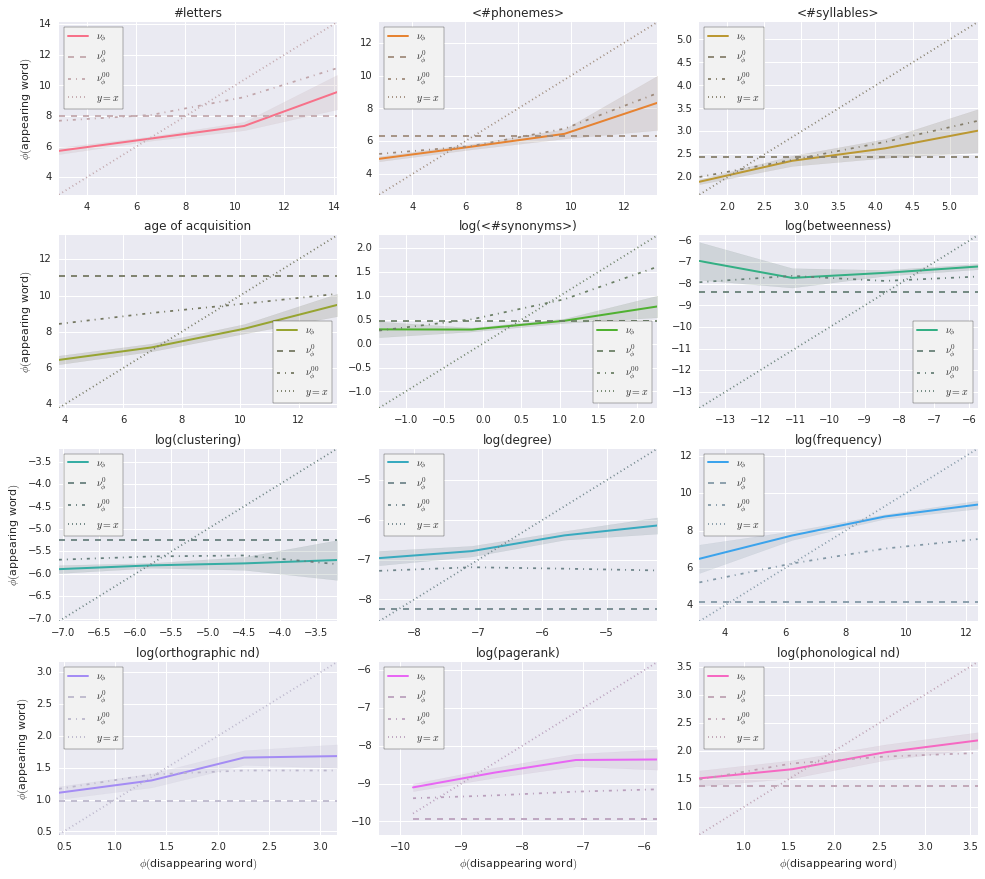

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

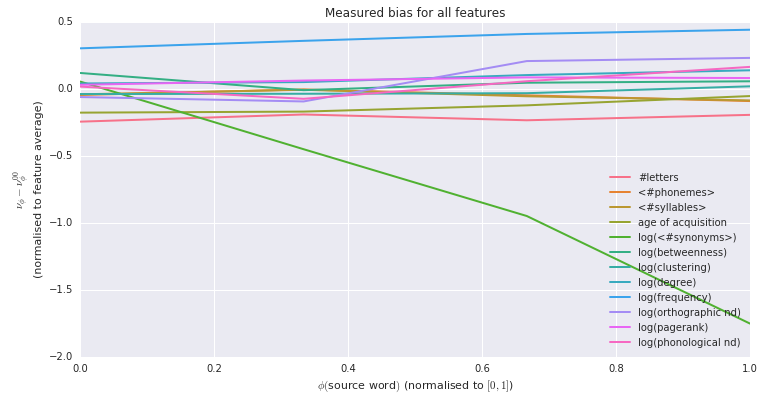

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *   | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |


H_00 | *** | *** | *** | **  |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | ns. | **  |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | ns. | ns. | *** | *   |


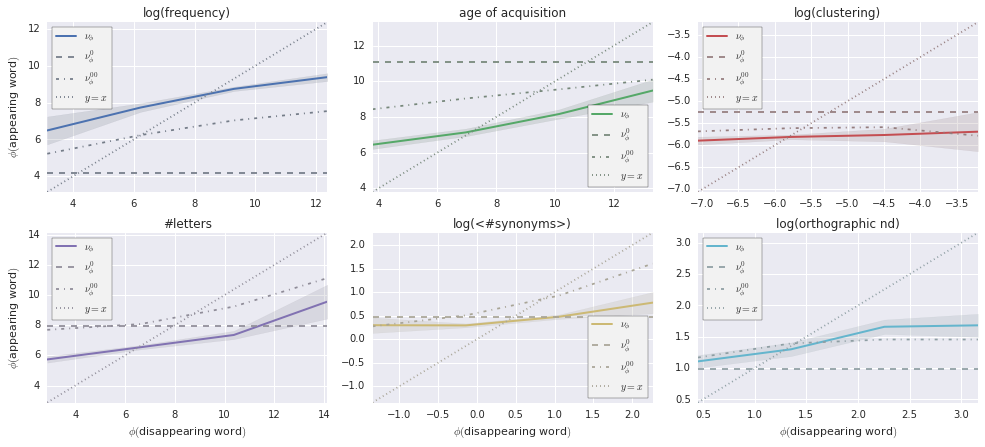

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

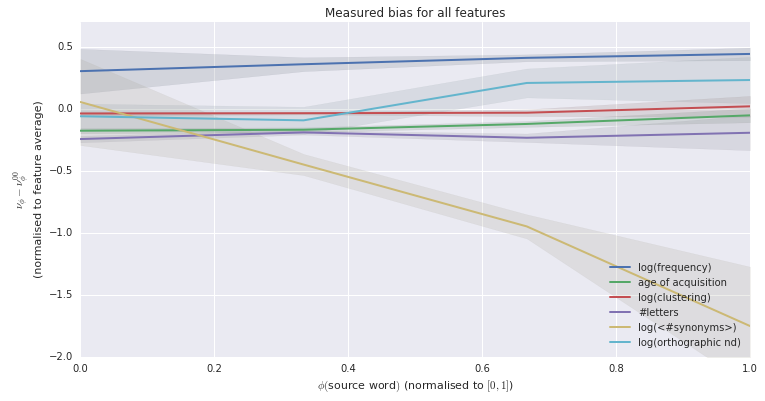

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | ns. | ns. | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |
------------------
H_0  | *** | ns. |
H_00 | *** | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | *   |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | **  | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *   |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | ns. | ns. | ns. | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | ns. | **  |


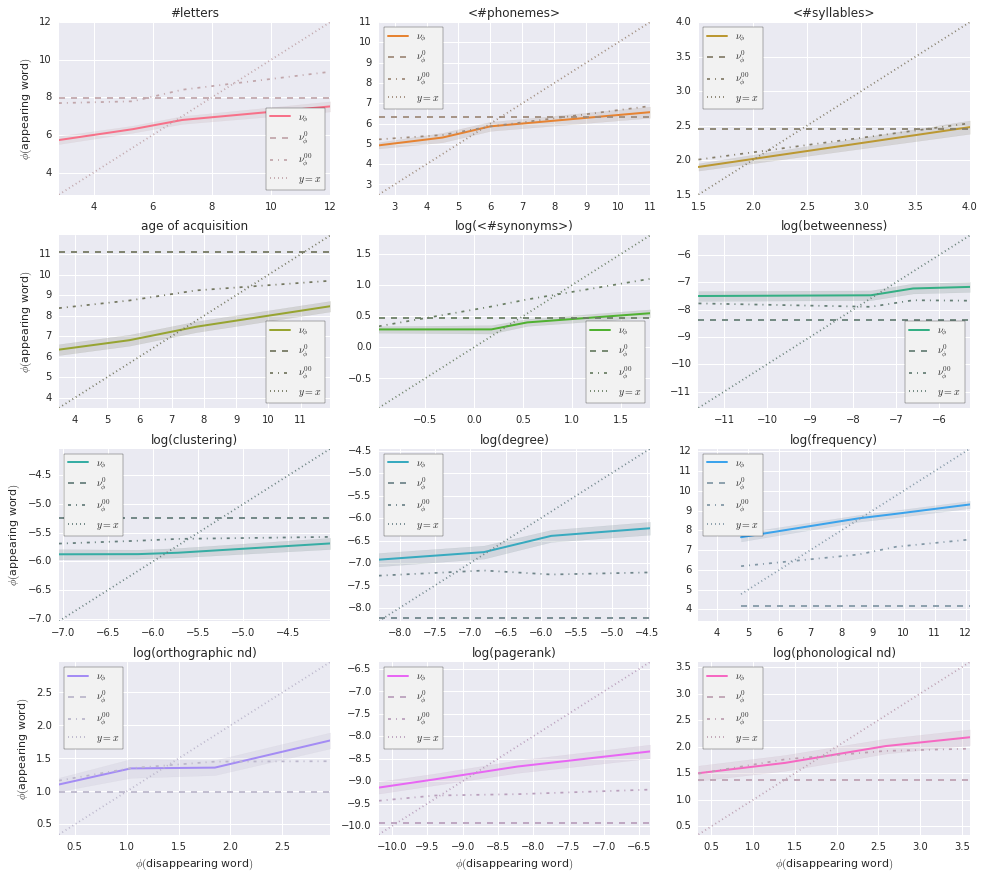

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

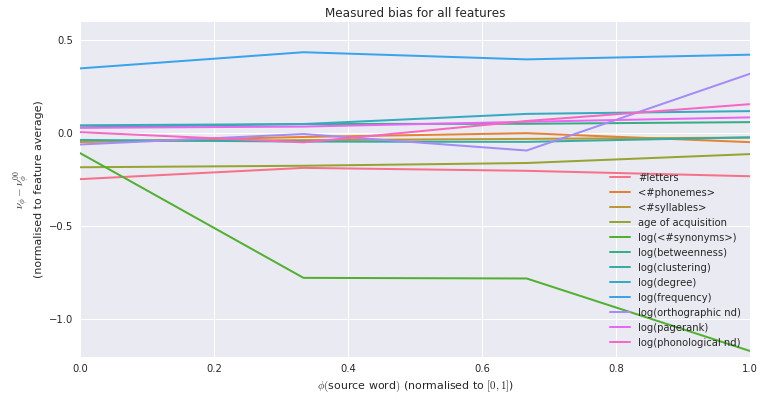

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *   |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | *   |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | ns. | ns. | ns. | *** |


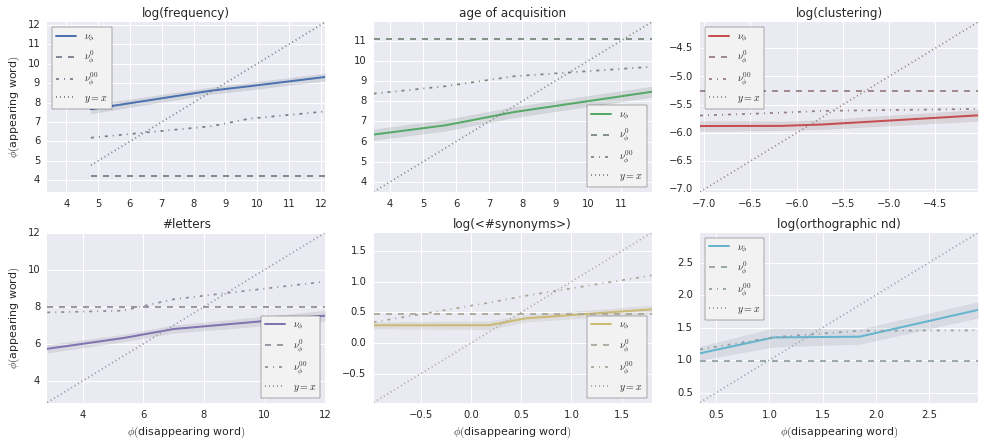

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

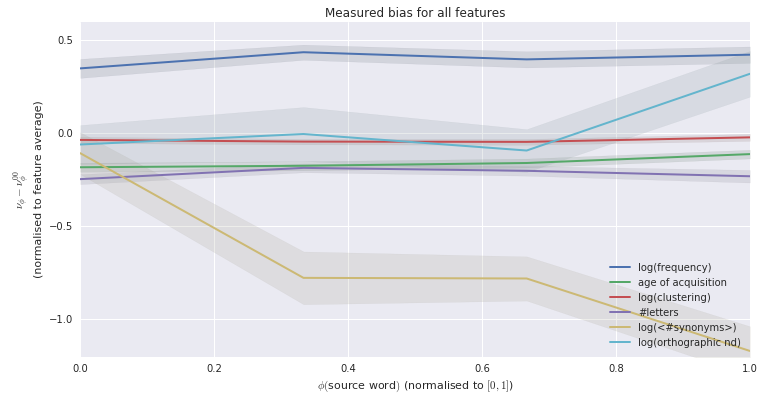

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *   |
H_00 | *   | ns. | *   | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | ns. | *   |
H_00 | ns. | *** | ns. | ns. |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | **  |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *   | ns. |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *   | *** | *** |
H_00 | ns. | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |



---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *   | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | *   | *** | *** |
H_00 | ns. | *   | ns. | ns. |


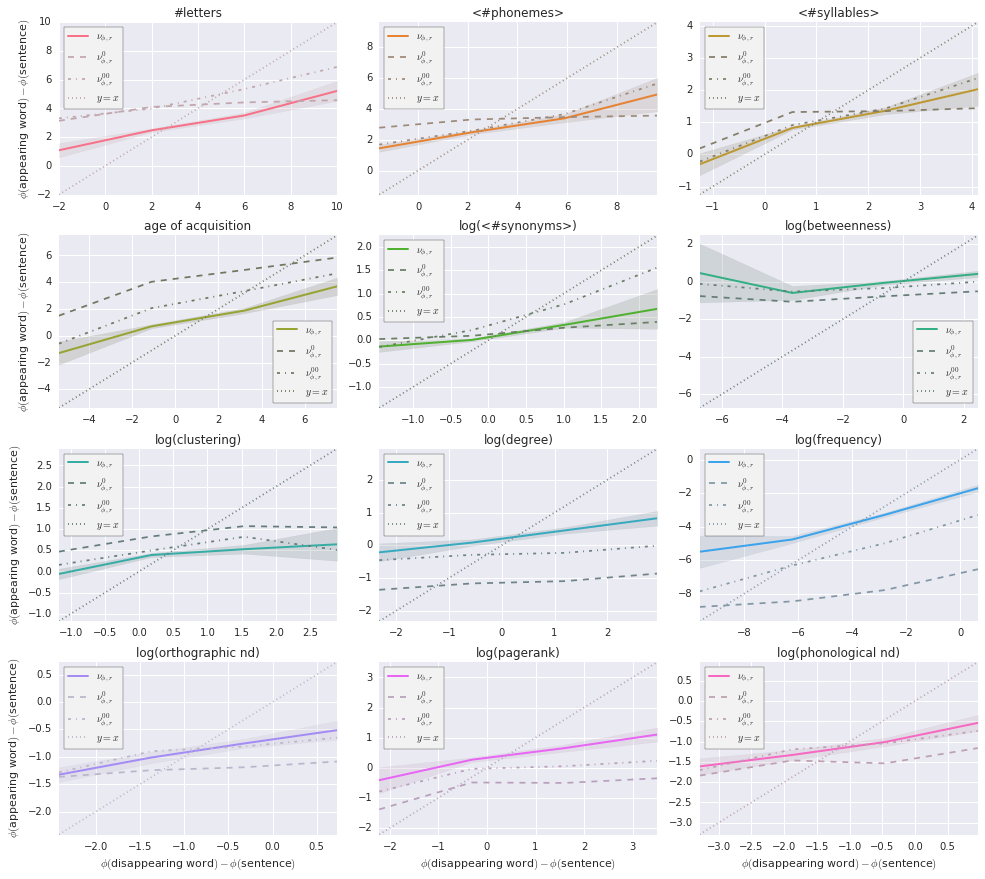

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

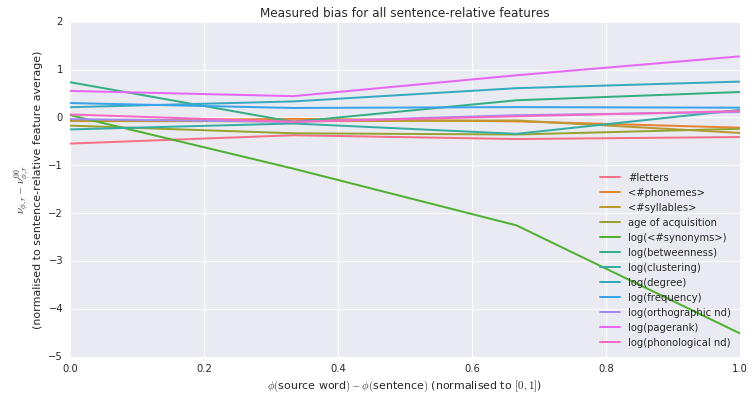

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | **  |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *   | ns. |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *   | ns. | ns. |


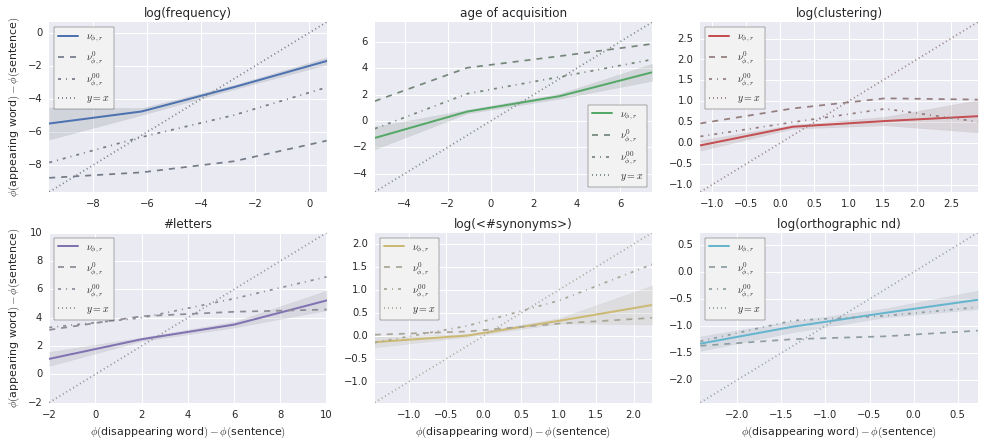

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

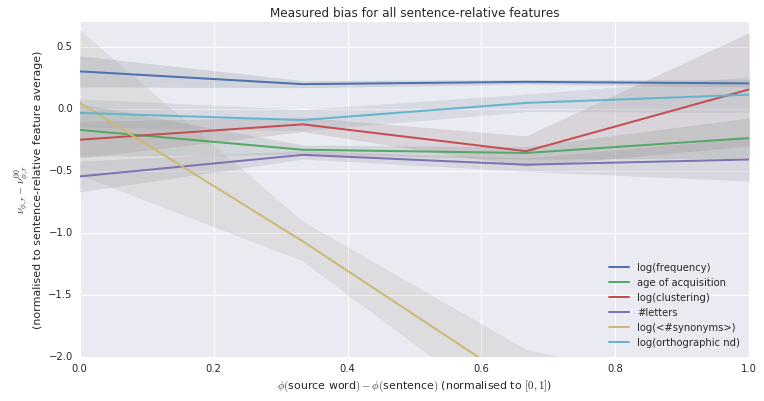

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *   | ns. | ns. | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | **  | *   | ns. | ns. |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *   |
H_00 | *** | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *   | **  | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *   | ns. | *** |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | ns. | **  |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *   | *** | *** |
H_00 | ns. | **  | ns. | ns. |


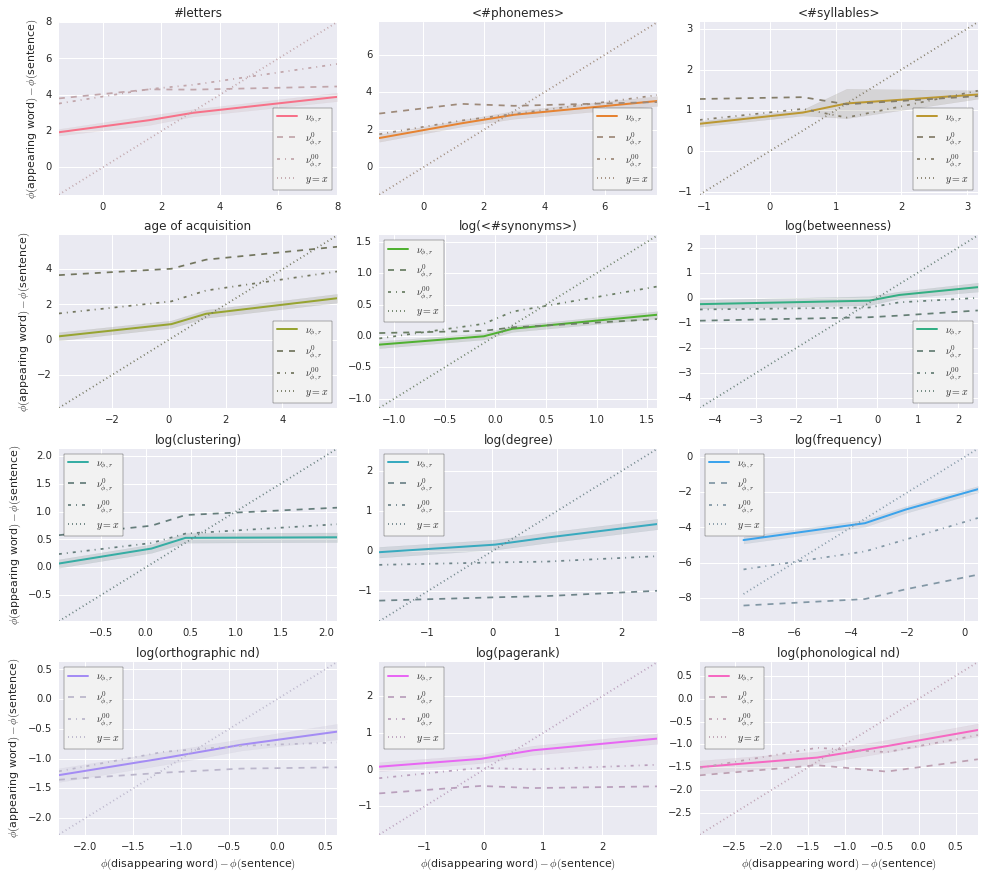

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

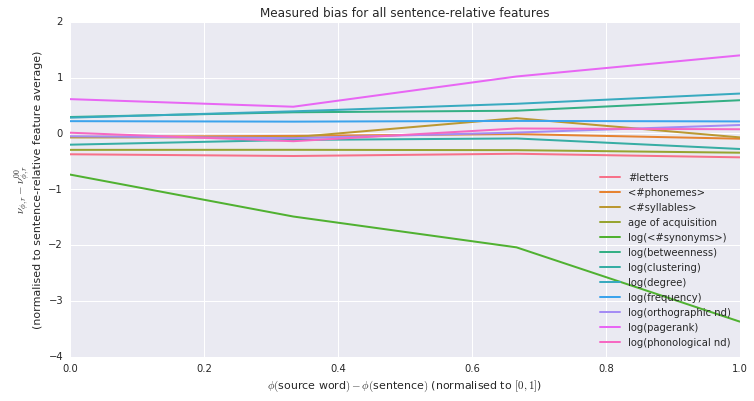

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *   | ns. | *** |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *   |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | ns. | **  |


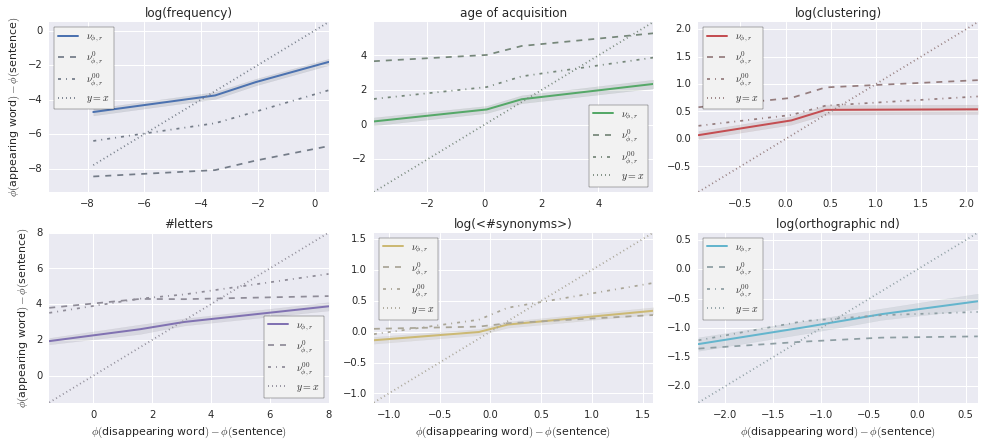

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

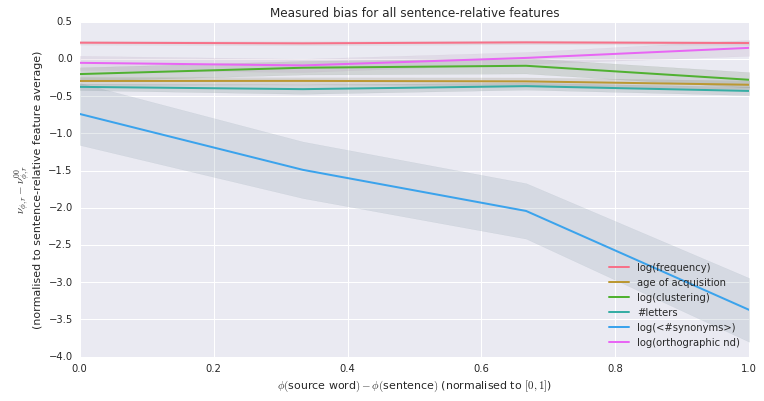

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


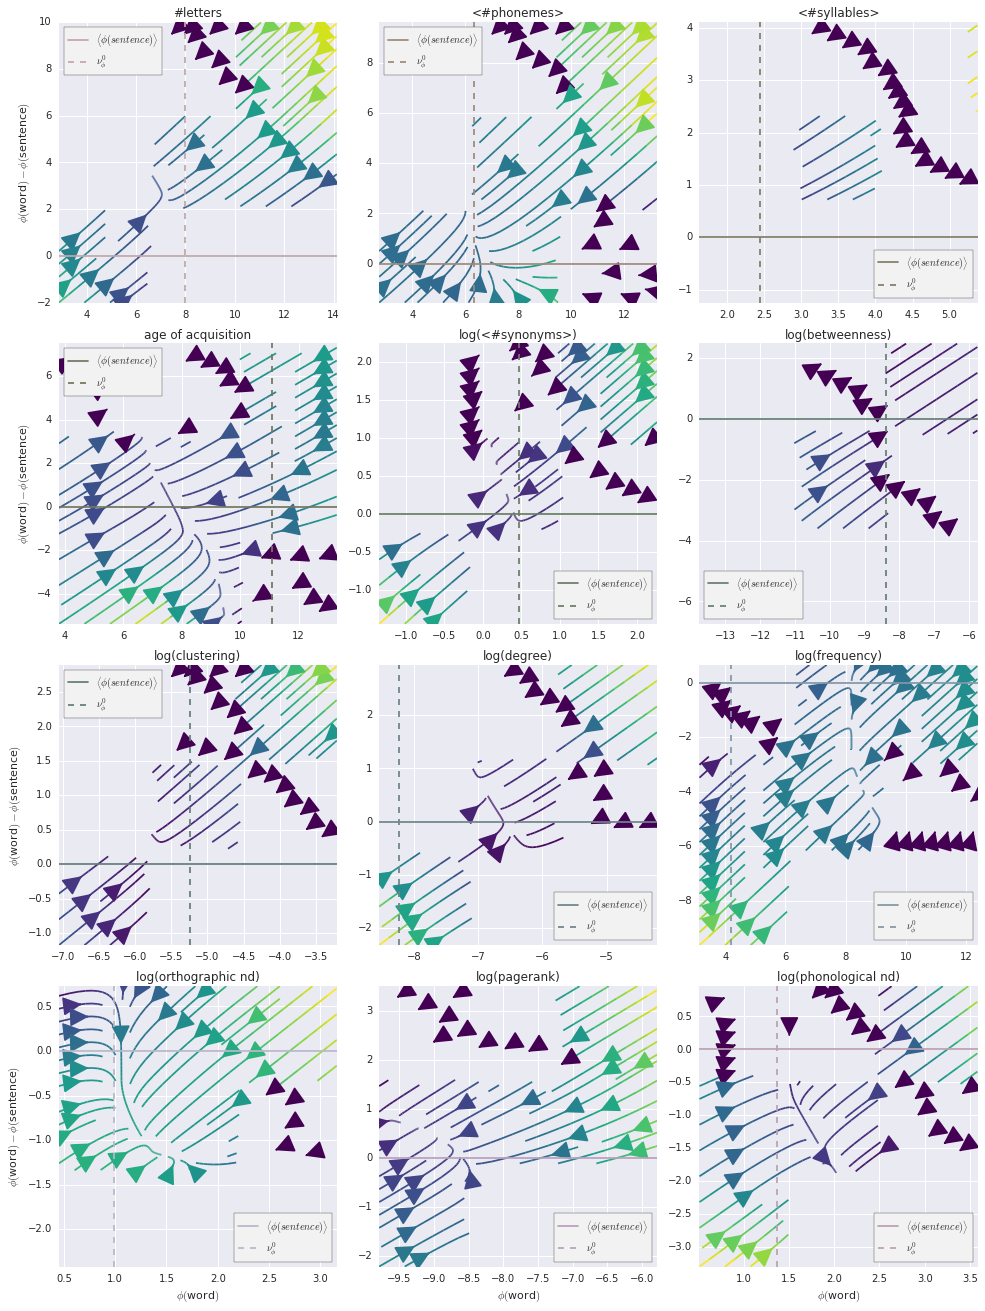

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


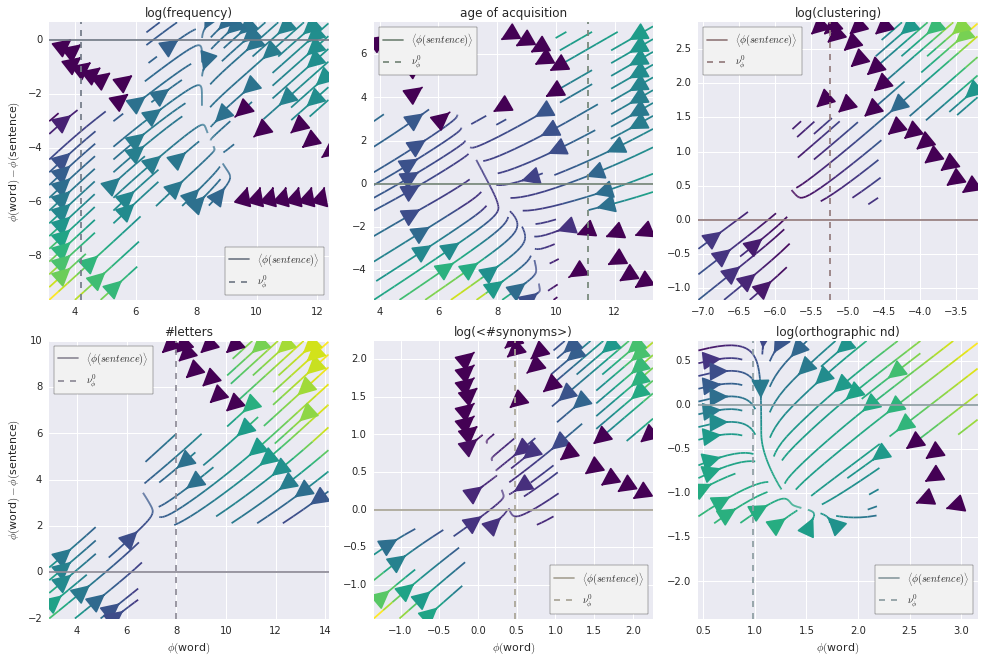

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.53257313  0.17180286  0.08056917  0.07436572  0.03386595  0.03069941
  0.01943202  0.0182722   0.01673949  0.00925842]

We're plotting variation for the first 3 components:


aoa  betweenness  clustering    degree  frequency  \
Component-0 -0.443008     0.280923   -0.086977  0.241333   0.232464   
Component-1 -0.328440     0.393028   -0.136744  0.294034   0.275091   
Component-2  0.804870     0.411886   -0.153446  0.152160   0.318065   

             letters_count  orthographic_density  pagerank  phonemes_count  \
Component-0      -0.447586              0.212397  0.279841       -0.423096   
Component-1       0.431434             -0.166621  0.311465        0.415887   
Component-2      -0.096887              0.003793  0.098051       -0.037667   

             phonological_density  syllables_count  synonyms_count  
Component-0              0.276339        -0.160626        0.006987  
Component-1             -0.211887         0.167456        0.004225  
Component-2              0.105054        -0.004151       -0.056417

Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 24971) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (    8 of 24971) |             | Elapsed Time: 0:00:41 ETA: 1 day, 11:38:33

  0% (   28 of 24971) |                    | Elapsed Time: 0:00:41 ETA: 10:13:45

  0% (   53 of 24971) |                     | Elapsed Time: 0:00:41 ETA: 5:25:33

  0% (   79 of 24971) |                     | Elapsed Time: 0:00:41 ETA: 3:39:18

  0% (  103 of 24971) |                     | Elapsed Time: 0:00:41 ETA: 0:03:50

  0% (  130 of 24971) |                     | Elapsed Time: 0:00:42 ETA: 0:03:32

  0% (  158 of 24971) |                     | Elapsed Time: 0:00:42 ETA: 0:03:17

  0% (  187 of 24971) |                     | Elapsed Time: 0:00:42 ETA: 0:03:10

  0% (  216 of 24971) |                     | Elapsed Time: 0:00:42 ETA: 0:03:08

  0% (  245 of 24971) |                     | Elapsed Time: 0:00:43 ETA: 0:03:00

  1% (  273 of 24971) |                     | Elapsed Time: 0:00:43 ETA: 0:02:58

  1% (  313 of 24971) |                     | Elapsed Time: 0:00:43 ETA: 0:02:56

  1% (  340 of 24971) |                     | Elapsed Time: 0:00:43 ETA: 0:02:58

  1% (  368 of 24971) |                     | Elapsed Time: 0:00:43 ETA: 0:03:00

  1% (  396 of 24971) |                     | Elapsed Time: 0:00:44 ETA: 0:03:01

  1% (  424 of 24971) |                     | Elapsed Time: 0:00:44 ETA: 0:03:03

  1% (  466 of 24971) |                     | Elapsed Time: 0:00:44 ETA: 0:03:02

  1% (  495 of 24971) |                     | Elapsed Time: 0:00:44 ETA: 0:02:59

  2% (  523 of 24971) |                     | Elapsed Time: 0:00:45 ETA: 0:02:58

  2% (  550 of 24971) |                     | Elapsed Time: 0:00:45 ETA: 0:02:58

  2% (  578 of 24971) |                     | Elapsed Time: 0:00:45 ETA: 0:02:58

  2% (  608 of 24971) |                     | Elapsed Time: 0:00:45 ETA: 0:02:56

  2% (  639 of 24971) |                     | Elapsed Time: 0:00:45 ETA: 0:02:55

  2% (  669 of 24971) |                     | Elapsed Time: 0:00:46 ETA: 0:02:52

  2% (  695 of 24971) |                     | Elapsed Time: 0:00:46 ETA: 0:02:55

  2% (  718 of 24971) |                     | Elapsed Time: 0:00:46 ETA: 0:03:05

  2% (  747 of 24971) |                     | Elapsed Time: 0:00:46 ETA: 0:03:07

  3% (  771 of 24971) |                     | Elapsed Time: 0:00:46 ETA: 0:03:14

  3% (  798 of 24971) |                     | Elapsed Time: 0:00:47 ETA: 0:03:19

  3% (  828 of 24971) |                     | Elapsed Time: 0:00:47 ETA: 0:03:06

  3% (  860 of 24971) |                     | Elapsed Time: 0:00:47 ETA: 0:02:57

  3% (  892 of 24971) |                     | Elapsed Time: 0:00:47 ETA: 0:02:47

  3% (  937 of 24971) |                     | Elapsed Time: 0:00:48 ETA: 0:02:41

  3% (  962 of 24971) |                     | Elapsed Time: 0:00:48 ETA: 0:02:45

  3% (  986 of 24971) |                     | Elapsed Time: 0:00:48 ETA: 0:02:53

  4% ( 1010 of 24971) |                     | Elapsed Time: 0:00:48 ETA: 0:03:03

  4% ( 1034 of 24971) |                     | Elapsed Time: 0:00:48 ETA: 0:03:16

  4% ( 1058 of 24971) |                     | Elapsed Time: 0:00:49 ETA: 0:03:24

  4% ( 1082 of 24971) |                     | Elapsed Time: 0:00:49 ETA: 0:03:24

  4% ( 1106 of 24971) |                     | Elapsed Time: 0:00:49 ETA: 0:03:24

  4% ( 1131 of 24971) |                     | Elapsed Time: 0:00:49 ETA: 0:03:22

  4% ( 1157 of 24971) |                     | Elapsed Time: 0:00:49 ETA: 0:03:20

  4% ( 1187 of 24971) |                     | Elapsed Time: 0:00:50 ETA: 0:03:10

  4% ( 1219 of 24971) |#                    | Elapsed Time: 0:00:50 ETA: 0:02:58

  5% ( 1249 of 24971) |#                    | Elapsed Time: 0:00:50 ETA: 0:02:50

  5% ( 1277 of 24971) |#                    | Elapsed Time: 0:00:50 ETA: 0:02:45

  5% ( 1301 of 24971) |#                    | Elapsed Time: 0:00:50 ETA: 0:02:50

  5% ( 1319 of 24971) |#                    | Elapsed Time: 0:00:51 ETA: 0:03:09

  5% ( 1338 of 24971) |#                    | Elapsed Time: 0:00:51 ETA: 0:03:32

  5% ( 1356 of 24971) |#                    | Elapsed Time: 0:00:51 ETA: 0:03:56

  5% ( 1374 of 24971) |#                    | Elapsed Time: 0:00:51 ETA: 0:04:26

  5% ( 1392 of 24971) |#                    | Elapsed Time: 0:00:52 ETA: 0:04:27

  5% ( 1410 of 24971) |#                    | Elapsed Time: 0:00:52 ETA: 0:04:29

  5% ( 1429 of 24971) |#                    | Elapsed Time: 0:00:52 ETA: 0:04:28

  5% ( 1447 of 24971) |#                    | Elapsed Time: 0:00:52 ETA: 0:04:28

  5% ( 1466 of 24971) |#                    | Elapsed Time: 0:00:52 ETA: 0:04:27

  5% ( 1493 of 24971) |#                    | Elapsed Time: 0:00:53 ETA: 0:04:24

  6% ( 1512 of 24971) |#                    | Elapsed Time: 0:00:53 ETA: 0:04:24

  6% ( 1531 of 24971) |#                    | Elapsed Time: 0:00:53 ETA: 0:04:22

  6% ( 1549 of 24971) |#                    | Elapsed Time: 0:00:53 ETA: 0:04:21

  6% ( 1570 of 24971) |#                    | Elapsed Time: 0:00:54 ETA: 0:04:20

  6% ( 1588 of 24971) |#                    | Elapsed Time: 0:00:54 ETA: 0:04:23

  6% ( 1614 of 24971) |#                    | Elapsed Time: 0:00:54 ETA: 0:04:01

  6% ( 1640 of 24971) |#                    | Elapsed Time: 0:00:54 ETA: 0:03:42

  6% ( 1658 of 24971) |#                    | Elapsed Time: 0:00:54 ETA: 0:03:44

  6% ( 1688 of 24971) |#                    | Elapsed Time: 0:00:55 ETA: 0:03:34

  6% ( 1709 of 24971) |#                    | Elapsed Time: 0:00:55 ETA: 0:03:47

  6% ( 1728 of 24971) |#                    | Elapsed Time: 0:00:55 ETA: 0:04:04

  7% ( 1754 of 24971) |#                    | Elapsed Time: 0:00:55 ETA: 0:03:43

  7% ( 1779 of 24971) |#                    | Elapsed Time: 0:00:55 ETA: 0:03:33

  7% ( 1805 of 24971) |#                    | Elapsed Time: 0:00:56 ETA: 0:03:21

  7% ( 1836 of 24971) |#                    | Elapsed Time: 0:00:56 ETA: 0:03:03

  7% ( 1873 of 24971) |#                    | Elapsed Time: 0:00:56 ETA: 0:02:53

  7% ( 1901 of 24971) |#                    | Elapsed Time: 0:00:56 ETA: 0:02:50

  7% ( 1930 of 24971) |#                    | Elapsed Time: 0:00:57 ETA: 0:02:42

  7% ( 1960 of 24971) |#                    | Elapsed Time: 0:00:57 ETA: 0:02:43

  7% ( 1991 of 24971) |#                    | Elapsed Time: 0:00:57 ETA: 0:02:40

  8% ( 2023 of 24971) |#                    | Elapsed Time: 0:00:57 ETA: 0:02:37

  8% ( 2055 of 24971) |#                    | Elapsed Time: 0:00:57 ETA: 0:02:34

  8% ( 2087 of 24971) |#                    | Elapsed Time: 0:00:58 ETA: 0:02:32

  8% ( 2114 of 24971) |#                    | Elapsed Time: 0:00:58 ETA: 0:02:36

  8% ( 2138 of 24971) |#                    | Elapsed Time: 0:00:58 ETA: 0:02:43

  8% ( 2165 of 24971) |#                    | Elapsed Time: 0:00:58 ETA: 0:02:49

  8% ( 2195 of 24971) |#                    | Elapsed Time: 0:00:58 ETA: 0:02:59

  8% ( 2213 of 24971) |#                    | Elapsed Time: 0:00:59 ETA: 0:03:22

  8% ( 2232 of 24971) |#                    | Elapsed Time: 0:00:59 ETA: 0:03:33

  9% ( 2252 of 24971) |#                    | Elapsed Time: 0:00:59 ETA: 0:03:45

  9% ( 2272 of 24971) |#                    | Elapsed Time: 0:00:59 ETA: 0:04:10

  9% ( 2292 of 24971) |#                    | Elapsed Time: 0:01:00 ETA: 0:04:00

  9% ( 2311 of 24971) |#                    | Elapsed Time: 0:01:00 ETA: 0:04:08

  9% ( 2331 of 24971) |#                    | Elapsed Time: 0:01:00 ETA: 0:04:07

  9% ( 2351 of 24971) |#                    | Elapsed Time: 0:01:00 ETA: 0:04:06

  9% ( 2373 of 24971) |#                    | Elapsed Time: 0:01:00 ETA: 0:03:57

  9% ( 2402 of 24971) |##                   | Elapsed Time: 0:01:01 ETA: 0:03:32

  9% ( 2434 of 24971) |##                   | Elapsed Time: 0:01:01 ETA: 0:03:07

  9% ( 2464 of 24971) |##                   | Elapsed Time: 0:01:01 ETA: 0:02:50

 10% ( 2498 of 24971) |##                   | Elapsed Time: 0:01:01 ETA: 0:02:42

 10% ( 2523 of 24971) |##                   | Elapsed Time: 0:01:01 ETA: 0:02:42

 10% ( 2541 of 24971) |##                   | Elapsed Time: 0:01:02 ETA: 0:02:59

 10% ( 2561 of 24971) |##                   | Elapsed Time: 0:01:02 ETA: 0:03:17

 10% ( 2585 of 24971) |##                   | Elapsed Time: 0:01:02 ETA: 0:03:27

 10% ( 2608 of 24971) |##                   | Elapsed Time: 0:01:02 ETA: 0:03:42

 10% ( 2627 of 24971) |##                   | Elapsed Time: 0:01:03 ETA: 0:03:40

 10% ( 2660 of 24971) |##                   | Elapsed Time: 0:01:03 ETA: 0:03:16

 10% ( 2689 of 24971) |##                   | Elapsed Time: 0:01:03 ETA: 0:03:00

 10% ( 2715 of 24971) |##                   | Elapsed Time: 0:01:03 ETA: 0:02:59

 10% ( 2743 of 24971) |##                   | Elapsed Time: 0:01:03 ETA: 0:02:44

 11% ( 2775 of 24971) |##                   | Elapsed Time: 0:01:04 ETA: 0:02:38

 11% ( 2810 of 24971) |##                   | Elapsed Time: 0:01:04 ETA: 0:02:38

 11% ( 2839 of 24971) |##                   | Elapsed Time: 0:01:04 ETA: 0:02:34

 11% ( 2865 of 24971) |##                   | Elapsed Time: 0:01:04 ETA: 0:02:35

 11% ( 2895 of 24971) |##                   | Elapsed Time: 0:01:04 ETA: 0:02:34

 11% ( 2922 of 24971) |##                   | Elapsed Time: 0:01:05 ETA: 0:02:42

 11% ( 2951 of 24971) |##                   | Elapsed Time: 0:01:05 ETA: 0:02:45

 11% ( 2970 of 24971) |##                   | Elapsed Time: 0:01:05 ETA: 0:02:55

 11% ( 2990 of 24971) |##                   | Elapsed Time: 0:01:05 ETA: 0:03:08

 12% ( 3008 of 24971) |##                   | Elapsed Time: 0:01:06 ETA: 0:03:32

 12% ( 3026 of 24971) |##                   | Elapsed Time: 0:01:06 ETA: 0:03:56

 12% ( 3044 of 24971) |##                   | Elapsed Time: 0:01:06 ETA: 0:04:17

 12% ( 3062 of 24971) |##                   | Elapsed Time: 0:01:06 ETA: 0:04:29

 12% ( 3080 of 24971) |##                   | Elapsed Time: 0:01:06 ETA: 0:04:28

 12% ( 3098 of 24971) |##                   | Elapsed Time: 0:01:07 ETA: 0:04:28

 12% ( 3135 of 24971) |##                   | Elapsed Time: 0:01:07 ETA: 0:03:54

 12% ( 3157 of 24971) |##                   | Elapsed Time: 0:01:07 ETA: 0:03:44

 12% ( 3183 of 24971) |##                   | Elapsed Time: 0:01:07 ETA: 0:03:25

 12% ( 3212 of 24971) |##                   | Elapsed Time: 0:01:08 ETA: 0:03:04

 12% ( 3234 of 24971) |##                   | Elapsed Time: 0:01:08 ETA: 0:03:00

 13% ( 3260 of 24971) |##                   | Elapsed Time: 0:01:08 ETA: 0:03:01

 13% ( 3284 of 24971) |##                   | Elapsed Time: 0:01:08 ETA: 0:02:53

 13% ( 3313 of 24971) |##                   | Elapsed Time: 0:01:08 ETA: 0:02:58

 13% ( 3340 of 24971) |##                   | Elapsed Time: 0:01:09 ETA: 0:02:50

 13% ( 3368 of 24971) |##                   | Elapsed Time: 0:01:09 ETA: 0:02:47

 13% ( 3396 of 24971) |##                   | Elapsed Time: 0:01:09 ETA: 0:02:39

 13% ( 3434 of 24971) |##                   | Elapsed Time: 0:01:09 ETA: 0:02:39

 13% ( 3456 of 24971) |##                   | Elapsed Time: 0:01:10 ETA: 0:02:48

 13% ( 3478 of 24971) |##                   | Elapsed Time: 0:01:10 ETA: 0:02:56

 14% ( 3500 of 24971) |##                   | Elapsed Time: 0:01:10 ETA: 0:03:06

 14% ( 3528 of 24971) |##                   | Elapsed Time: 0:01:10 ETA: 0:03:06

 14% ( 3554 of 24971) |##                   | Elapsed Time: 0:01:10 ETA: 0:03:03

 14% ( 3583 of 24971) |###                  | Elapsed Time: 0:01:11 ETA: 0:02:53

 14% ( 3611 of 24971) |###                  | Elapsed Time: 0:01:11 ETA: 0:02:44

 14% ( 3639 of 24971) |###                  | Elapsed Time: 0:01:11 ETA: 0:02:40

 14% ( 3667 of 24971) |###                  | Elapsed Time: 0:01:11 ETA: 0:02:38

 14% ( 3697 of 24971) |###                  | Elapsed Time: 0:01:11 ETA: 0:02:35

 14% ( 3715 of 24971) |###                  | Elapsed Time: 0:01:12 ETA: 0:02:47

 14% ( 3733 of 24971) |###                  | Elapsed Time: 0:01:12 ETA: 0:03:03

 15% ( 3761 of 24971) |###                  | Elapsed Time: 0:01:12 ETA: 0:03:10

 15% ( 3782 of 24971) |###                  | Elapsed Time: 0:01:12 ETA: 0:03:23

 15% ( 3810 of 24971) |###                  | Elapsed Time: 0:01:12 ETA: 0:03:17

 15% ( 3840 of 24971) |###                  | Elapsed Time: 0:01:13 ETA: 0:02:56

 15% ( 3870 of 24971) |###                  | Elapsed Time: 0:01:13 ETA: 0:02:39

 15% ( 3896 of 24971) |###                  | Elapsed Time: 0:01:13 ETA: 0:02:35

 15% ( 3916 of 24971) |###                  | Elapsed Time: 0:01:13 ETA: 0:02:44

 15% ( 3945 of 24971) |###                  | Elapsed Time: 0:01:14 ETA: 0:02:47

 15% ( 3962 of 24971) |###                  | Elapsed Time: 0:01:14 ETA: 0:03:08

 15% ( 3989 of 24971) |###                  | Elapsed Time: 0:01:14 ETA: 0:03:09

 16% ( 4015 of 24971) |###                  | Elapsed Time: 0:01:14 ETA: 0:03:02

 16% ( 4041 of 24971) |###                  | Elapsed Time: 0:01:14 ETA: 0:03:01

 16% ( 4075 of 24971) |###                  | Elapsed Time: 0:01:15 ETA: 0:02:43

 16% ( 4105 of 24971) |###                  | Elapsed Time: 0:01:15 ETA: 0:02:34

 16% ( 4133 of 24971) |###                  | Elapsed Time: 0:01:15 ETA: 0:02:33

 16% ( 4161 of 24971) |###                  | Elapsed Time: 0:01:15 ETA: 0:02:30

 16% ( 4187 of 24971) |###                  | Elapsed Time: 0:01:15 ETA: 0:02:29

 16% ( 4210 of 24971) |###                  | Elapsed Time: 0:01:16 ETA: 0:02:44

 16% ( 4230 of 24971) |###                  | Elapsed Time: 0:01:16 ETA: 0:02:56

 17% ( 4255 of 24971) |###                  | Elapsed Time: 0:01:16 ETA: 0:03:00

 17% ( 4286 of 24971) |###                  | Elapsed Time: 0:01:16 ETA: 0:02:55

 17% ( 4319 of 24971) |###                  | Elapsed Time: 0:01:16 ETA: 0:02:42

 17% ( 4344 of 24971) |###                  | Elapsed Time: 0:01:17 ETA: 0:02:35

 17% ( 4370 of 24971) |###                  | Elapsed Time: 0:01:17 ETA: 0:02:37

 17% ( 4402 of 24971) |###                  | Elapsed Time: 0:01:17 ETA: 0:02:31

 17% ( 4426 of 24971) |###                  | Elapsed Time: 0:01:17 ETA: 0:02:45

 17% ( 4454 of 24971) |###                  | Elapsed Time: 0:01:18 ETA: 0:02:45

 17% ( 4470 of 24971) |###                  | Elapsed Time: 0:01:18 ETA: 0:02:58

 17% ( 4486 of 24971) |###                  | Elapsed Time: 0:01:18 ETA: 0:03:17

 18% ( 4502 of 24971) |###                  | Elapsed Time: 0:01:18 ETA: 0:03:45

 18% ( 4518 of 24971) |###                  | Elapsed Time: 0:01:18 ETA: 0:04:15

 18% ( 4534 of 24971) |###                  | Elapsed Time: 0:01:19 ETA: 0:04:36

 18% ( 4555 of 24971) |###                  | Elapsed Time: 0:01:19 ETA: 0:04:15

 18% ( 4578 of 24971) |###                  | Elapsed Time: 0:01:19 ETA: 0:03:53

 18% ( 4607 of 24971) |###                  | Elapsed Time: 0:01:19 ETA: 0:03:20

 18% ( 4637 of 24971) |###                  | Elapsed Time: 0:01:19 ETA: 0:02:54

 18% ( 4667 of 24971) |###                  | Elapsed Time: 0:01:20 ETA: 0:02:35

 18% ( 4699 of 24971) |###                  | Elapsed Time: 0:01:20 ETA: 0:02:23

 18% ( 4731 of 24971) |###                  | Elapsed Time: 0:01:20 ETA: 0:02:16

 19% ( 4763 of 24971) |####                 | Elapsed Time: 0:01:20 ETA: 0:02:12

 19% ( 4795 of 24971) |####                 | Elapsed Time: 0:01:20 ETA: 0:02:09

 19% ( 4827 of 24971) |####                 | Elapsed Time: 0:01:21 ETA: 0:02:08

 19% ( 4858 of 24971) |####                 | Elapsed Time: 0:01:21 ETA: 0:02:08

 19% ( 4889 of 24971) |####                 | Elapsed Time: 0:01:21 ETA: 0:02:09

 19% ( 4912 of 24971) |####                 | Elapsed Time: 0:01:21 ETA: 0:02:19

 19% ( 4928 of 24971) |####                 | Elapsed Time: 0:01:22 ETA: 0:02:40

 19% ( 4944 of 24971) |####                 | Elapsed Time: 0:01:22 ETA: 0:03:07

 19% ( 4960 of 24971) |####                 | Elapsed Time: 0:01:22 ETA: 0:03:44

 19% ( 4976 of 24971) |####                 | Elapsed Time: 0:01:22 ETA: 0:04:29

 20% ( 4995 of 24971) |####                 | Elapsed Time: 0:01:22 ETA: 0:04:32

 20% ( 5010 of 24971) |####                 | Elapsed Time: 0:01:23 ETA: 0:04:30

 20% ( 5026 of 24971) |####                 | Elapsed Time: 0:01:23 ETA: 0:04:29

 20% ( 5042 of 24971) |####                 | Elapsed Time: 0:01:23 ETA: 0:04:29

 20% ( 5058 of 24971) |####                 | Elapsed Time: 0:01:23 ETA: 0:04:29

 20% ( 5074 of 24971) |####                 | Elapsed Time: 0:01:24 ETA: 0:04:30

 20% ( 5090 of 24971) |####                 | Elapsed Time: 0:01:24 ETA: 0:04:32

 20% ( 5106 of 24971) |####                 | Elapsed Time: 0:01:24 ETA: 0:04:33

 20% ( 5122 of 24971) |####                 | Elapsed Time: 0:01:24 ETA: 0:04:33

 20% ( 5138 of 24971) |####                 | Elapsed Time: 0:01:24 ETA: 0:04:32

 20% ( 5154 of 24971) |####                 | Elapsed Time: 0:01:25 ETA: 0:04:32

 20% ( 5170 of 24971) |####                 | Elapsed Time: 0:01:25 ETA: 0:04:29

 20% ( 5186 of 24971) |####                 | Elapsed Time: 0:01:25 ETA: 0:04:29

 20% ( 5202 of 24971) |####                 | Elapsed Time: 0:01:25 ETA: 0:04:28

 20% ( 5218 of 24971) |####                 | Elapsed Time: 0:01:25 ETA: 0:04:29

 20% ( 5234 of 24971) |####                 | Elapsed Time: 0:01:26 ETA: 0:04:28

 21% ( 5253 of 24971) |####                 | Elapsed Time: 0:01:26 ETA: 0:04:16

 21% ( 5281 of 24971) |####                 | Elapsed Time: 0:01:26 ETA: 0:03:38

 21% ( 5307 of 24971) |####                 | Elapsed Time: 0:01:26 ETA: 0:03:14

 21% ( 5330 of 24971) |####                 | Elapsed Time: 0:01:27 ETA: 0:03:00

 21% ( 5353 of 24971) |####                 | Elapsed Time: 0:01:27 ETA: 0:02:46

 21% ( 5375 of 24971) |####                 | Elapsed Time: 0:01:27 ETA: 0:02:52

 21% ( 5399 of 24971) |####                 | Elapsed Time: 0:01:27 ETA: 0:02:57

 21% ( 5421 of 24971) |####                 | Elapsed Time: 0:01:27 ETA: 0:02:59

 21% ( 5443 of 24971) |####                 | Elapsed Time: 0:01:28 ETA: 0:03:00

 21% ( 5465 of 24971) |####                 | Elapsed Time: 0:01:28 ETA: 0:03:01

 21% ( 5490 of 24971) |####                 | Elapsed Time: 0:01:28 ETA: 0:02:57

 22% ( 5516 of 24971) |####                 | Elapsed Time: 0:01:28 ETA: 0:02:51

 22% ( 5535 of 24971) |####                 | Elapsed Time: 0:01:28 ETA: 0:02:59

 22% ( 5566 of 24971) |####                 | Elapsed Time: 0:01:29 ETA: 0:02:45

 22% ( 5596 of 24971) |####                 | Elapsed Time: 0:01:29 ETA: 0:02:35

 22% ( 5630 of 24971) |####                 | Elapsed Time: 0:01:29 ETA: 0:02:37

 22% ( 5652 of 24971) |####                 | Elapsed Time: 0:01:29 ETA: 0:02:37

 22% ( 5675 of 24971) |####                 | Elapsed Time: 0:01:30 ETA: 0:02:37

 22% ( 5705 of 24971) |####                 | Elapsed Time: 0:01:30 ETA: 0:02:33

 22% ( 5734 of 24971) |####                 | Elapsed Time: 0:01:30 ETA: 0:02:36

 23% ( 5758 of 24971) |####                 | Elapsed Time: 0:01:30 ETA: 0:02:33

 23% ( 5790 of 24971) |####                 | Elapsed Time: 0:01:30 ETA: 0:02:20

 23% ( 5812 of 24971) |####                 | Elapsed Time: 0:01:31 ETA: 0:02:27

 23% ( 5828 of 24971) |####                 | Elapsed Time: 0:01:31 ETA: 0:02:53

 23% ( 5843 of 24971) |####                 | Elapsed Time: 0:01:31 ETA: 0:03:12

 23% ( 5865 of 24971) |####                 | Elapsed Time: 0:01:31 ETA: 0:03:23

 23% ( 5898 of 24971) |####                 | Elapsed Time: 0:01:31 ETA: 0:03:16

 23% ( 5914 of 24971) |####                 | Elapsed Time: 0:01:32 ETA: 0:03:13

 23% ( 5931 of 24971) |####                 | Elapsed Time: 0:01:32 ETA: 0:03:15

 23% ( 5945 of 24971) |####                 | Elapsed Time: 0:01:32 ETA: 0:03:23

 23% ( 5970 of 24971) |#####                | Elapsed Time: 0:01:32 ETA: 0:03:36

 24% ( 6006 of 24971) |#####                | Elapsed Time: 0:01:33 ETA: 0:03:13

 24% ( 6037 of 24971) |#####                | Elapsed Time: 0:01:33 ETA: 0:02:43

 24% ( 6061 of 24971) |#####                | Elapsed Time: 0:01:33 ETA: 0:02:24

 24% ( 6087 of 24971) |#####                | Elapsed Time: 0:01:33 ETA: 0:02:16

 24% ( 6113 of 24971) |#####                | Elapsed Time: 0:01:33 ETA: 0:02:22

 24% ( 6139 of 24971) |#####                | Elapsed Time: 0:01:34 ETA: 0:02:31

 24% ( 6164 of 24971) |#####                | Elapsed Time: 0:01:34 ETA: 0:02:35

 24% ( 6189 of 24971) |#####                | Elapsed Time: 0:01:34 ETA: 0:02:34

 24% ( 6210 of 24971) |#####                | Elapsed Time: 0:01:34 ETA: 0:02:42

 25% ( 6243 of 24971) |#####                | Elapsed Time: 0:01:34 ETA: 0:02:35

 25% ( 6271 of 24971) |#####                | Elapsed Time: 0:01:35 ETA: 0:02:29

 25% ( 6300 of 24971) |#####                | Elapsed Time: 0:01:35 ETA: 0:02:24

 25% ( 6328 of 24971) |#####                | Elapsed Time: 0:01:35 ETA: 0:02:21

 25% ( 6356 of 24971) |#####                | Elapsed Time: 0:01:35 ETA: 0:02:12

 25% ( 6382 of 24971) |#####                | Elapsed Time: 0:01:39 ETA: 0:10:22

 25% ( 6411 of 24971) |#####                | Elapsed Time: 0:01:39 ETA: 0:10:11

 25% ( 6434 of 24971) |#####                | Elapsed Time: 0:01:39 ETA: 0:10:36

 25% ( 6455 of 24971) |#####                | Elapsed Time: 0:01:39 ETA: 0:11:16

 25% ( 6482 of 24971) |#####                | Elapsed Time: 0:01:40 ETA: 0:02:31

 26% ( 6506 of 24971) |#####                | Elapsed Time: 0:01:40 ETA: 0:02:36

 26% ( 6532 of 24971) |#####                | Elapsed Time: 0:01:40 ETA: 0:02:37

 26% ( 6569 of 24971) |#####                | Elapsed Time: 0:01:40 ETA: 0:02:29

 26% ( 6598 of 24971) |#####                | Elapsed Time: 0:01:40 ETA: 0:02:18

 26% ( 6627 of 24971) |#####                | Elapsed Time: 0:01:41 ETA: 0:02:18

 26% ( 6647 of 24971) |#####                | Elapsed Time: 0:01:41 ETA: 0:02:23

 26% ( 6670 of 24971) |#####                | Elapsed Time: 0:01:41 ETA: 0:02:28

 26% ( 6700 of 24971) |#####                | Elapsed Time: 0:01:41 ETA: 0:02:28

 26% ( 6731 of 24971) |#####                | Elapsed Time: 0:01:41 ETA: 0:02:27

 27% ( 6757 of 24971) |#####                | Elapsed Time: 0:01:42 ETA: 0:02:23

 27% ( 6785 of 24971) |#####                | Elapsed Time: 0:01:42 ETA: 0:02:15

 27% ( 6814 of 24971) |#####                | Elapsed Time: 0:01:42 ETA: 0:02:11

 27% ( 6846 of 24971) |#####                | Elapsed Time: 0:01:42 ETA: 0:02:11

 27% ( 6868 of 24971) |#####                | Elapsed Time: 0:01:43 ETA: 0:02:20

 27% ( 6892 of 24971) |#####                | Elapsed Time: 0:01:43 ETA: 0:02:22

 27% ( 6915 of 24971) |#####                | Elapsed Time: 0:01:43 ETA: 0:02:28

 27% ( 6942 of 24971) |#####                | Elapsed Time: 0:01:43 ETA: 0:02:30

 27% ( 6970 of 24971) |#####                | Elapsed Time: 0:01:43 ETA: 0:02:31

 28% ( 6993 of 24971) |#####                | Elapsed Time: 0:01:44 ETA: 0:02:28

 28% ( 7017 of 24971) |#####                | Elapsed Time: 0:01:44 ETA: 0:02:30

 28% ( 7033 of 24971) |#####                | Elapsed Time: 0:01:44 ETA: 0:02:41

 28% ( 7043 of 24971) |#####                | Elapsed Time: 0:01:44 ETA: 0:03:14

 28% ( 7053 of 24971) |#####                | Elapsed Time: 0:01:44 ETA: 0:03:59

 28% ( 7063 of 24971) |#####                | Elapsed Time: 0:01:45 ETA: 0:04:47

 28% ( 7075 of 24971) |#####                | Elapsed Time: 0:01:45 ETA: 0:05:35

 28% ( 7094 of 24971) |#####                | Elapsed Time: 0:01:45 ETA: 0:04:53

 28% ( 7114 of 24971) |#####                | Elapsed Time: 0:01:45 ETA: 0:04:10

 28% ( 7136 of 24971) |######               | Elapsed Time: 0:01:45 ETA: 0:03:32

 28% ( 7158 of 24971) |######               | Elapsed Time: 0:01:46 ETA: 0:03:03

 28% ( 7180 of 24971) |######               | Elapsed Time: 0:01:46 ETA: 0:02:53

 28% ( 7206 of 24971) |######               | Elapsed Time: 0:01:46 ETA: 0:02:39

 28% ( 7232 of 24971) |######               | Elapsed Time: 0:01:46 ETA: 0:02:33

 29% ( 7263 of 24971) |######               | Elapsed Time: 0:01:46 ETA: 0:02:21

 29% ( 7287 of 24971) |######               | Elapsed Time: 0:01:47 ETA: 0:02:19

 29% ( 7315 of 24971) |######               | Elapsed Time: 0:01:47 ETA: 0:02:14

 29% ( 7343 of 24971) |######               | Elapsed Time: 0:01:47 ETA: 0:02:11

 29% ( 7367 of 24971) |######               | Elapsed Time: 0:01:47 ETA: 0:02:19

 29% ( 7381 of 24971) |######               | Elapsed Time: 0:01:48 ETA: 0:02:39

 29% ( 7403 of 24971) |######               | Elapsed Time: 0:01:48 ETA: 0:02:41

 29% ( 7426 of 24971) |######               | Elapsed Time: 0:01:48 ETA: 0:02:50

 29% ( 7450 of 24971) |######               | Elapsed Time: 0:01:48 ETA: 0:02:54

 29% ( 7471 of 24971) |######               | Elapsed Time: 0:01:48 ETA: 0:02:51

 30% ( 7509 of 24971) |######               | Elapsed Time: 0:01:49 ETA: 0:02:22

 30% ( 7540 of 24971) |######               | Elapsed Time: 0:01:49 ETA: 0:02:15

 30% ( 7568 of 24971) |######               | Elapsed Time: 0:01:49 ETA: 0:02:12

 30% ( 7596 of 24971) |######               | Elapsed Time: 0:01:49 ETA: 0:02:05

 30% ( 7623 of 24971) |######               | Elapsed Time: 0:01:49 ETA: 0:02:03

 30% ( 7653 of 24971) |######               | Elapsed Time: 0:01:50 ETA: 0:02:06

 30% ( 7687 of 24971) |######               | Elapsed Time: 0:01:50 ETA: 0:02:02

 30% ( 7717 of 24971) |######               | Elapsed Time: 0:01:50 ETA: 0:02:00

 31% ( 7742 of 24971) |######               | Elapsed Time: 0:01:50 ETA: 0:02:03

 31% ( 7766 of 24971) |######               | Elapsed Time: 0:01:51 ETA: 0:02:05

 31% ( 7791 of 24971) |######               | Elapsed Time: 0:01:51 ETA: 0:02:13

 31% ( 7810 of 24971) |######               | Elapsed Time: 0:01:51 ETA: 0:02:35

 31% ( 7822 of 24971) |######               | Elapsed Time: 0:01:51 ETA: 0:02:57

 31% ( 7837 of 24971) |######               | Elapsed Time: 0:01:51 ETA: 0:03:18

 31% ( 7853 of 24971) |######               | Elapsed Time: 0:01:52 ETA: 0:03:42

 31% ( 7869 of 24971) |######               | Elapsed Time: 0:01:52 ETA: 0:04:15

 31% ( 7889 of 24971) |######               | Elapsed Time: 0:01:52 ETA: 0:03:47

 31% ( 7915 of 24971) |######               | Elapsed Time: 0:01:52 ETA: 0:03:11

 31% ( 7939 of 24971) |######               | Elapsed Time: 0:01:52 ETA: 0:02:53

 31% ( 7963 of 24971) |######               | Elapsed Time: 0:01:53 ETA: 0:02:38

 31% ( 7989 of 24971) |######               | Elapsed Time: 0:01:53 ETA: 0:02:22

 32% ( 8012 of 24971) |######               | Elapsed Time: 0:01:53 ETA: 0:02:25

 32% ( 8036 of 24971) |######               | Elapsed Time: 0:01:53 ETA: 0:02:27

 32% ( 8059 of 24971) |######               | Elapsed Time: 0:01:53 ETA: 0:02:28

 32% ( 8084 of 24971) |######               | Elapsed Time: 0:01:54 ETA: 0:02:28

 32% ( 8116 of 24971) |######               | Elapsed Time: 0:01:54 ETA: 0:02:22

 32% ( 8148 of 24971) |######               | Elapsed Time: 0:01:54 ETA: 0:02:11

 32% ( 8181 of 24971) |######               | Elapsed Time: 0:01:54 ETA: 0:02:01

 32% ( 8211 of 24971) |######               | Elapsed Time: 0:01:55 ETA: 0:01:54

 32% ( 8236 of 24971) |######               | Elapsed Time: 0:01:55 ETA: 0:01:56

 33% ( 8257 of 24971) |######               | Elapsed Time: 0:01:55 ETA: 0:02:03

 33% ( 8285 of 24971) |######               | Elapsed Time: 0:01:55 ETA: 0:02:07

 33% ( 8315 of 24971) |######               | Elapsed Time: 0:01:55 ETA: 0:02:10

 33% ( 8346 of 24971) |#######              | Elapsed Time: 0:01:56 ETA: 0:02:06

 33% ( 8368 of 24971) |#######              | Elapsed Time: 0:01:56 ETA: 0:02:09

 33% ( 8397 of 24971) |#######              | Elapsed Time: 0:01:56 ETA: 0:02:01

 33% ( 8428 of 24971) |#######              | Elapsed Time: 0:01:56 ETA: 0:02:11

 33% ( 8458 of 24971) |#######              | Elapsed Time: 0:01:57 ETA: 0:02:12

 33% ( 8482 of 24971) |#######              | Elapsed Time: 0:01:57 ETA: 0:02:12

 34% ( 8494 of 24971) |#######              | Elapsed Time: 0:01:57 ETA: 0:02:32

 34% ( 8506 of 24971) |#######              | Elapsed Time: 0:01:57 ETA: 0:02:49

 34% ( 8524 of 24971) |#######              | Elapsed Time: 0:01:57 ETA: 0:03:50

 34% ( 8549 of 24971) |#######              | Elapsed Time: 0:01:58 ETA: 0:03:45

 34% ( 8572 of 24971) |#######              | Elapsed Time: 0:01:58 ETA: 0:03:15

 34% ( 8592 of 24971) |#######              | Elapsed Time: 0:01:58 ETA: 0:02:58

 34% ( 8619 of 24971) |#######              | Elapsed Time: 0:01:58 ETA: 0:02:32

 34% ( 8651 of 24971) |#######              | Elapsed Time: 0:01:58 ETA: 0:02:12

 34% ( 8673 of 24971) |#######              | Elapsed Time: 0:01:59 ETA: 0:02:20

 34% ( 8691 of 24971) |#######              | Elapsed Time: 0:01:59 ETA: 0:02:23

 34% ( 8714 of 24971) |#######              | Elapsed Time: 0:01:59 ETA: 0:02:24

 35% ( 8740 of 24971) |#######              | Elapsed Time: 0:01:59 ETA: 0:02:40

 35% ( 8758 of 24971) |#######              | Elapsed Time: 0:02:00 ETA: 0:03:01

 35% ( 8790 of 24971) |#######              | Elapsed Time: 0:02:00 ETA: 0:02:36

 35% ( 8819 of 24971) |#######              | Elapsed Time: 0:02:00 ETA: 0:02:23

 35% ( 8844 of 24971) |#######              | Elapsed Time: 0:02:00 ETA: 0:02:18

 35% ( 8871 of 24971) |#######              | Elapsed Time: 0:02:00 ETA: 0:02:04

 35% ( 8899 of 24971) |#######              | Elapsed Time: 0:02:01 ETA: 0:02:00

 35% ( 8928 of 24971) |#######              | Elapsed Time: 0:02:01 ETA: 0:02:01

 35% ( 8955 of 24971) |#######              | Elapsed Time: 0:02:01 ETA: 0:01:59

 35% ( 8977 of 24971) |#######              | Elapsed Time: 0:02:01 ETA: 0:02:04

 36% ( 9001 of 24971) |#######              | Elapsed Time: 0:02:02 ETA: 0:02:07

 36% ( 9029 of 24971) |#######              | Elapsed Time: 0:02:02 ETA: 0:02:08

 36% ( 9052 of 24971) |#######              | Elapsed Time: 0:02:02 ETA: 0:02:17

 36% ( 9083 of 24971) |#######              | Elapsed Time: 0:02:02 ETA: 0:02:08

 36% ( 9106 of 24971) |#######              | Elapsed Time: 0:02:02 ETA: 0:02:07

 36% ( 9130 of 24971) |#######              | Elapsed Time: 0:02:03 ETA: 0:02:13

 36% ( 9146 of 24971) |#######              | Elapsed Time: 0:02:03 ETA: 0:02:16

 36% ( 9170 of 24971) |#######              | Elapsed Time: 0:02:03 ETA: 0:02:24

 36% ( 9192 of 24971) |#######              | Elapsed Time: 0:02:03 ETA: 0:02:35

 36% ( 9220 of 24971) |#######              | Elapsed Time: 0:02:03 ETA: 0:02:25

 37% ( 9246 of 24971) |#######              | Elapsed Time: 0:02:04 ETA: 0:02:19

 37% ( 9270 of 24971) |#######              | Elapsed Time: 0:02:04 ETA: 0:02:08

 37% ( 9300 of 24971) |#######              | Elapsed Time: 0:02:04 ETA: 0:02:03

 37% ( 9326 of 24971) |#######              | Elapsed Time: 0:02:04 ETA: 0:02:00

 37% ( 9350 of 24971) |#######              | Elapsed Time: 0:02:04 ETA: 0:02:05

 37% ( 9374 of 24971) |#######              | Elapsed Time: 0:02:05 ETA: 0:02:18

 37% ( 9395 of 24971) |#######              | Elapsed Time: 0:02:05 ETA: 0:02:26

 37% ( 9425 of 24971) |#######              | Elapsed Time: 0:02:05 ETA: 0:02:24

 37% ( 9450 of 24971) |#######              | Elapsed Time: 0:02:05 ETA: 0:02:24

 37% ( 9472 of 24971) |#######              | Elapsed Time: 0:02:06 ETA: 0:02:18

 38% ( 9498 of 24971) |#######              | Elapsed Time: 0:02:06 ETA: 0:02:04

 38% ( 9522 of 24971) |########             | Elapsed Time: 0:02:06 ETA: 0:02:08

 38% ( 9547 of 24971) |########             | Elapsed Time: 0:02:06 ETA: 0:02:15

 38% ( 9569 of 24971) |########             | Elapsed Time: 0:02:06 ETA: 0:02:15

 38% ( 9595 of 24971) |########             | Elapsed Time: 0:02:07 ETA: 0:02:11

 38% ( 9617 of 24971) |########             | Elapsed Time: 0:02:07 ETA: 0:02:18

 38% ( 9642 of 24971) |########             | Elapsed Time: 0:02:07 ETA: 0:02:11

 38% ( 9668 of 24971) |########             | Elapsed Time: 0:02:07 ETA: 0:02:13

 38% ( 9683 of 24971) |########             | Elapsed Time: 0:02:07 ETA: 0:02:23

 38% ( 9697 of 24971) |########             | Elapsed Time: 0:02:08 ETA: 0:02:41

 38% ( 9723 of 24971) |########             | Elapsed Time: 0:02:08 ETA: 0:02:38

 39% ( 9749 of 24971) |########             | Elapsed Time: 0:02:08 ETA: 0:02:28

 39% ( 9774 of 24971) |########             | Elapsed Time: 0:02:08 ETA: 0:02:30

 39% ( 9799 of 24971) |########             | Elapsed Time: 0:02:09 ETA: 0:02:09

 39% ( 9829 of 24971) |########             | Elapsed Time: 0:02:09 ETA: 0:01:59

 39% ( 9858 of 24971) |########             | Elapsed Time: 0:02:09 ETA: 0:01:54

 39% ( 9886 of 24971) |########             | Elapsed Time: 0:02:09 ETA: 0:01:52

 39% ( 9914 of 24971) |########             | Elapsed Time: 0:02:09 ETA: 0:01:49

 39% ( 9942 of 24971) |########             | Elapsed Time: 0:02:10 ETA: 0:01:49

 39% ( 9965 of 24971) |########             | Elapsed Time: 0:02:10 ETA: 0:01:56

 40% ( 9989 of 24971) |########             | Elapsed Time: 0:02:10 ETA: 0:02:00

 40% (10018 of 24971) |########             | Elapsed Time: 0:02:10 ETA: 0:01:59

 40% (10045 of 24971) |########             | Elapsed Time: 0:02:10 ETA: 0:02:00

 40% (10071 of 24971) |########             | Elapsed Time: 0:02:11 ETA: 0:02:01

 40% (10096 of 24971) |########             | Elapsed Time: 0:02:11 ETA: 0:01:58

 40% (10116 of 24971) |########             | Elapsed Time: 0:02:11 ETA: 0:02:07

 40% (10138 of 24971) |########             | Elapsed Time: 0:02:11 ETA: 0:02:15

 40% (10171 of 24971) |########             | Elapsed Time: 0:02:11 ETA: 0:02:04

 40% (10200 of 24971) |########             | Elapsed Time: 0:02:12 ETA: 0:02:01

 40% (10228 of 24971) |########             | Elapsed Time: 0:02:12 ETA: 0:01:56

 41% (10253 of 24971) |########             | Elapsed Time: 0:02:12 ETA: 0:01:49

 41% (10283 of 24971) |########             | Elapsed Time: 0:02:12 ETA: 0:01:45

 41% (10315 of 24971) |########             | Elapsed Time: 0:02:13 ETA: 0:01:49

 41% (10345 of 24971) |########             | Elapsed Time: 0:02:13 ETA: 0:01:45

 41% (10375 of 24971) |########             | Elapsed Time: 0:02:13 ETA: 0:01:44

 41% (10396 of 24971) |########             | Elapsed Time: 0:02:13 ETA: 0:01:47

 41% (10417 of 24971) |########             | Elapsed Time: 0:02:13 ETA: 0:01:56

 41% (10445 of 24971) |########             | Elapsed Time: 0:02:14 ETA: 0:01:57

 41% (10471 of 24971) |########             | Elapsed Time: 0:02:14 ETA: 0:02:02

 42% (10492 of 24971) |########             | Elapsed Time: 0:02:14 ETA: 0:02:10

 42% (10516 of 24971) |########             | Elapsed Time: 0:02:14 ETA: 0:02:03

 42% (10535 of 24971) |########             | Elapsed Time: 0:02:14 ETA: 0:02:11

 42% (10571 of 24971) |########             | Elapsed Time: 0:02:15 ETA: 0:01:58

 42% (10600 of 24971) |########             | Elapsed Time: 0:02:15 ETA: 0:01:57

 42% (10627 of 24971) |########             | Elapsed Time: 0:02:15 ETA: 0:01:55

 42% (10650 of 24971) |########             | Elapsed Time: 0:02:15 ETA: 0:01:47

 42% (10672 of 24971) |########             | Elapsed Time: 0:02:15 ETA: 0:01:54

 42% (10696 of 24971) |########             | Elapsed Time: 0:02:16 ETA: 0:02:03

 42% (10725 of 24971) |#########            | Elapsed Time: 0:02:16 ETA: 0:01:59

 43% (10752 of 24971) |#########            | Elapsed Time: 0:02:16 ETA: 0:01:58

 43% (10772 of 24971) |#########            | Elapsed Time: 0:02:16 ETA: 0:01:58

 43% (10796 of 24971) |#########            | Elapsed Time: 0:02:17 ETA: 0:01:58

 43% (10820 of 24971) |#########            | Elapsed Time: 0:02:17 ETA: 0:02:01

 43% (10840 of 24971) |#########            | Elapsed Time: 0:02:17 ETA: 0:02:12

 43% (10860 of 24971) |#########            | Elapsed Time: 0:02:17 ETA: 0:02:14

 43% (10884 of 24971) |#########            | Elapsed Time: 0:02:17 ETA: 0:02:10

 43% (10904 of 24971) |#########            | Elapsed Time: 0:02:18 ETA: 0:02:16

 43% (10925 of 24971) |#########            | Elapsed Time: 0:02:18 ETA: 0:02:28

 43% (10948 of 24971) |#########            | Elapsed Time: 0:02:18 ETA: 0:02:23

 43% (10969 of 24971) |#########            | Elapsed Time: 0:02:18 ETA: 0:02:22

 44% (10990 of 24971) |#########            | Elapsed Time: 0:02:18 ETA: 0:02:29

 44% (11015 of 24971) |#########            | Elapsed Time: 0:02:19 ETA: 0:02:15

 44% (11047 of 24971) |#########            | Elapsed Time: 0:02:19 ETA: 0:01:58

 44% (11079 of 24971) |#########            | Elapsed Time: 0:02:19 ETA: 0:01:48

 44% (11093 of 24971) |#########            | Elapsed Time: 0:02:19 ETA: 0:01:53

 44% (11111 of 24971) |#########            | Elapsed Time: 0:02:19 ETA: 0:01:57

 44% (11133 of 24971) |#########            | Elapsed Time: 0:02:20 ETA: 0:02:06

 44% (11164 of 24971) |#########            | Elapsed Time: 0:02:20 ETA: 0:02:10

 44% (11193 of 24971) |#########            | Elapsed Time: 0:02:20 ETA: 0:01:59

 44% (11220 of 24971) |#########            | Elapsed Time: 0:02:20 ETA: 0:01:49

 45% (11246 of 24971) |#########            | Elapsed Time: 0:02:21 ETA: 0:01:48

 45% (11270 of 24971) |#########            | Elapsed Time: 0:02:21 ETA: 0:01:52

 45% (11295 of 24971) |#########            | Elapsed Time: 0:02:21 ETA: 0:01:56

 45% (11316 of 24971) |#########            | Elapsed Time: 0:02:21 ETA: 0:02:07

 45% (11341 of 24971) |#########            | Elapsed Time: 0:02:21 ETA: 0:02:05

 45% (11364 of 24971) |#########            | Elapsed Time: 0:02:22 ETA: 0:01:58

 45% (11379 of 24971) |#########            | Elapsed Time: 0:02:22 ETA: 0:02:16

 45% (11409 of 24971) |#########            | Elapsed Time: 0:02:22 ETA: 0:02:03

 45% (11438 of 24971) |#########            | Elapsed Time: 0:02:22 ETA: 0:01:53

 45% (11463 of 24971) |#########            | Elapsed Time: 0:02:22 ETA: 0:01:56

 45% (11480 of 24971) |#########            | Elapsed Time: 0:02:23 ETA: 0:01:55

 46% (11514 of 24971) |#########            | Elapsed Time: 0:02:23 ETA: 0:01:45

 46% (11550 of 24971) |#########            | Elapsed Time: 0:02:23 ETA: 0:01:41

 46% (11579 of 24971) |#########            | Elapsed Time: 0:02:23 ETA: 0:01:44

 46% (11611 of 24971) |#########            | Elapsed Time: 0:02:24 ETA: 0:01:32

 46% (11621 of 24971) |#########            | Elapsed Time: 0:02:24 ETA: 0:01:43

 46% (11631 of 24971) |#########            | Elapsed Time: 0:02:24 ETA: 0:02:07

 46% (11650 of 24971) |#########            | Elapsed Time: 0:02:24 ETA: 0:02:25

 46% (11666 of 24971) |#########            | Elapsed Time: 0:02:24 ETA: 0:02:57

 46% (11684 of 24971) |#########            | Elapsed Time: 0:02:25 ETA: 0:03:07

 46% (11706 of 24971) |#########            | Elapsed Time: 0:02:25 ETA: 0:02:39

 46% (11733 of 24971) |#########            | Elapsed Time: 0:02:25 ETA: 0:02:17

 47% (11763 of 24971) |#########            | Elapsed Time: 0:02:25 ETA: 0:02:00

 47% (11785 of 24971) |#########            | Elapsed Time: 0:02:25 ETA: 0:01:59

 47% (11809 of 24971) |#########            | Elapsed Time: 0:02:26 ETA: 0:01:48

 47% (11837 of 24971) |#########            | Elapsed Time: 0:02:26 ETA: 0:01:44

 47% (11871 of 24971) |#########            | Elapsed Time: 0:02:26 ETA: 0:01:47

 47% (11894 of 24971) |##########           | Elapsed Time: 0:02:26 ETA: 0:01:54

 47% (11925 of 24971) |##########           | Elapsed Time: 0:02:27 ETA: 0:01:39

 47% (11943 of 24971) |##########           | Elapsed Time: 0:02:27 ETA: 0:01:50

 47% (11961 of 24971) |##########           | Elapsed Time: 0:02:27 ETA: 0:02:01

 47% (11985 of 24971) |##########           | Elapsed Time: 0:02:27 ETA: 0:01:58

 48% (12011 of 24971) |##########           | Elapsed Time: 0:02:27 ETA: 0:02:03

 48% (12037 of 24971) |##########           | Elapsed Time: 0:02:28 ETA: 0:02:03

 48% (12062 of 24971) |##########           | Elapsed Time: 0:02:28 ETA: 0:01:47

 48% (12088 of 24971) |##########           | Elapsed Time: 0:02:28 ETA: 0:01:43

 48% (12116 of 24971) |##########           | Elapsed Time: 0:02:28 ETA: 0:01:41

 48% (12145 of 24971) |##########           | Elapsed Time: 0:02:28 ETA: 0:01:39

 48% (12174 of 24971) |##########           | Elapsed Time: 0:02:29 ETA: 0:01:37

 48% (12208 of 24971) |##########           | Elapsed Time: 0:02:29 ETA: 0:01:28

 49% (12238 of 24971) |##########           | Elapsed Time: 0:02:29 ETA: 0:01:26

 49% (12263 of 24971) |##########           | Elapsed Time: 0:02:29 ETA: 0:01:29

 49% (12291 of 24971) |##########           | Elapsed Time: 0:02:29 ETA: 0:01:29

 49% (12314 of 24971) |##########           | Elapsed Time: 0:02:30 ETA: 0:01:37

 49% (12335 of 24971) |##########           | Elapsed Time: 0:02:30 ETA: 0:01:47

 49% (12359 of 24971) |##########           | Elapsed Time: 0:02:30 ETA: 0:01:50

 49% (12372 of 24971) |##########           | Elapsed Time: 0:02:30 ETA: 0:02:04

 49% (12400 of 24971) |##########           | Elapsed Time: 0:02:31 ETA: 0:02:06

 49% (12424 of 24971) |##########           | Elapsed Time: 0:02:31 ETA: 0:02:02

 49% (12447 of 24971) |##########           | Elapsed Time: 0:02:31 ETA: 0:02:00

 50% (12486 of 24971) |##########           | Elapsed Time: 0:02:31 ETA: 0:01:51

 50% (12516 of 24971) |##########           | Elapsed Time: 0:02:31 ETA: 0:01:37

 50% (12541 of 24971) |##########           | Elapsed Time: 0:02:32 ETA: 0:01:42

 50% (12568 of 24971) |##########           | Elapsed Time: 0:02:32 ETA: 0:01:33

 50% (12602 of 24971) |##########           | Elapsed Time: 0:02:32 ETA: 0:01:27

 50% (12629 of 24971) |##########           | Elapsed Time: 0:02:32 ETA: 0:01:29

 50% (12656 of 24971) |##########           | Elapsed Time: 0:02:33 ETA: 0:01:28

 50% (12689 of 24971) |##########           | Elapsed Time: 0:02:33 ETA: 0:01:23

 50% (12721 of 24971) |##########           | Elapsed Time: 0:02:33 ETA: 0:01:24

 51% (12754 of 24971) |##########           | Elapsed Time: 0:02:33 ETA: 0:01:20

 51% (12782 of 24971) |##########           | Elapsed Time: 0:02:33 ETA: 0:01:22

 51% (12815 of 24971) |##########           | Elapsed Time: 0:02:34 ETA: 0:01:21

 51% (12840 of 24971) |##########           | Elapsed Time: 0:02:34 ETA: 0:01:25

 51% (12862 of 24971) |##########           | Elapsed Time: 0:02:34 ETA: 0:01:32

 51% (12886 of 24971) |##########           | Elapsed Time: 0:02:34 ETA: 0:01:37

 51% (12913 of 24971) |##########           | Elapsed Time: 0:02:34 ETA: 0:01:37

 51% (12929 of 24971) |##########           | Elapsed Time: 0:02:35 ETA: 0:01:53

 51% (12942 of 24971) |##########           | Elapsed Time: 0:02:35 ETA: 0:02:07

 51% (12966 of 24971) |##########           | Elapsed Time: 0:02:35 ETA: 0:02:04

 51% (12983 of 24971) |##########           | Elapsed Time: 0:02:35 ETA: 0:02:18

 52% (13007 of 24971) |##########           | Elapsed Time: 0:02:35 ETA: 0:02:17

 52% (13033 of 24971) |##########           | Elapsed Time: 0:02:36 ETA: 0:01:53

 52% (13061 of 24971) |##########           | Elapsed Time: 0:02:36 ETA: 0:01:48

 52% (13093 of 24971) |###########          | Elapsed Time: 0:02:36 ETA: 0:01:33

 52% (13110 of 24971) |###########          | Elapsed Time: 0:02:36 ETA: 0:01:36

 52% (13126 of 24971) |###########          | Elapsed Time: 0:02:37 ETA: 0:01:42

 52% (13163 of 24971) |###########          | Elapsed Time: 0:02:37 ETA: 0:01:47

 52% (13189 of 24971) |###########          | Elapsed Time: 0:02:37 ETA: 0:01:53

 52% (13219 of 24971) |###########          | Elapsed Time: 0:02:37 ETA: 0:01:39

 53% (13241 of 24971) |###########          | Elapsed Time: 0:02:37 ETA: 0:01:35

 53% (13267 of 24971) |###########          | Elapsed Time: 0:02:38 ETA: 0:01:35

 53% (13293 of 24971) |###########          | Elapsed Time: 0:02:38 ETA: 0:01:31

 53% (13318 of 24971) |###########          | Elapsed Time: 0:02:38 ETA: 0:01:35

 53% (13344 of 24971) |###########          | Elapsed Time: 0:02:38 ETA: 0:01:35

 53% (13375 of 24971) |###########          | Elapsed Time: 0:02:38 ETA: 0:01:28

 53% (13407 of 24971) |###########          | Elapsed Time: 0:02:39 ETA: 0:01:25

 53% (13437 of 24971) |###########          | Elapsed Time: 0:02:39 ETA: 0:01:20

 53% (13463 of 24971) |###########          | Elapsed Time: 0:02:39 ETA: 0:01:21

 54% (13493 of 24971) |###########          | Elapsed Time: 0:02:39 ETA: 0:01:19

 54% (13523 of 24971) |###########          | Elapsed Time: 0:02:40 ETA: 0:01:21

 54% (13549 of 24971) |###########          | Elapsed Time: 0:02:40 ETA: 0:01:24

 54% (13569 of 24971) |###########          | Elapsed Time: 0:02:40 ETA: 0:01:30

 54% (13589 of 24971) |###########          | Elapsed Time: 0:02:40 ETA: 0:01:36

 54% (13613 of 24971) |###########          | Elapsed Time: 0:02:40 ETA: 0:01:43

 54% (13648 of 24971) |###########          | Elapsed Time: 0:02:41 ETA: 0:01:36

 54% (13678 of 24971) |###########          | Elapsed Time: 0:02:41 ETA: 0:01:29

 54% (13706 of 24971) |###########          | Elapsed Time: 0:02:41 ETA: 0:01:23

 55% (13735 of 24971) |###########          | Elapsed Time: 0:02:41 ETA: 0:01:19

 55% (13767 of 24971) |###########          | Elapsed Time: 0:02:41 ETA: 0:01:20

 55% (13778 of 24971) |###########          | Elapsed Time: 0:02:42 ETA: 0:01:37

 55% (13788 of 24971) |###########          | Elapsed Time: 0:02:42 ETA: 0:01:55

 55% (13798 of 24971) |###########          | Elapsed Time: 0:02:42 ETA: 0:02:23

 55% (13808 of 24971) |###########          | Elapsed Time: 0:02:42 ETA: 0:03:06

 55% (13828 of 24971) |###########          | Elapsed Time: 0:02:43 ETA: 0:03:14

 55% (13858 of 24971) |###########          | Elapsed Time: 0:02:43 ETA: 0:02:21

 55% (13881 of 24971) |###########          | Elapsed Time: 0:02:43 ETA: 0:01:59

 55% (13901 of 24971) |###########          | Elapsed Time: 0:02:43 ETA: 0:01:45

 55% (13927 of 24971) |###########          | Elapsed Time: 0:02:43 ETA: 0:01:31

 55% (13950 of 24971) |###########          | Elapsed Time: 0:02:44 ETA: 0:01:36

 55% (13968 of 24971) |###########          | Elapsed Time: 0:02:44 ETA: 0:01:44

 56% (13994 of 24971) |###########          | Elapsed Time: 0:02:44 ETA: 0:01:38

 56% (14026 of 24971) |###########          | Elapsed Time: 0:02:44 ETA: 0:01:31

 56% (14062 of 24971) |###########          | Elapsed Time: 0:02:44 ETA: 0:01:28

 56% (14090 of 24971) |###########          | Elapsed Time: 0:02:45 ETA: 0:01:22

 56% (14114 of 24971) |###########          | Elapsed Time: 0:02:45 ETA: 0:01:20

 56% (14134 of 24971) |###########          | Elapsed Time: 0:02:45 ETA: 0:01:28

 56% (14158 of 24971) |###########          | Elapsed Time: 0:02:45 ETA: 0:01:32

 56% (14180 of 24971) |###########          | Elapsed Time: 0:02:46 ETA: 0:01:41

 56% (14202 of 24971) |###########          | Elapsed Time: 0:02:46 ETA: 0:01:46

 56% (14225 of 24971) |###########          | Elapsed Time: 0:02:46 ETA: 0:01:41

 57% (14258 of 24971) |###########          | Elapsed Time: 0:02:46 ETA: 0:01:32

 57% (14276 of 24971) |############         | Elapsed Time: 0:02:46 ETA: 0:01:34

 57% (14293 of 24971) |############         | Elapsed Time: 0:02:47 ETA: 0:01:39

 57% (14316 of 24971) |############         | Elapsed Time: 0:02:47 ETA: 0:01:37

 57% (14329 of 24971) |############         | Elapsed Time: 0:02:47 ETA: 0:01:54

 57% (14359 of 24971) |############         | Elapsed Time: 0:02:47 ETA: 0:01:58

 57% (14393 of 24971) |############         | Elapsed Time: 0:02:47 ETA: 0:01:37

 57% (14425 of 24971) |############         | Elapsed Time: 0:02:48 ETA: 0:01:29

 57% (14455 of 24971) |############         | Elapsed Time: 0:02:48 ETA: 0:01:19

 57% (14482 of 24971) |############         | Elapsed Time: 0:02:48 ETA: 0:01:14

 58% (14511 of 24971) |############         | Elapsed Time: 0:02:48 ETA: 0:01:11

 58% (14538 of 24971) |############         | Elapsed Time: 0:02:49 ETA: 0:01:14

 58% (14565 of 24971) |############         | Elapsed Time: 0:02:49 ETA: 0:01:16

 58% (14592 of 24971) |############         | Elapsed Time: 0:02:49 ETA: 0:01:19

 58% (14618 of 24971) |############         | Elapsed Time: 0:02:49 ETA: 0:01:20

 58% (14640 of 24971) |############         | Elapsed Time: 0:02:49 ETA: 0:01:23

 58% (14671 of 24971) |############         | Elapsed Time: 0:02:50 ETA: 0:01:28

 58% (14692 of 24971) |############         | Elapsed Time: 0:02:50 ETA: 0:01:34

 58% (14723 of 24971) |############         | Elapsed Time: 0:02:50 ETA: 0:01:28

 59% (14743 of 24971) |############         | Elapsed Time: 0:02:50 ETA: 0:01:30

 59% (14761 of 24971) |############         | Elapsed Time: 0:02:50 ETA: 0:01:33

 59% (14783 of 24971) |############         | Elapsed Time: 0:02:51 ETA: 0:01:33

 59% (14810 of 24971) |############         | Elapsed Time: 0:02:51 ETA: 0:01:32

 59% (14834 of 24971) |############         | Elapsed Time: 0:02:51 ETA: 0:01:34

 59% (14865 of 24971) |############         | Elapsed Time: 0:02:51 ETA: 0:01:23

 59% (14897 of 24971) |############         | Elapsed Time: 0:02:52 ETA: 0:01:14

 59% (14919 of 24971) |############         | Elapsed Time: 0:02:52 ETA: 0:01:16

 59% (14930 of 24971) |############         | Elapsed Time: 0:02:52 ETA: 0:01:29

 59% (14954 of 24971) |############         | Elapsed Time: 0:02:52 ETA: 0:01:31

 60% (14983 of 24971) |############         | Elapsed Time: 0:02:52 ETA: 0:01:34

 60% (14999 of 24971) |############         | Elapsed Time: 0:02:53 ETA: 0:01:44

 60% (15010 of 24971) |############         | Elapsed Time: 0:02:53 ETA: 0:01:50

 60% (15021 of 24971) |############         | Elapsed Time: 0:02:53 ETA: 0:01:59

 60% (15040 of 24971) |############         | Elapsed Time: 0:02:53 ETA: 0:02:12

 60% (15064 of 24971) |############         | Elapsed Time: 0:02:53 ETA: 0:02:15

 60% (15095 of 24971) |############         | Elapsed Time: 0:02:54 ETA: 0:01:44

 60% (15126 of 24971) |############         | Elapsed Time: 0:02:54 ETA: 0:01:23

 60% (15155 of 24971) |############         | Elapsed Time: 0:02:54 ETA: 0:01:12

 60% (15178 of 24971) |############         | Elapsed Time: 0:02:54 ETA: 0:01:12

 60% (15204 of 24971) |############         | Elapsed Time: 0:02:54 ETA: 0:01:12

 61% (15233 of 24971) |############         | Elapsed Time: 0:02:55 ETA: 0:01:14

 61% (15258 of 24971) |############         | Elapsed Time: 0:02:55 ETA: 0:01:17

 61% (15295 of 24971) |############         | Elapsed Time: 0:02:55 ETA: 0:01:17

 61% (15324 of 24971) |############         | Elapsed Time: 0:02:55 ETA: 0:01:15

 61% (15353 of 24971) |############         | Elapsed Time: 0:02:56 ETA: 0:01:13

 61% (15381 of 24971) |############         | Elapsed Time: 0:02:56 ETA: 0:01:13

 61% (15412 of 24971) |############         | Elapsed Time: 0:02:56 ETA: 0:01:09

 61% (15438 of 24971) |############         | Elapsed Time: 0:02:56 ETA: 0:01:09

 61% (15464 of 24971) |#############        | Elapsed Time: 0:02:56 ETA: 0:01:10

 62% (15484 of 24971) |#############        | Elapsed Time: 0:02:57 ETA: 0:01:16

 62% (15504 of 24971) |#############        | Elapsed Time: 0:02:57 ETA: 0:01:22

 62% (15532 of 24971) |#############        | Elapsed Time: 0:02:57 ETA: 0:01:23

 62% (15562 of 24971) |#############        | Elapsed Time: 0:02:57 ETA: 0:01:20

 62% (15591 of 24971) |#############        | Elapsed Time: 0:02:57 ETA: 0:01:14

 62% (15618 of 24971) |#############        | Elapsed Time: 0:02:58 ETA: 0:01:12

 62% (15644 of 24971) |#############        | Elapsed Time: 0:02:58 ETA: 0:01:10

 62% (15664 of 24971) |#############        | Elapsed Time: 0:02:58 ETA: 0:01:14

 62% (15684 of 24971) |#############        | Elapsed Time: 0:02:58 ETA: 0:01:23

 62% (15712 of 24971) |#############        | Elapsed Time: 0:02:59 ETA: 0:01:20

 63% (15740 of 24971) |#############        | Elapsed Time: 0:02:59 ETA: 0:01:16

 63% (15759 of 24971) |#############        | Elapsed Time: 0:02:59 ETA: 0:01:22

 63% (15784 of 24971) |#############        | Elapsed Time: 0:02:59 ETA: 0:01:18

 63% (15805 of 24971) |#############        | Elapsed Time: 0:02:59 ETA: 0:01:20

 63% (15827 of 24971) |#############        | Elapsed Time: 0:03:00 ETA: 0:01:25

 63% (15846 of 24971) |#############        | Elapsed Time: 0:03:00 ETA: 0:01:30

 63% (15877 of 24971) |#############        | Elapsed Time: 0:03:00 ETA: 0:01:21

 63% (15901 of 24971) |#############        | Elapsed Time: 0:03:00 ETA: 0:01:21

 63% (15934 of 24971) |#############        | Elapsed Time: 0:03:00 ETA: 0:01:16

 63% (15964 of 24971) |#############        | Elapsed Time: 0:03:01 ETA: 0:01:10

 64% (15998 of 24971) |#############        | Elapsed Time: 0:03:01 ETA: 0:01:04

 64% (16031 of 24971) |#############        | Elapsed Time: 0:03:01 ETA: 0:01:01

 64% (16058 of 24971) |#############        | Elapsed Time: 0:03:01 ETA: 0:01:00

 64% (16084 of 24971) |#############        | Elapsed Time: 0:03:01 ETA: 0:01:00

 64% (16107 of 24971) |#############        | Elapsed Time: 0:03:02 ETA: 0:01:05

 64% (16138 of 24971) |#############        | Elapsed Time: 0:03:02 ETA: 0:01:07

 64% (16161 of 24971) |#############        | Elapsed Time: 0:03:02 ETA: 0:01:10

 64% (16184 of 24971) |#############        | Elapsed Time: 0:03:02 ETA: 0:01:15

 64% (16207 of 24971) |#############        | Elapsed Time: 0:03:03 ETA: 0:01:13

 65% (16232 of 24971) |#############        | Elapsed Time: 0:03:03 ETA: 0:01:20

 65% (16254 of 24971) |#############        | Elapsed Time: 0:03:03 ETA: 0:01:22

 65% (16278 of 24971) |#############        | Elapsed Time: 0:03:03 ETA: 0:01:23

 65% (16302 of 24971) |#############        | Elapsed Time: 0:03:03 ETA: 0:01:20

 65% (16327 of 24971) |#############        | Elapsed Time: 0:03:04 ETA: 0:01:18

 65% (16358 of 24971) |#############        | Elapsed Time: 0:03:04 ETA: 0:01:09

 65% (16378 of 24971) |#############        | Elapsed Time: 0:03:04 ETA: 0:01:14

 65% (16389 of 24971) |#############        | Elapsed Time: 0:03:04 ETA: 0:01:25

 65% (16409 of 24971) |#############        | Elapsed Time: 0:03:05 ETA: 0:01:26

 65% (16439 of 24971) |#############        | Elapsed Time: 0:03:05 ETA: 0:01:25

 65% (16469 of 24971) |#############        | Elapsed Time: 0:03:05 ETA: 0:01:23

 66% (16494 of 24971) |#############        | Elapsed Time: 0:03:05 ETA: 0:01:12

 66% (16516 of 24971) |#############        | Elapsed Time: 0:03:05 ETA: 0:01:07

 66% (16557 of 24971) |#############        | Elapsed Time: 0:03:06 ETA: 0:01:04

 66% (16585 of 24971) |#############        | Elapsed Time: 0:03:06 ETA: 0:01:05

 66% (16614 of 24971) |#############        | Elapsed Time: 0:03:06 ETA: 0:01:05

 66% (16642 of 24971) |#############        | Elapsed Time: 0:03:06 ETA: 0:01:00

 66% (16672 of 24971) |##############       | Elapsed Time: 0:03:06 ETA: 0:01:00

 66% (16700 of 24971) |##############       | Elapsed Time: 0:03:07 ETA: 0:01:00

 66% (16722 of 24971) |##############       | Elapsed Time: 0:03:07 ETA: 0:01:03

 67% (16749 of 24971) |##############       | Elapsed Time: 0:03:07 ETA: 0:01:02

 67% (16774 of 24971) |##############       | Elapsed Time: 0:03:07 ETA: 0:01:06

 67% (16798 of 24971) |##############       | Elapsed Time: 0:03:08 ETA: 0:01:08

 67% (16819 of 24971) |##############       | Elapsed Time: 0:03:08 ETA: 0:01:08

 67% (16856 of 24971) |##############       | Elapsed Time: 0:03:08 ETA: 0:01:08

 67% (16888 of 24971) |##############       | Elapsed Time: 0:03:08 ETA: 0:01:03

 67% (16914 of 24971) |##############       | Elapsed Time: 0:03:08 ETA: 0:01:02

 67% (16934 of 24971) |##############       | Elapsed Time: 0:03:09 ETA: 0:01:03

 67% (16965 of 24971) |##############       | Elapsed Time: 0:03:09 ETA: 0:01:00

 68% (16987 of 24971) |##############       | Elapsed Time: 0:03:09 ETA: 0:01:05

 68% (17014 of 24971) |##############       | Elapsed Time: 0:03:09 ETA: 0:01:07

 68% (17046 of 24971) |##############       | Elapsed Time: 0:03:09 ETA: 0:01:00

 68% (17068 of 24971) |##############       | Elapsed Time: 0:03:10 ETA: 0:01:01

 68% (17088 of 24971) |##############       | Elapsed Time: 0:03:10 ETA: 0:01:06

 68% (17106 of 24971) |##############       | Elapsed Time: 0:03:10 ETA: 0:01:10

 68% (17132 of 24971) |##############       | Elapsed Time: 0:03:10 ETA: 0:01:12

 68% (17168 of 24971) |##############       | Elapsed Time: 0:03:11 ETA: 0:01:13

 68% (17194 of 24971) |##############       | Elapsed Time: 0:03:11 ETA: 0:01:09

 68% (17217 of 24971) |##############       | Elapsed Time: 0:03:11 ETA: 0:01:05

 69% (17241 of 24971) |##############       | Elapsed Time: 0:03:11 ETA: 0:01:05

 69% (17265 of 24971) |##############       | Elapsed Time: 0:03:11 ETA: 0:01:06

 69% (17291 of 24971) |##############       | Elapsed Time: 0:03:12 ETA: 0:01:05

 69% (17317 of 24971) |##############       | Elapsed Time: 0:03:12 ETA: 0:01:05

 69% (17341 of 24971) |##############       | Elapsed Time: 0:03:12 ETA: 0:01:04

 69% (17357 of 24971) |##############       | Elapsed Time: 0:03:12 ETA: 0:01:09

 69% (17378 of 24971) |##############       | Elapsed Time: 0:03:12 ETA: 0:01:11

 69% (17403 of 24971) |##############       | Elapsed Time: 0:03:13 ETA: 0:01:13

 69% (17427 of 24971) |##############       | Elapsed Time: 0:03:13 ETA: 0:01:14

 69% (17454 of 24971) |##############       | Elapsed Time: 0:03:13 ETA: 0:01:07

 70% (17480 of 24971) |##############       | Elapsed Time: 0:03:13 ETA: 0:01:03

 70% (17505 of 24971) |##############       | Elapsed Time: 0:03:14 ETA: 0:01:01

 70% (17533 of 24971) |##############       | Elapsed Time: 0:03:14 ETA: 0:01:00

 70% (17564 of 24971) |##############       | Elapsed Time: 0:03:14 ETA: 0:00:55

 70% (17584 of 24971) |##############       | Elapsed Time: 0:03:14 ETA: 0:00:58

 70% (17605 of 24971) |##############       | Elapsed Time: 0:03:14 ETA: 0:01:00

 70% (17632 of 24971) |##############       | Elapsed Time: 0:03:15 ETA: 0:01:01

 70% (17661 of 24971) |##############       | Elapsed Time: 0:03:15 ETA: 0:01:00

 70% (17688 of 24971) |##############       | Elapsed Time: 0:03:15 ETA: 0:00:59

 70% (17716 of 24971) |##############       | Elapsed Time: 0:03:15 ETA: 0:00:55

 71% (17750 of 24971) |##############       | Elapsed Time: 0:03:15 ETA: 0:00:51

 71% (17777 of 24971) |##############       | Elapsed Time: 0:03:16 ETA: 0:00:52

 71% (17806 of 24971) |##############       | Elapsed Time: 0:03:16 ETA: 0:00:53

 71% (17824 of 24971) |##############       | Elapsed Time: 0:03:16 ETA: 0:00:56

 71% (17842 of 24971) |###############      | Elapsed Time: 0:03:16 ETA: 0:01:04

 71% (17855 of 24971) |###############      | Elapsed Time: 0:03:17 ETA: 0:01:17

 71% (17878 of 24971) |###############      | Elapsed Time: 0:03:17 ETA: 0:01:18

 71% (17904 of 24971) |###############      | Elapsed Time: 0:03:17 ETA: 0:01:17

 71% (17929 of 24971) |###############      | Elapsed Time: 0:03:17 ETA: 0:01:12

 71% (17954 of 24971) |###############      | Elapsed Time: 0:03:17 ETA: 0:01:02

 72% (17981 of 24971) |###############      | Elapsed Time: 0:03:18 ETA: 0:00:57

 72% (18009 of 24971) |###############      | Elapsed Time: 0:03:18 ETA: 0:00:56

 72% (18027 of 24971) |###############      | Elapsed Time: 0:03:18 ETA: 0:00:58

 72% (18049 of 24971) |###############      | Elapsed Time: 0:03:18 ETA: 0:01:01

 72% (18075 of 24971) |###############      | Elapsed Time: 0:03:18 ETA: 0:00:59

 72% (18104 of 24971) |###############      | Elapsed Time: 0:03:19 ETA: 0:01:02

 72% (18131 of 24971) |###############      | Elapsed Time: 0:03:19 ETA: 0:01:00

 72% (18160 of 24971) |###############      | Elapsed Time: 0:03:19 ETA: 0:00:54

 72% (18182 of 24971) |###############      | Elapsed Time: 0:03:19 ETA: 0:00:55

 72% (18212 of 24971) |###############      | Elapsed Time: 0:03:19 ETA: 0:00:53

 73% (18243 of 24971) |###############      | Elapsed Time: 0:03:20 ETA: 0:00:49

 73% (18266 of 24971) |###############      | Elapsed Time: 0:03:20 ETA: 0:00:52

 73% (18293 of 24971) |###############      | Elapsed Time: 0:03:20 ETA: 0:00:51

 73% (18315 of 24971) |###############      | Elapsed Time: 0:03:20 ETA: 0:00:51

 73% (18347 of 24971) |###############      | Elapsed Time: 0:03:21 ETA: 0:00:53

 73% (18377 of 24971) |###############      | Elapsed Time: 0:03:21 ETA: 0:00:52

 73% (18401 of 24971) |###############      | Elapsed Time: 0:03:21 ETA: 0:00:52

 73% (18433 of 24971) |###############      | Elapsed Time: 0:03:21 ETA: 0:00:48

 73% (18464 of 24971) |###############      | Elapsed Time: 0:03:21 ETA: 0:00:46

 74% (18496 of 24971) |###############      | Elapsed Time: 0:03:22 ETA: 0:00:46

 74% (18523 of 24971) |###############      | Elapsed Time: 0:03:22 ETA: 0:00:43

 74% (18544 of 24971) |###############      | Elapsed Time: 0:03:22 ETA: 0:00:47

 74% (18554 of 24971) |###############      | Elapsed Time: 0:03:22 ETA: 0:00:58

 74% (18564 of 24971) |###############      | Elapsed Time: 0:03:22 ETA: 0:01:15

 74% (18581 of 24971) |###############      | Elapsed Time: 0:03:23 ETA: 0:01:27

 74% (18610 of 24971) |###############      | Elapsed Time: 0:03:23 ETA: 0:01:26

 74% (18638 of 24971) |###############      | Elapsed Time: 0:03:23 ETA: 0:01:08

 74% (18656 of 24971) |###############      | Elapsed Time: 0:03:23 ETA: 0:01:01

 74% (18679 of 24971) |###############      | Elapsed Time: 0:03:24 ETA: 0:00:55

 74% (18714 of 24971) |###############      | Elapsed Time: 0:03:24 ETA: 0:00:48

 75% (18743 of 24971) |###############      | Elapsed Time: 0:03:24 ETA: 0:00:49

 75% (18768 of 24971) |###############      | Elapsed Time: 0:03:24 ETA: 0:00:47

 75% (18791 of 24971) |###############      | Elapsed Time: 0:03:24 ETA: 0:00:46

 75% (18821 of 24971) |###############      | Elapsed Time: 0:03:25 ETA: 0:00:46

 75% (18853 of 24971) |###############      | Elapsed Time: 0:03:25 ETA: 0:00:45

 75% (18887 of 24971) |###############      | Elapsed Time: 0:03:25 ETA: 0:00:43

 75% (18914 of 24971) |###############      | Elapsed Time: 0:03:25 ETA: 0:00:41

 75% (18941 of 24971) |###############      | Elapsed Time: 0:03:25 ETA: 0:00:41

 75% (18963 of 24971) |###############      | Elapsed Time: 0:03:26 ETA: 0:00:44

 76% (18988 of 24971) |###############      | Elapsed Time: 0:03:26 ETA: 0:00:47

 76% (19020 of 24971) |###############      | Elapsed Time: 0:03:26 ETA: 0:00:47

 76% (19056 of 24971) |################     | Elapsed Time: 0:03:26 ETA: 0:00:44

 76% (19080 of 24971) |################     | Elapsed Time: 0:03:26 ETA: 0:00:44

 76% (19110 of 24971) |################     | Elapsed Time: 0:03:27 ETA: 0:00:42

 76% (19139 of 24971) |################     | Elapsed Time: 0:03:27 ETA: 0:00:43

 76% (19163 of 24971) |################     | Elapsed Time: 0:03:27 ETA: 0:00:50

 76% (19180 of 24971) |################     | Elapsed Time: 0:03:27 ETA: 0:00:54

 76% (19200 of 24971) |################     | Elapsed Time: 0:03:28 ETA: 0:01:00

 76% (19221 of 24971) |################     | Elapsed Time: 0:03:28 ETA: 0:01:06

 77% (19244 of 24971) |################     | Elapsed Time: 0:03:28 ETA: 0:01:01

 77% (19273 of 24971) |################     | Elapsed Time: 0:03:28 ETA: 0:00:53

 77% (19292 of 24971) |################     | Elapsed Time: 0:03:28 ETA: 0:00:51

 77% (19310 of 24971) |################     | Elapsed Time: 0:03:29 ETA: 0:00:52

 77% (19330 of 24971) |################     | Elapsed Time: 0:03:29 ETA: 0:00:54

 77% (19342 of 24971) |################     | Elapsed Time: 0:03:29 ETA: 0:01:03

 77% (19366 of 24971) |################     | Elapsed Time: 0:03:29 ETA: 0:01:02

 77% (19394 of 24971) |################     | Elapsed Time: 0:03:29 ETA: 0:00:56

 77% (19426 of 24971) |################     | Elapsed Time: 0:03:30 ETA: 0:00:49

 77% (19454 of 24971) |################     | Elapsed Time: 0:03:30 ETA: 0:00:45

 77% (19474 of 24971) |################     | Elapsed Time: 0:03:30 ETA: 0:00:43

 78% (19501 of 24971) |################     | Elapsed Time: 0:03:30 ETA: 0:00:42

 78% (19520 of 24971) |################     | Elapsed Time: 0:03:31 ETA: 0:00:48

 78% (19544 of 24971) |################     | Elapsed Time: 0:03:31 ETA: 0:00:49

 78% (19575 of 24971) |################     | Elapsed Time: 0:03:31 ETA: 0:00:44

 78% (19589 of 24971) |################     | Elapsed Time: 0:03:31 ETA: 0:00:50

 78% (19601 of 24971) |################     | Elapsed Time: 0:03:31 ETA: 0:00:56

 78% (19624 of 24971) |################     | Elapsed Time: 0:03:32 ETA: 0:00:52

 78% (19665 of 24971) |################     | Elapsed Time: 0:03:32 ETA: 0:00:52

 78% (19688 of 24971) |################     | Elapsed Time: 0:03:32 ETA: 0:00:52

 78% (19718 of 24971) |################     | Elapsed Time: 0:03:32 ETA: 0:00:43

 79% (19742 of 24971) |################     | Elapsed Time: 0:03:32 ETA: 0:00:41

 79% (19770 of 24971) |################     | Elapsed Time: 0:03:33 ETA: 0:00:40

 79% (19792 of 24971) |################     | Elapsed Time: 0:03:33 ETA: 0:00:41

 79% (19818 of 24971) |################     | Elapsed Time: 0:03:33 ETA: 0:00:40

 79% (19840 of 24971) |################     | Elapsed Time: 0:03:33 ETA: 0:00:42

 79% (19862 of 24971) |################     | Elapsed Time: 0:03:34 ETA: 0:00:45

 79% (19887 of 24971) |################     | Elapsed Time: 0:03:34 ETA: 0:00:44

 79% (19911 of 24971) |################     | Elapsed Time: 0:03:34 ETA: 0:00:43

 79% (19932 of 24971) |################     | Elapsed Time: 0:03:34 ETA: 0:00:45

 79% (19957 of 24971) |################     | Elapsed Time: 0:03:34 ETA: 0:00:44

 80% (19994 of 24971) |################     | Elapsed Time: 0:03:35 ETA: 0:00:39

 80% (20020 of 24971) |################     | Elapsed Time: 0:03:35 ETA: 0:00:39

 80% (20049 of 24971) |################     | Elapsed Time: 0:03:35 ETA: 0:00:37

 80% (20074 of 24971) |################     | Elapsed Time: 0:03:35 ETA: 0:00:36

 80% (20103 of 24971) |################     | Elapsed Time: 0:03:35 ETA: 0:00:36

 80% (20128 of 24971) |################     | Elapsed Time: 0:03:36 ETA: 0:00:39

 80% (20153 of 24971) |################     | Elapsed Time: 0:03:36 ETA: 0:00:38

 80% (20180 of 24971) |################     | Elapsed Time: 0:03:36 ETA: 0:00:38

 80% (20204 of 24971) |################     | Elapsed Time: 0:03:36 ETA: 0:00:39

 81% (20233 of 24971) |#################    | Elapsed Time: 0:03:36 ETA: 0:00:39

 81% (20253 of 24971) |#################    | Elapsed Time: 0:03:37 ETA: 0:00:38

 81% (20274 of 24971) |#################    | Elapsed Time: 0:03:37 ETA: 0:00:42

 81% (20289 of 24971) |#################    | Elapsed Time: 0:03:37 ETA: 0:00:45

 81% (20311 of 24971) |#################    | Elapsed Time: 0:03:37 ETA: 0:00:48

 81% (20336 of 24971) |#################    | Elapsed Time: 0:03:38 ETA: 0:00:47

 81% (20359 of 24971) |#################    | Elapsed Time: 0:03:38 ETA: 0:00:47

 81% (20383 of 24971) |#################    | Elapsed Time: 0:03:38 ETA: 0:00:42

 81% (20406 of 24971) |#################    | Elapsed Time: 0:03:38 ETA: 0:00:40

 81% (20433 of 24971) |#################    | Elapsed Time: 0:03:38 ETA: 0:00:39

 81% (20462 of 24971) |#################    | Elapsed Time: 0:03:39 ETA: 0:00:37

 82% (20485 of 24971) |#################    | Elapsed Time: 0:03:39 ETA: 0:00:37

 82% (20511 of 24971) |#################    | Elapsed Time: 0:03:39 ETA: 0:00:35

 82% (20537 of 24971) |#################    | Elapsed Time: 0:03:39 ETA: 0:00:35

 82% (20569 of 24971) |#################    | Elapsed Time: 0:03:39 ETA: 0:00:33

 82% (20602 of 24971) |#################    | Elapsed Time: 0:03:40 ETA: 0:00:33

 82% (20627 of 24971) |#################    | Elapsed Time: 0:03:40 ETA: 0:00:32

 82% (20648 of 24971) |#################    | Elapsed Time: 0:03:40 ETA: 0:00:34

 82% (20674 of 24971) |#################    | Elapsed Time: 0:03:40 ETA: 0:00:34

 82% (20698 of 24971) |#################    | Elapsed Time: 0:03:40 ETA: 0:00:36

 82% (20719 of 24971) |#################    | Elapsed Time: 0:03:41 ETA: 0:00:39

 83% (20729 of 24971) |#################    | Elapsed Time: 0:03:41 ETA: 0:00:42

 83% (20751 of 24971) |#################    | Elapsed Time: 0:03:41 ETA: 0:00:43

 83% (20777 of 24971) |#################    | Elapsed Time: 0:03:41 ETA: 0:00:42

 83% (20808 of 24971) |#################    | Elapsed Time: 0:03:42 ETA: 0:00:40

 83% (20837 of 24971) |#################    | Elapsed Time: 0:03:42 ETA: 0:00:33

 83% (20861 of 24971) |#################    | Elapsed Time: 0:03:42 ETA: 0:00:31

 83% (20886 of 24971) |#################    | Elapsed Time: 0:03:42 ETA: 0:00:31

 83% (20914 of 24971) |#################    | Elapsed Time: 0:03:42 ETA: 0:00:31

 83% (20939 of 24971) |#################    | Elapsed Time: 0:03:43 ETA: 0:00:33

 83% (20966 of 24971) |#################    | Elapsed Time: 0:03:43 ETA: 0:00:32

 84% (20987 of 24971) |#################    | Elapsed Time: 0:03:43 ETA: 0:00:33

 84% (21012 of 24971) |#################    | Elapsed Time: 0:03:43 ETA: 0:00:33

 84% (21037 of 24971) |#################    | Elapsed Time: 0:03:43 ETA: 0:00:33

 84% (21063 of 24971) |#################    | Elapsed Time: 0:03:44 ETA: 0:00:33

 84% (21088 of 24971) |#################    | Elapsed Time: 0:03:44 ETA: 0:00:33

 84% (21118 of 24971) |#################    | Elapsed Time: 0:03:44 ETA: 0:00:32

 84% (21146 of 24971) |#################    | Elapsed Time: 0:03:44 ETA: 0:00:29

 84% (21168 of 24971) |#################    | Elapsed Time: 0:03:44 ETA: 0:00:30

 84% (21195 of 24971) |#################    | Elapsed Time: 0:03:45 ETA: 0:00:29

 85% (21226 of 24971) |#################    | Elapsed Time: 0:03:45 ETA: 0:00:29

 85% (21256 of 24971) |#################    | Elapsed Time: 0:03:45 ETA: 0:00:29

 85% (21288 of 24971) |#################    | Elapsed Time: 0:03:45 ETA: 0:00:27

 85% (21315 of 24971) |#################    | Elapsed Time: 0:03:46 ETA: 0:00:26

 85% (21343 of 24971) |#################    | Elapsed Time: 0:03:46 ETA: 0:00:25

 85% (21368 of 24971) |#################    | Elapsed Time: 0:03:46 ETA: 0:00:26

 85% (21392 of 24971) |#################    | Elapsed Time: 0:03:46 ETA: 0:00:27

 85% (21421 of 24971) |##################   | Elapsed Time: 0:03:46 ETA: 0:00:27

 85% (21448 of 24971) |##################   | Elapsed Time: 0:03:47 ETA: 0:00:27

 85% (21472 of 24971) |##################   | Elapsed Time: 0:03:47 ETA: 0:00:28

 86% (21504 of 24971) |##################   | Elapsed Time: 0:03:47 ETA: 0:00:26

 86% (21525 of 24971) |##################   | Elapsed Time: 0:03:47 ETA: 0:00:27

 86% (21551 of 24971) |##################   | Elapsed Time: 0:03:47 ETA: 0:00:28

 86% (21575 of 24971) |##################   | Elapsed Time: 0:03:48 ETA: 0:00:28

 86% (21599 of 24971) |##################   | Elapsed Time: 0:03:48 ETA: 0:00:28

 86% (21624 of 24971) |##################   | Elapsed Time: 0:03:48 ETA: 0:00:29

 86% (21649 of 24971) |##################   | Elapsed Time: 0:03:48 ETA: 0:00:28

 86% (21677 of 24971) |##################   | Elapsed Time: 0:03:48 ETA: 0:00:26

 86% (21706 of 24971) |##################   | Elapsed Time: 0:03:49 ETA: 0:00:25

 87% (21736 of 24971) |##################   | Elapsed Time: 0:03:49 ETA: 0:00:23

 87% (21755 of 24971) |##################   | Elapsed Time: 0:03:49 ETA: 0:00:26

 87% (21779 of 24971) |##################   | Elapsed Time: 0:03:49 ETA: 0:00:27

 87% (21798 of 24971) |##################   | Elapsed Time: 0:03:50 ETA: 0:00:29

 87% (21828 of 24971) |##################   | Elapsed Time: 0:03:50 ETA: 0:00:28

 87% (21861 of 24971) |##################   | Elapsed Time: 0:03:50 ETA: 0:00:28

 87% (21891 of 24971) |##################   | Elapsed Time: 0:03:50 ETA: 0:00:24

 87% (21917 of 24971) |##################   | Elapsed Time: 0:03:50 ETA: 0:00:23

 87% (21937 of 24971) |##################   | Elapsed Time: 0:03:51 ETA: 0:00:24

 87% (21966 of 24971) |##################   | Elapsed Time: 0:03:51 ETA: 0:00:24

 88% (21991 of 24971) |##################   | Elapsed Time: 0:03:51 ETA: 0:00:24

 88% (22015 of 24971) |##################   | Elapsed Time: 0:03:51 ETA: 0:00:24

 88% (22033 of 24971) |##################   | Elapsed Time: 0:03:51 ETA: 0:00:25

 88% (22052 of 24971) |##################   | Elapsed Time: 0:03:52 ETA: 0:00:28

 88% (22070 of 24971) |##################   | Elapsed Time: 0:03:52 ETA: 0:00:29

 88% (22092 of 24971) |##################   | Elapsed Time: 0:03:52 ETA: 0:00:30

 88% (22116 of 24971) |##################   | Elapsed Time: 0:03:52 ETA: 0:00:29

 88% (22144 of 24971) |##################   | Elapsed Time: 0:03:53 ETA: 0:00:25

 88% (22175 of 24971) |##################   | Elapsed Time: 0:03:53 ETA: 0:00:23

 88% (22205 of 24971) |##################   | Elapsed Time: 0:03:53 ETA: 0:00:21

 89% (22232 of 24971) |##################   | Elapsed Time: 0:03:53 ETA: 0:00:19

 89% (22259 of 24971) |##################   | Elapsed Time: 0:03:53 ETA: 0:00:19

 89% (22277 of 24971) |##################   | Elapsed Time: 0:03:54 ETA: 0:00:22

 89% (22302 of 24971) |##################   | Elapsed Time: 0:03:54 ETA: 0:00:22

 89% (22323 of 24971) |##################   | Elapsed Time: 0:03:54 ETA: 0:00:24

 89% (22350 of 24971) |##################   | Elapsed Time: 0:03:54 ETA: 0:00:24

 89% (22378 of 24971) |##################   | Elapsed Time: 0:03:54 ETA: 0:00:22

 89% (22394 of 24971) |##################   | Elapsed Time: 0:03:55 ETA: 0:00:23

 89% (22414 of 24971) |##################   | Elapsed Time: 0:03:55 ETA: 0:00:24

 89% (22442 of 24971) |##################   | Elapsed Time: 0:03:55 ETA: 0:00:23

 90% (22474 of 24971) |##################   | Elapsed Time: 0:03:55 ETA: 0:00:23

 90% (22498 of 24971) |##################   | Elapsed Time: 0:03:56 ETA: 0:00:22

 90% (22525 of 24971) |##################   | Elapsed Time: 0:03:56 ETA: 0:00:19

 90% (22546 of 24971) |##################   | Elapsed Time: 0:03:56 ETA: 0:00:20

 90% (22571 of 24971) |##################   | Elapsed Time: 0:03:56 ETA: 0:00:19

 90% (22589 of 24971) |##################   | Elapsed Time: 0:03:56 ETA: 0:00:21

 90% (22617 of 24971) |###################  | Elapsed Time: 0:03:57 ETA: 0:00:20

 90% (22649 of 24971) |###################  | Elapsed Time: 0:03:57 ETA: 0:00:19

 90% (22667 of 24971) |###################  | Elapsed Time: 0:03:57 ETA: 0:00:20

 90% (22692 of 24971) |###################  | Elapsed Time: 0:03:57 ETA: 0:00:19

 90% (22719 of 24971) |###################  | Elapsed Time: 0:03:57 ETA: 0:00:17

 91% (22735 of 24971) |###################  | Elapsed Time: 0:03:58 ETA: 0:00:20

 91% (22751 of 24971) |###################  | Elapsed Time: 0:03:58 ETA: 0:00:23

 91% (22787 of 24971) |###################  | Elapsed Time: 0:03:58 ETA: 0:00:20

 91% (22805 of 24971) |###################  | Elapsed Time: 0:03:58 ETA: 0:00:22

 91% (22831 of 24971) |###################  | Elapsed Time: 0:03:59 ETA: 0:00:21

 91% (22846 of 24971) |###################  | Elapsed Time: 0:03:59 ETA: 0:00:21

 91% (22876 of 24971) |###################  | Elapsed Time: 0:03:59 ETA: 0:00:19

 91% (22894 of 24971) |###################  | Elapsed Time: 0:03:59 ETA: 0:00:20

 91% (22918 of 24971) |###################  | Elapsed Time: 0:03:59 ETA: 0:00:20

 91% (22940 of 24971) |###################  | Elapsed Time: 0:04:00 ETA: 0:00:19

 91% (22964 of 24971) |###################  | Elapsed Time: 0:04:00 ETA: 0:00:18

 92% (22978 of 24971) |###################  | Elapsed Time: 0:04:00 ETA: 0:00:19

 92% (22998 of 24971) |###################  | Elapsed Time: 0:04:00 ETA: 0:00:19

 92% (23014 of 24971) |###################  | Elapsed Time: 0:04:00 ETA: 0:00:21

 92% (23044 of 24971) |###################  | Elapsed Time: 0:04:01 ETA: 0:00:19

 92% (23067 of 24971) |###################  | Elapsed Time: 0:04:01 ETA: 0:00:18

 92% (23099 of 24971) |###################  | Elapsed Time: 0:04:01 ETA: 0:00:16

 92% (23129 of 24971) |###################  | Elapsed Time: 0:04:01 ETA: 0:00:14

 92% (23160 of 24971) |###################  | Elapsed Time: 0:04:02 ETA: 0:00:13

 92% (23191 of 24971) |###################  | Elapsed Time: 0:04:02 ETA: 0:00:12

 92% (23205 of 24971) |###################  | Elapsed Time: 0:04:02 ETA: 0:00:13

 93% (23244 of 24971) |###################  | Elapsed Time: 0:04:02 ETA: 0:00:14

 93% (23275 of 24971) |###################  | Elapsed Time: 0:04:02 ETA: 0:00:13

 93% (23307 of 24971) |###################  | Elapsed Time: 0:04:03 ETA: 0:00:13

 93% (23335 of 24971) |###################  | Elapsed Time: 0:04:03 ETA: 0:00:11

 93% (23360 of 24971) |###################  | Elapsed Time: 0:04:03 ETA: 0:00:11

 93% (23385 of 24971) |###################  | Elapsed Time: 0:04:03 ETA: 0:00:11

 93% (23424 of 24971) |###################  | Elapsed Time: 0:04:04 ETA: 0:00:12

 93% (23452 of 24971) |###################  | Elapsed Time: 0:04:04 ETA: 0:00:12

 94% (23479 of 24971) |###################  | Elapsed Time: 0:04:04 ETA: 0:00:11

 94% (23502 of 24971) |###################  | Elapsed Time: 0:04:04 ETA: 0:00:11

 94% (23520 of 24971) |###################  | Elapsed Time: 0:04:04 ETA: 0:00:12

 94% (23541 of 24971) |###################  | Elapsed Time: 0:04:05 ETA: 0:00:13

 94% (23561 of 24971) |###################  | Elapsed Time: 0:04:05 ETA: 0:00:13

 94% (23584 of 24971) |###################  | Elapsed Time: 0:04:05 ETA: 0:00:14

 94% (23618 of 24971) |###################  | Elapsed Time: 0:04:05 ETA: 0:00:12

 94% (23650 of 24971) |###################  | Elapsed Time: 0:04:05 ETA: 0:00:10

 94% (23676 of 24971) |###################  | Elapsed Time: 0:04:06 ETA: 0:00:10

 95% (23723 of 24971) |###################  | Elapsed Time: 0:04:06 ETA: 0:00:08

 95% (23750 of 24971) |###################  | Elapsed Time: 0:04:06 ETA: 0:00:08

 95% (23773 of 24971) |###################  | Elapsed Time: 0:04:06 ETA: 0:00:08

 95% (23796 of 24971) |#################### | Elapsed Time: 0:04:07 ETA: 0:00:09

 95% (23819 of 24971) |#################### | Elapsed Time: 0:04:07 ETA: 0:00:09

 95% (23848 of 24971) |#################### | Elapsed Time: 0:04:07 ETA: 0:00:09

 95% (23871 of 24971) |#################### | Elapsed Time: 0:04:07 ETA: 0:00:09

 95% (23893 of 24971) |#################### | Elapsed Time: 0:04:07 ETA: 0:00:09

 95% (23915 of 24971) |#################### | Elapsed Time: 0:04:08 ETA: 0:00:09

 95% (23931 of 24971) |#################### | Elapsed Time: 0:04:08 ETA: 0:00:10

 95% (23968 of 24971) |#################### | Elapsed Time: 0:04:08 ETA: 0:00:09

 96% (23992 of 24971) |#################### | Elapsed Time: 0:04:08 ETA: 0:00:09

 96% (24017 of 24971) |#################### | Elapsed Time: 0:04:09 ETA: 0:00:08

 96% (24048 of 24971) |#################### | Elapsed Time: 0:04:09 ETA: 0:00:07

 96% (24077 of 24971) |#################### | Elapsed Time: 0:04:09 ETA: 0:00:06

 96% (24109 of 24971) |#################### | Elapsed Time: 0:04:09 ETA: 0:00:06

 96% (24131 of 24971) |#################### | Elapsed Time: 0:04:09 ETA: 0:00:06

 96% (24159 of 24971) |#################### | Elapsed Time: 0:04:10 ETA: 0:00:06

 96% (24185 of 24971) |#################### | Elapsed Time: 0:04:10 ETA: 0:00:06

 96% (24210 of 24971) |#################### | Elapsed Time: 0:04:10 ETA: 0:00:06

 97% (24240 of 24971) |#################### | Elapsed Time: 0:04:10 ETA: 0:00:05

 97% (24265 of 24971) |#################### | Elapsed Time: 0:04:10 ETA: 0:00:05

 97% (24290 of 24971) |#################### | Elapsed Time: 0:04:11 ETA: 0:00:05

 97% (24309 of 24971) |#################### | Elapsed Time: 0:04:11 ETA: 0:00:05

 97% (24329 of 24971) |#################### | Elapsed Time: 0:04:11 ETA: 0:00:05

 97% (24361 of 24971) |#################### | Elapsed Time: 0:04:11 ETA: 0:00:05

 97% (24390 of 24971) |#################### | Elapsed Time: 0:04:12 ETA: 0:00:05

 97% (24415 of 24971) |#################### | Elapsed Time: 0:04:12 ETA: 0:00:04

 97% (24440 of 24971) |#################### | Elapsed Time: 0:04:12 ETA: 0:00:04

 97% (24463 of 24971) |#################### | Elapsed Time: 0:04:12 ETA: 0:00:04

 98% (24482 of 24971) |#################### | Elapsed Time: 0:04:12 ETA: 0:00:04

 98% (24506 of 24971) |#################### | Elapsed Time: 0:04:13 ETA: 0:00:04

 98% (24529 of 24971) |#################### | Elapsed Time: 0:04:13 ETA: 0:00:04

 98% (24555 of 24971) |#################### | Elapsed Time: 0:04:13 ETA: 0:00:03

 98% (24582 of 24971) |#################### | Elapsed Time: 0:04:13 ETA: 0:00:03

 98% (24597 of 24971) |#################### | Elapsed Time: 0:04:13 ETA: 0:00:03

 98% (24626 of 24971) |#################### | Elapsed Time: 0:04:14 ETA: 0:00:03

 98% (24659 of 24971) |#################### | Elapsed Time: 0:04:14 ETA: 0:00:02

 98% (24690 of 24971) |#################### | Elapsed Time: 0:04:14 ETA: 0:00:02

 98% (24719 of 24971) |#################### | Elapsed Time: 0:04:14 ETA: 0:00:01

 99% (24742 of 24971) |#################### | Elapsed Time: 0:04:15 ETA: 0:00:01

 99% (24765 of 24971) |#################### | Elapsed Time: 0:04:15 ETA: 0:00:01

 99% (24787 of 24971) |#################### | Elapsed Time: 0:04:15 ETA: 0:00:01

 99% (24810 of 24971) |#################### | Elapsed Time: 0:04:15 ETA: 0:00:01

 99% (24841 of 24971) |#################### | Elapsed Time: 0:04:15 ETA: 0:00:01

 99% (24869 of 24971) |#################### | Elapsed Time: 0:04:16 ETA: 0:00:00

 99% (24894 of 24971) |#################### | Elapsed Time: 0:04:16 ETA: 0:00:00

 99% (24921 of 24971) |#################### | Elapsed Time: 0:04:16 ETA: 0:00:00

 99% (24951 of 24971) |#################### | Elapsed Time: 0:04:16 ETA: 0:00:00

100% (24971 of 24971) |####################| Elapsed Time: 0:04:16 Time: 0:04:16


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |


H_00 | ns. | *** | *** | *** |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | **  |
H_00 | ns. | ns. | ns. | ns. |


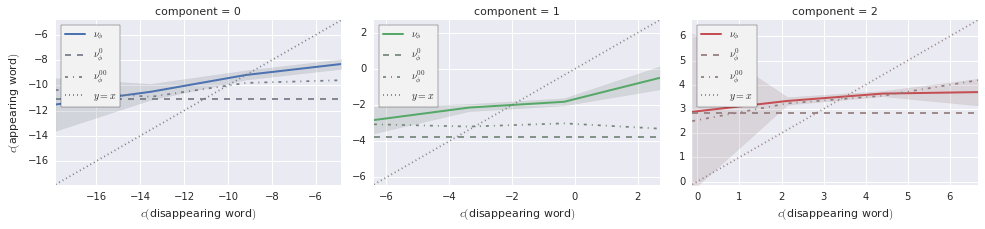

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.68356968  0.18073279]



aoa  frequency  letters_count
Component-0 -0.729483   0.381591      -0.567665
Component-1  0.375526  -0.470227      -0.798665

Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 24971) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   14 of 24971) |                     | Elapsed Time: 0:00:03 ETA: 1:38:10

  0% (   41 of 24971) |                     | Elapsed Time: 0:00:03 ETA: 0:35:35

  0% (   71 of 24971) |                     | Elapsed Time: 0:00:03 ETA: 0:21:42

  0% (  101 of 24971) |                     | Elapsed Time: 0:00:03 ETA: 0:16:06

  0% (  130 of 24971) |                     | Elapsed Time: 0:00:04 ETA: 0:02:58

  0% (  160 of 24971) |                     | Elapsed Time: 0:00:04 ETA: 0:02:56

  0% (  190 of 24971) |                     | Elapsed Time: 0:00:04 ETA: 0:02:54

  0% (  220 of 24971) |                     | Elapsed Time: 0:00:04 ETA: 0:02:56

  1% (  250 of 24971) |                     | Elapsed Time: 0:00:04 ETA: 0:02:55

  1% (  279 of 24971) |                     | Elapsed Time: 0:00:05 ETA: 0:02:55

  1% (  313 of 24971) |                     | Elapsed Time: 0:00:05 ETA: 0:02:55

  1% (  342 of 24971) |                     | Elapsed Time: 0:00:05 ETA: 0:02:55

  1% (  372 of 24971) |                     | Elapsed Time: 0:00:05 ETA: 0:02:53

  1% (  417 of 24971) |                     | Elapsed Time: 0:00:06 ETA: 0:02:49

  1% (  448 of 24971) |                     | Elapsed Time: 0:00:06 ETA: 0:02:46

  1% (  478 of 24971) |                     | Elapsed Time: 0:00:06 ETA: 0:02:44

  2% (  509 of 24971) |                     | Elapsed Time: 0:00:06 ETA: 0:02:45

  2% (  539 of 24971) |                     | Elapsed Time: 0:00:06 ETA: 0:02:45

  2% (  569 of 24971) |                     | Elapsed Time: 0:00:07 ETA: 0:02:44

  2% (  606 of 24971) |                     | Elapsed Time: 0:00:07 ETA: 0:02:37

  2% (  643 of 24971) |                     | Elapsed Time: 0:00:07 ETA: 0:02:30

  2% (  680 of 24971) |                     | Elapsed Time: 0:00:07 ETA: 0:02:24

  2% (  711 of 24971) |                     | Elapsed Time: 0:00:07 ETA: 0:02:23

  2% (  744 of 24971) |                     | Elapsed Time: 0:00:08 ETA: 0:02:21

  3% (  777 of 24971) |                     | Elapsed Time: 0:00:08 ETA: 0:02:24

  3% (  812 of 24971) |                     | Elapsed Time: 0:00:08 ETA: 0:02:27

  3% (  849 of 24971) |                     | Elapsed Time: 0:00:08 ETA: 0:02:25

  3% (  885 of 24971) |                     | Elapsed Time: 0:00:09 ETA: 0:02:18

  3% (  920 of 24971) |                     | Elapsed Time: 0:00:09 ETA: 0:02:17

  3% (  952 of 24971) |                     | Elapsed Time: 0:00:09 ETA: 0:02:21

  3% (  981 of 24971) |                     | Elapsed Time: 0:00:09 ETA: 0:02:26

  4% ( 1011 of 24971) |                     | Elapsed Time: 0:00:09 ETA: 0:02:33

  4% ( 1041 of 24971) |                     | Elapsed Time: 0:00:10 ETA: 0:02:40

  4% ( 1073 of 24971) |                     | Elapsed Time: 0:00:10 ETA: 0:02:43

  4% ( 1103 of 24971) |                     | Elapsed Time: 0:00:10 ETA: 0:02:43

  4% ( 1135 of 24971) |                     | Elapsed Time: 0:00:10 ETA: 0:02:40

  4% ( 1170 of 24971) |                     | Elapsed Time: 0:00:10 ETA: 0:02:34

  4% ( 1208 of 24971) |#                    | Elapsed Time: 0:00:11 ETA: 0:02:27

  5% ( 1249 of 24971) |#                    | Elapsed Time: 0:00:11 ETA: 0:02:21

  5% ( 1283 of 24971) |#                    | Elapsed Time: 0:00:11 ETA: 0:02:18

  5% ( 1311 of 24971) |#                    | Elapsed Time: 0:00:11 ETA: 0:02:22

  5% ( 1336 of 24971) |#                    | Elapsed Time: 0:00:11 ETA: 0:02:34

  5% ( 1362 of 24971) |#                    | Elapsed Time: 0:00:12 ETA: 0:02:48

  5% ( 1388 of 24971) |#                    | Elapsed Time: 0:00:12 ETA: 0:03:02

  5% ( 1412 of 24971) |#                    | Elapsed Time: 0:00:12 ETA: 0:03:17

  5% ( 1437 of 24971) |#                    | Elapsed Time: 0:00:12 ETA: 0:03:16

  5% ( 1462 of 24971) |#                    | Elapsed Time: 0:00:12 ETA: 0:03:16

  5% ( 1486 of 24971) |#                    | Elapsed Time: 0:00:13 ETA: 0:03:17

  6% ( 1512 of 24971) |#                    | Elapsed Time: 0:00:13 ETA: 0:03:16

  6% ( 1536 of 24971) |#                    | Elapsed Time: 0:00:13 ETA: 0:03:14

  6% ( 1561 of 24971) |#                    | Elapsed Time: 0:00:13 ETA: 0:03:14

  6% ( 1587 of 24971) |#                    | Elapsed Time: 0:00:14 ETA: 0:03:14

  6% ( 1621 of 24971) |#                    | Elapsed Time: 0:00:14 ETA: 0:02:59

  6% ( 1654 of 24971) |#                    | Elapsed Time: 0:00:14 ETA: 0:02:48

  6% ( 1682 of 24971) |#                    | Elapsed Time: 0:00:14 ETA: 0:02:44

  6% ( 1710 of 24971) |#                    | Elapsed Time: 0:00:14 ETA: 0:02:39

  6% ( 1740 of 24971) |#                    | Elapsed Time: 0:00:15 ETA: 0:02:36

  7% ( 1773 of 24971) |#                    | Elapsed Time: 0:00:15 ETA: 0:02:39

  7% ( 1805 of 24971) |#                    | Elapsed Time: 0:00:15 ETA: 0:02:35

  7% ( 1841 of 24971) |#                    | Elapsed Time: 0:00:15 ETA: 0:02:27

  7% ( 1891 of 24971) |#                    | Elapsed Time: 0:00:15 ETA: 0:02:19

  7% ( 1926 of 24971) |#                    | Elapsed Time: 0:00:16 ETA: 0:02:17

  7% ( 1963 of 24971) |#                    | Elapsed Time: 0:00:16 ETA: 0:02:12

  8% ( 1999 of 24971) |#                    | Elapsed Time: 0:00:16 ETA: 0:02:12

  8% ( 2036 of 24971) |#                    | Elapsed Time: 0:00:16 ETA: 0:02:10

  8% ( 2073 of 24971) |#                    | Elapsed Time: 0:00:17 ETA: 0:02:09

  8% ( 2109 of 24971) |#                    | Elapsed Time: 0:00:17 ETA: 0:02:08

  8% ( 2143 of 24971) |#                    | Elapsed Time: 0:00:17 ETA: 0:02:10

  8% ( 2185 of 24971) |#                    | Elapsed Time: 0:00:17 ETA: 0:02:09

  8% ( 2212 of 24971) |#                    | Elapsed Time: 0:00:17 ETA: 0:02:17

  8% ( 2242 of 24971) |#                    | Elapsed Time: 0:00:18 ETA: 0:02:24

  9% ( 2272 of 24971) |#                    | Elapsed Time: 0:00:18 ETA: 0:02:30

  9% ( 2301 of 24971) |#                    | Elapsed Time: 0:00:18 ETA: 0:02:38

  9% ( 2328 of 24971) |#                    | Elapsed Time: 0:00:18 ETA: 0:02:44

  9% ( 2358 of 24971) |#                    | Elapsed Time: 0:00:18 ETA: 0:02:43

  9% ( 2390 of 24971) |##                   | Elapsed Time: 0:00:19 ETA: 0:02:39

  9% ( 2430 of 24971) |##                   | Elapsed Time: 0:00:19 ETA: 0:02:27

  9% ( 2466 of 24971) |##                   | Elapsed Time: 0:00:19 ETA: 0:02:18

 10% ( 2515 of 24971) |##                   | Elapsed Time: 0:00:19 ETA: 0:02:13

 10% ( 2542 of 24971) |##                   | Elapsed Time: 0:00:20 ETA: 0:02:15

 10% ( 2570 of 24971) |##                   | Elapsed Time: 0:00:20 ETA: 0:02:23

 10% ( 2602 of 24971) |##                   | Elapsed Time: 0:00:20 ETA: 0:02:28

 10% ( 2631 of 24971) |##                   | Elapsed Time: 0:00:20 ETA: 0:02:35

 10% ( 2668 of 24971) |##                   | Elapsed Time: 0:00:20 ETA: 0:02:28

 10% ( 2702 of 24971) |##                   | Elapsed Time: 0:00:21 ETA: 0:02:22

 10% ( 2735 of 24971) |##                   | Elapsed Time: 0:00:21 ETA: 0:02:19

 11% ( 2772 of 24971) |##                   | Elapsed Time: 0:00:21 ETA: 0:02:11

 11% ( 2810 of 24971) |##                   | Elapsed Time: 0:00:21 ETA: 0:02:07

 11% ( 2845 of 24971) |##                   | Elapsed Time: 0:00:21 ETA: 0:02:08

 11% ( 2880 of 24971) |##                   | Elapsed Time: 0:00:22 ETA: 0:02:06

 11% ( 2916 of 24971) |##                   | Elapsed Time: 0:00:22 ETA: 0:02:05

 11% ( 2950 of 24971) |##                   | Elapsed Time: 0:00:22 ETA: 0:02:09

 11% ( 2978 of 24971) |##                   | Elapsed Time: 0:00:22 ETA: 0:02:15

 12% ( 3003 of 24971) |##                   | Elapsed Time: 0:00:22 ETA: 0:02:24

 12% ( 3028 of 24971) |##                   | Elapsed Time: 0:00:23 ETA: 0:02:37

 12% ( 3054 of 24971) |##                   | Elapsed Time: 0:00:23 ETA: 0:02:49

 12% ( 3079 of 24971) |##                   | Elapsed Time: 0:00:23 ETA: 0:02:59

 12% ( 3122 of 24971) |##                   | Elapsed Time: 0:00:23 ETA: 0:02:59

 12% ( 3153 of 24971) |##                   | Elapsed Time: 0:00:24 ETA: 0:02:43

 12% ( 3187 of 24971) |##                   | Elapsed Time: 0:00:24 ETA: 0:02:32

 12% ( 3219 of 24971) |##                   | Elapsed Time: 0:00:24 ETA: 0:02:24

 13% ( 3252 of 24971) |##                   | Elapsed Time: 0:00:24 ETA: 0:02:16

 13% ( 3284 of 24971) |##                   | Elapsed Time: 0:00:24 ETA: 0:02:17

 13% ( 3321 of 24971) |##                   | Elapsed Time: 0:00:25 ETA: 0:02:10

 13% ( 3355 of 24971) |##                   | Elapsed Time: 0:00:25 ETA: 0:02:13

 13% ( 3389 of 24971) |##                   | Elapsed Time: 0:00:25 ETA: 0:02:10

 13% ( 3434 of 24971) |##                   | Elapsed Time: 0:00:25 ETA: 0:02:09

 13% ( 3464 of 24971) |##                   | Elapsed Time: 0:00:26 ETA: 0:02:16

 13% ( 3493 of 24971) |##                   | Elapsed Time: 0:00:26 ETA: 0:02:22

 14% ( 3527 of 24971) |##                   | Elapsed Time: 0:00:26 ETA: 0:02:22

 14% ( 3558 of 24971) |##                   | Elapsed Time: 0:00:26 ETA: 0:02:23

 14% ( 3591 of 24971) |###                  | Elapsed Time: 0:00:26 ETA: 0:02:19

 14% ( 3623 of 24971) |###                  | Elapsed Time: 0:00:27 ETA: 0:02:16

 14% ( 3657 of 24971) |###                  | Elapsed Time: 0:00:27 ETA: 0:02:13

 14% ( 3693 of 24971) |###                  | Elapsed Time: 0:00:27 ETA: 0:02:11

 14% ( 3721 of 24971) |###                  | Elapsed Time: 0:00:27 ETA: 0:02:16

 15% ( 3763 of 24971) |###                  | Elapsed Time: 0:00:27 ETA: 0:02:16

 15% ( 3795 of 24971) |###                  | Elapsed Time: 0:00:28 ETA: 0:02:17

 15% ( 3831 of 24971) |###                  | Elapsed Time: 0:00:28 ETA: 0:02:15

 15% ( 3867 of 24971) |###                  | Elapsed Time: 0:00:28 ETA: 0:02:11

 15% ( 3901 of 24971) |###                  | Elapsed Time: 0:00:28 ETA: 0:02:07

 15% ( 3934 of 24971) |###                  | Elapsed Time: 0:00:28 ETA: 0:02:05

 15% ( 3963 of 24971) |###                  | Elapsed Time: 0:00:29 ETA: 0:02:10

 16% ( 3998 of 24971) |###                  | Elapsed Time: 0:00:29 ETA: 0:02:11

 16% ( 4030 of 24971) |###                  | Elapsed Time: 0:00:29 ETA: 0:02:14

 16% ( 4077 of 24971) |###                  | Elapsed Time: 0:00:29 ETA: 0:02:09

 16% ( 4112 of 24971) |###                  | Elapsed Time: 0:00:30 ETA: 0:02:07

 16% ( 4146 of 24971) |###                  | Elapsed Time: 0:00:30 ETA: 0:02:05

 16% ( 4180 of 24971) |###                  | Elapsed Time: 0:00:30 ETA: 0:02:05

 16% ( 4210 of 24971) |###                  | Elapsed Time: 0:00:30 ETA: 0:02:07

 16% ( 4236 of 24971) |###                  | Elapsed Time: 0:00:30 ETA: 0:02:17

 17% ( 4270 of 24971) |###                  | Elapsed Time: 0:00:31 ETA: 0:02:17

 17% ( 4307 of 24971) |###                  | Elapsed Time: 0:00:31 ETA: 0:02:15

 17% ( 4340 of 24971) |###                  | Elapsed Time: 0:00:31 ETA: 0:02:15

 17% ( 4370 of 24971) |###                  | Elapsed Time: 0:00:31 ETA: 0:02:09

 17% ( 4407 of 24971) |###                  | Elapsed Time: 0:00:31 ETA: 0:02:03

 17% ( 4439 of 24971) |###                  | Elapsed Time: 0:00:32 ETA: 0:02:06

 17% ( 4467 of 24971) |###                  | Elapsed Time: 0:00:32 ETA: 0:02:12

 17% ( 4489 of 24971) |###                  | Elapsed Time: 0:00:32 ETA: 0:02:24

 18% ( 4513 of 24971) |###                  | Elapsed Time: 0:00:32 ETA: 0:02:35

 18% ( 4537 of 24971) |###                  | Elapsed Time: 0:00:33 ETA: 0:02:47

 18% ( 4568 of 24971) |###                  | Elapsed Time: 0:00:33 ETA: 0:02:49

 18% ( 4602 of 24971) |###                  | Elapsed Time: 0:00:33 ETA: 0:02:35

 18% ( 4638 of 24971) |###                  | Elapsed Time: 0:00:33 ETA: 0:02:18

 18% ( 4683 of 24971) |###                  | Elapsed Time: 0:00:33 ETA: 0:02:07

 18% ( 4719 of 24971) |###                  | Elapsed Time: 0:00:34 ETA: 0:01:59

 19% ( 4755 of 24971) |###                  | Elapsed Time: 0:00:34 ETA: 0:01:57

 19% ( 4791 of 24971) |####                 | Elapsed Time: 0:00:34 ETA: 0:01:56

 19% ( 4827 of 24971) |####                 | Elapsed Time: 0:00:34 ETA: 0:01:55

 19% ( 4863 of 24971) |####                 | Elapsed Time: 0:00:34 ETA: 0:01:55

 19% ( 4899 of 24971) |####                 | Elapsed Time: 0:00:35 ETA: 0:01:55

 19% ( 4925 of 24971) |####                 | Elapsed Time: 0:00:35 ETA: 0:02:01

 19% ( 4950 of 24971) |####                 | Elapsed Time: 0:00:35 ETA: 0:02:12

 19% ( 4974 of 24971) |####                 | Elapsed Time: 0:00:35 ETA: 0:02:24

 20% ( 5007 of 24971) |####                 | Elapsed Time: 0:00:36 ETA: 0:02:38

 20% ( 5031 of 24971) |####                 | Elapsed Time: 0:00:36 ETA: 0:02:49

 20% ( 5055 of 24971) |####                 | Elapsed Time: 0:00:36 ETA: 0:02:48

 20% ( 5079 of 24971) |####                 | Elapsed Time: 0:00:36 ETA: 0:02:48

 20% ( 5103 of 24971) |####                 | Elapsed Time: 0:00:36 ETA: 0:02:49

 20% ( 5127 of 24971) |####                 | Elapsed Time: 0:00:37 ETA: 0:02:48

 20% ( 5151 of 24971) |####                 | Elapsed Time: 0:00:37 ETA: 0:02:48

 20% ( 5176 of 24971) |####                 | Elapsed Time: 0:00:37 ETA: 0:02:48

 20% ( 5200 of 24971) |####                 | Elapsed Time: 0:00:37 ETA: 0:02:48

 20% ( 5226 of 24971) |####                 | Elapsed Time: 0:00:37 ETA: 0:02:46

 21% ( 5252 of 24971) |####                 | Elapsed Time: 0:00:38 ETA: 0:02:43

 21% ( 5287 of 24971) |####                 | Elapsed Time: 0:00:38 ETA: 0:02:29

 21% ( 5322 of 24971) |####                 | Elapsed Time: 0:00:38 ETA: 0:02:21

 21% ( 5352 of 24971) |####                 | Elapsed Time: 0:00:38 ETA: 0:02:16

 21% ( 5382 of 24971) |####                 | Elapsed Time: 0:00:38 ETA: 0:02:10

 21% ( 5414 of 24971) |####                 | Elapsed Time: 0:00:39 ETA: 0:02:10

 21% ( 5446 of 24971) |####                 | Elapsed Time: 0:00:39 ETA: 0:02:11

 21% ( 5479 of 24971) |####                 | Elapsed Time: 0:00:39 ETA: 0:02:09

 22% ( 5513 of 24971) |####                 | Elapsed Time: 0:00:39 ETA: 0:02:04

 22% ( 5544 of 24971) |####                 | Elapsed Time: 0:00:39 ETA: 0:02:05

 22% ( 5581 of 24971) |####                 | Elapsed Time: 0:00:40 ETA: 0:02:01

 22% ( 5619 of 24971) |####                 | Elapsed Time: 0:00:40 ETA: 0:01:58

 22% ( 5650 of 24971) |####                 | Elapsed Time: 0:00:40 ETA: 0:02:00

 22% ( 5681 of 24971) |####                 | Elapsed Time: 0:00:40 ETA: 0:02:00

 22% ( 5719 of 24971) |####                 | Elapsed Time: 0:00:41 ETA: 0:01:57

 23% ( 5752 of 24971) |####                 | Elapsed Time: 0:00:41 ETA: 0:02:00

 23% ( 5791 of 24971) |####                 | Elapsed Time: 0:00:41 ETA: 0:01:53

 23% ( 5819 of 24971) |####                 | Elapsed Time: 0:00:41 ETA: 0:01:55

 23% ( 5843 of 24971) |####                 | Elapsed Time: 0:00:41 ETA: 0:02:04

 23% ( 5876 of 24971) |####                 | Elapsed Time: 0:00:42 ETA: 0:02:06

 23% ( 5909 of 24971) |####                 | Elapsed Time: 0:00:42 ETA: 0:02:07

 23% ( 5931 of 24971) |####                 | Elapsed Time: 0:00:42 ETA: 0:02:21

 23% ( 5956 of 24971) |#####                | Elapsed Time: 0:00:42 ETA: 0:02:19

 23% ( 5992 of 24971) |#####                | Elapsed Time: 0:00:42 ETA: 0:02:09

 24% ( 6030 of 24971) |#####                | Elapsed Time: 0:00:43 ETA: 0:02:09

 24% ( 6064 of 24971) |#####                | Elapsed Time: 0:00:43 ETA: 0:02:01

 24% ( 6098 of 24971) |#####                | Elapsed Time: 0:00:43 ETA: 0:01:52

 24% ( 6130 of 24971) |#####                | Elapsed Time: 0:00:43 ETA: 0:01:51

 24% ( 6162 of 24971) |#####                | Elapsed Time: 0:00:43 ETA: 0:01:56

 24% ( 6196 of 24971) |#####                | Elapsed Time: 0:00:44 ETA: 0:01:57

 25% ( 6243 of 24971) |#####                | Elapsed Time: 0:00:44 ETA: 0:01:59

 25% ( 6278 of 24971) |#####                | Elapsed Time: 0:00:44 ETA: 0:01:56

 25% ( 6314 of 24971) |#####                | Elapsed Time: 0:00:44 ETA: 0:01:54

 25% ( 6348 of 24971) |#####                | Elapsed Time: 0:00:45 ETA: 0:01:52

 25% ( 6382 of 24971) |#####                | Elapsed Time: 0:00:45 ETA: 0:01:49

 25% ( 6418 of 24971) |#####                | Elapsed Time: 0:00:45 ETA: 0:01:49

 25% ( 6450 of 24971) |#####                | Elapsed Time: 0:00:45 ETA: 0:01:51

 25% ( 6481 of 24971) |#####                | Elapsed Time: 0:00:45 ETA: 0:01:54

 26% ( 6513 of 24971) |#####                | Elapsed Time: 0:00:46 ETA: 0:01:56

 26% ( 6555 of 24971) |#####                | Elapsed Time: 0:00:46 ETA: 0:01:56

 26% ( 6590 of 24971) |#####                | Elapsed Time: 0:00:46 ETA: 0:01:55

 26% ( 6626 of 24971) |#####                | Elapsed Time: 0:00:46 ETA: 0:01:49

 26% ( 6654 of 24971) |#####                | Elapsed Time: 0:00:46 ETA: 0:01:54

 26% ( 6687 of 24971) |#####                | Elapsed Time: 0:00:47 ETA: 0:01:54

 26% ( 6723 of 24971) |#####                | Elapsed Time: 0:00:47 ETA: 0:01:53

 27% ( 6758 of 24971) |#####                | Elapsed Time: 0:00:47 ETA: 0:01:53

 27% ( 6794 of 24971) |#####                | Elapsed Time: 0:00:47 ETA: 0:01:49

 27% ( 6831 of 24971) |#####                | Elapsed Time: 0:00:48 ETA: 0:01:44

 27% ( 6868 of 24971) |#####                | Elapsed Time: 0:00:48 ETA: 0:01:45

 27% ( 6902 of 24971) |#####                | Elapsed Time: 0:00:48 ETA: 0:01:46

 27% ( 6936 of 24971) |#####                | Elapsed Time: 0:00:48 ETA: 0:01:46

 27% ( 6971 of 24971) |#####                | Elapsed Time: 0:00:48 ETA: 0:01:47

 28% ( 7002 of 24971) |#####                | Elapsed Time: 0:00:49 ETA: 0:01:51

 28% ( 7032 of 24971) |#####                | Elapsed Time: 0:00:49 ETA: 0:01:53

 28% ( 7052 of 24971) |#####                | Elapsed Time: 0:00:49 ETA: 0:02:04

 28% ( 7072 of 24971) |#####                | Elapsed Time: 0:00:49 ETA: 0:02:22

 28% ( 7103 of 24971) |#####                | Elapsed Time: 0:00:49 ETA: 0:02:25

 28% ( 7135 of 24971) |######               | Elapsed Time: 0:00:50 ETA: 0:02:24

 28% ( 7180 of 24971) |######               | Elapsed Time: 0:00:50 ETA: 0:02:14

 28% ( 7214 of 24971) |######               | Elapsed Time: 0:00:50 ETA: 0:02:00

 29% ( 7250 of 24971) |######               | Elapsed Time: 0:00:50 ETA: 0:01:52

 29% ( 7284 of 24971) |######               | Elapsed Time: 0:00:51 ETA: 0:01:48

 29% ( 7320 of 24971) |######               | Elapsed Time: 0:00:51 ETA: 0:01:45

 29% ( 7355 of 24971) |######               | Elapsed Time: 0:00:51 ETA: 0:01:43

 29% ( 7382 of 24971) |######               | Elapsed Time: 0:00:51 ETA: 0:01:47

 29% ( 7413 of 24971) |######               | Elapsed Time: 0:00:51 ETA: 0:01:52

 29% ( 7447 of 24971) |######               | Elapsed Time: 0:00:52 ETA: 0:01:52

 30% ( 7492 of 24971) |######               | Elapsed Time: 0:00:52 ETA: 0:01:56

 30% ( 7529 of 24971) |######               | Elapsed Time: 0:00:52 ETA: 0:01:50

 30% ( 7566 of 24971) |######               | Elapsed Time: 0:00:52 ETA: 0:01:42

 30% ( 7601 of 24971) |######               | Elapsed Time: 0:00:52 ETA: 0:01:42

 30% ( 7637 of 24971) |######               | Elapsed Time: 0:00:53 ETA: 0:01:38

 30% ( 7675 of 24971) |######               | Elapsed Time: 0:00:53 ETA: 0:01:37

 30% ( 7713 of 24971) |######               | Elapsed Time: 0:00:53 ETA: 0:01:37

 31% ( 7744 of 24971) |######               | Elapsed Time: 0:00:53 ETA: 0:01:39

 31% ( 7776 of 24971) |######               | Elapsed Time: 0:00:53 ETA: 0:01:41

 31% ( 7814 of 24971) |######               | Elapsed Time: 0:00:54 ETA: 0:01:48

 31% ( 7836 of 24971) |######               | Elapsed Time: 0:00:54 ETA: 0:02:01

 31% ( 7860 of 24971) |######               | Elapsed Time: 0:00:54 ETA: 0:02:10

 31% ( 7885 of 24971) |######               | Elapsed Time: 0:00:54 ETA: 0:02:16

 31% ( 7919 of 24971) |######               | Elapsed Time: 0:00:55 ETA: 0:02:14

 31% ( 7951 of 24971) |######               | Elapsed Time: 0:00:55 ETA: 0:02:02

 31% ( 7984 of 24971) |######               | Elapsed Time: 0:00:55 ETA: 0:01:55

 32% ( 8012 of 24971) |######               | Elapsed Time: 0:00:55 ETA: 0:01:51

 32% ( 8042 of 24971) |######               | Elapsed Time: 0:00:55 ETA: 0:01:52

 32% ( 8072 of 24971) |######               | Elapsed Time: 0:00:56 ETA: 0:01:55

 32% ( 8116 of 24971) |######               | Elapsed Time: 0:00:56 ETA: 0:01:53

 32% ( 8152 of 24971) |######               | Elapsed Time: 0:00:56 ETA: 0:01:48

 32% ( 8190 of 24971) |######               | Elapsed Time: 0:00:56 ETA: 0:01:41

 32% ( 8225 of 24971) |######               | Elapsed Time: 0:00:57 ETA: 0:01:38

 33% ( 8256 of 24971) |######               | Elapsed Time: 0:00:57 ETA: 0:01:38

 33% ( 8292 of 24971) |######               | Elapsed Time: 0:00:57 ETA: 0:01:37

 33% ( 8328 of 24971) |#######              | Elapsed Time: 0:00:57 ETA: 0:01:37

 33% ( 8359 of 24971) |#######              | Elapsed Time: 0:00:57 ETA: 0:01:41

 33% ( 8396 of 24971) |#######              | Elapsed Time: 0:00:58 ETA: 0:01:39

 33% ( 8428 of 24971) |#######              | Elapsed Time: 0:00:58 ETA: 0:01:38

 33% ( 8465 of 24971) |#######              | Elapsed Time: 0:00:58 ETA: 0:01:38

 34% ( 8491 of 24971) |#######              | Elapsed Time: 0:00:58 ETA: 0:01:45

 34% ( 8511 of 24971) |#######              | Elapsed Time: 0:00:58 ETA: 0:01:54

 34% ( 8534 of 24971) |#######              | Elapsed Time: 0:00:59 ETA: 0:02:03

 34% ( 8566 of 24971) |#######              | Elapsed Time: 0:00:59 ETA: 0:02:05

 34% ( 8593 of 24971) |#######              | Elapsed Time: 0:00:59 ETA: 0:02:14

 34% ( 8628 of 24971) |#######              | Elapsed Time: 0:00:59 ETA: 0:01:58

 34% ( 8664 of 24971) |#######              | Elapsed Time: 0:00:59 ETA: 0:01:45

 34% ( 8690 of 24971) |#######              | Elapsed Time: 0:01:00 ETA: 0:01:49

 34% ( 8721 of 24971) |#######              | Elapsed Time: 0:01:00 ETA: 0:01:46

 35% ( 8754 of 24971) |#######              | Elapsed Time: 0:01:00 ETA: 0:01:51

 35% ( 8791 of 24971) |#######              | Elapsed Time: 0:01:00 ETA: 0:01:50

 35% ( 8825 of 24971) |#######              | Elapsed Time: 0:01:00 ETA: 0:01:46

 35% ( 8860 of 24971) |#######              | Elapsed Time: 0:01:01 ETA: 0:01:42

 35% ( 8897 of 24971) |#######              | Elapsed Time: 0:01:01 ETA: 0:01:36

 35% ( 8934 of 24971) |#######              | Elapsed Time: 0:01:01 ETA: 0:01:32

 35% ( 8968 of 24971) |#######              | Elapsed Time: 0:01:01 ETA: 0:01:32

 36% ( 9001 of 24971) |#######              | Elapsed Time: 0:01:01 ETA: 0:01:33

 36% ( 9032 of 24971) |#######              | Elapsed Time: 0:01:02 ETA: 0:01:35

 36% ( 9070 of 24971) |#######              | Elapsed Time: 0:01:02 ETA: 0:01:36

 36% ( 9104 of 24971) |#######              | Elapsed Time: 0:01:02 ETA: 0:01:37

 36% ( 9138 of 24971) |#######              | Elapsed Time: 0:01:02 ETA: 0:01:36

 36% ( 9168 of 24971) |#######              | Elapsed Time: 0:01:03 ETA: 0:01:41

 36% ( 9200 of 24971) |#######              | Elapsed Time: 0:01:03 ETA: 0:01:39

 36% ( 9236 of 24971) |#######              | Elapsed Time: 0:01:03 ETA: 0:01:40

 37% ( 9270 of 24971) |#######              | Elapsed Time: 0:01:03 ETA: 0:01:38

 37% ( 9306 of 24971) |#######              | Elapsed Time: 0:01:03 ETA: 0:01:32

 37% ( 9341 of 24971) |#######              | Elapsed Time: 0:01:04 ETA: 0:01:32

 37% ( 9379 of 24971) |#######              | Elapsed Time: 0:01:04 ETA: 0:01:37

 37% ( 9415 of 24971) |#######              | Elapsed Time: 0:01:04 ETA: 0:01:36

 37% ( 9451 of 24971) |#######              | Elapsed Time: 0:01:04 ETA: 0:01:35

 37% ( 9481 of 24971) |#######              | Elapsed Time: 0:01:04 ETA: 0:01:37

 38% ( 9516 of 24971) |########             | Elapsed Time: 0:01:05 ETA: 0:01:36

 38% ( 9548 of 24971) |########             | Elapsed Time: 0:01:05 ETA: 0:01:33

 38% ( 9578 of 24971) |########             | Elapsed Time: 0:01:05 ETA: 0:01:40

 38% ( 9610 of 24971) |########             | Elapsed Time: 0:01:05 ETA: 0:01:39

 38% ( 9641 of 24971) |########             | Elapsed Time: 0:01:06 ETA: 0:01:40

 38% ( 9677 of 24971) |########             | Elapsed Time: 0:01:06 ETA: 0:01:38

 38% ( 9699 of 24971) |########             | Elapsed Time: 0:01:06 ETA: 0:01:47

 38% ( 9733 of 24971) |########             | Elapsed Time: 0:01:06 ETA: 0:01:46

 39% ( 9767 of 24971) |########             | Elapsed Time: 0:01:06 ETA: 0:01:44

 39% ( 9799 of 24971) |########             | Elapsed Time: 0:01:07 ETA: 0:01:42

 39% ( 9837 of 24971) |########             | Elapsed Time: 0:01:07 ETA: 0:01:34

 39% ( 9872 of 24971) |########             | Elapsed Time: 0:01:07 ETA: 0:01:30

 39% ( 9906 of 24971) |########             | Elapsed Time: 0:01:07 ETA: 0:01:29

 39% ( 9940 of 24971) |########             | Elapsed Time: 0:01:07 ETA: 0:01:27

 39% ( 9971 of 24971) |########             | Elapsed Time: 0:01:08 ETA: 0:01:29

 40% (10007 of 24971) |########             | Elapsed Time: 0:01:08 ETA: 0:01:31

 40% (10042 of 24971) |########             | Elapsed Time: 0:01:08 ETA: 0:01:30

 40% (10075 of 24971) |########             | Elapsed Time: 0:01:08 ETA: 0:01:31

 40% (10108 of 24971) |########             | Elapsed Time: 0:01:08 ETA: 0:01:32

 40% (10136 of 24971) |########             | Elapsed Time: 0:01:09 ETA: 0:01:34

 40% (10172 of 24971) |########             | Elapsed Time: 0:01:09 ETA: 0:01:32

 40% (10207 of 24971) |########             | Elapsed Time: 0:01:09 ETA: 0:01:31

 41% (10244 of 24971) |########             | Elapsed Time: 0:01:09 ETA: 0:01:29

 41% (10279 of 24971) |########             | Elapsed Time: 0:01:09 ETA: 0:01:25

 41% (10319 of 24971) |########             | Elapsed Time: 0:01:10 ETA: 0:01:23

 41% (10355 of 24971) |########             | Elapsed Time: 0:01:10 ETA: 0:01:23

 41% (10390 of 24971) |########             | Elapsed Time: 0:01:10 ETA: 0:01:23

 41% (10418 of 24971) |########             | Elapsed Time: 0:01:10 ETA: 0:01:27

 41% (10453 of 24971) |########             | Elapsed Time: 0:01:11 ETA: 0:01:28

 41% (10487 of 24971) |########             | Elapsed Time: 0:01:11 ETA: 0:01:29

 42% (10517 of 24971) |########             | Elapsed Time: 0:01:11 ETA: 0:01:33

 42% (10548 of 24971) |########             | Elapsed Time: 0:01:11 ETA: 0:01:32

 42% (10585 of 24971) |########             | Elapsed Time: 0:01:11 ETA: 0:01:30

 42% (10631 of 24971) |########             | Elapsed Time: 0:01:12 ETA: 0:01:30

 42% (10661 of 24971) |########             | Elapsed Time: 0:01:12 ETA: 0:01:31

 42% (10689 of 24971) |########             | Elapsed Time: 0:01:12 ETA: 0:01:29

 42% (10723 of 24971) |#########            | Elapsed Time: 0:01:12 ETA: 0:01:31

 43% (10756 of 24971) |#########            | Elapsed Time: 0:01:12 ETA: 0:01:32

 43% (10786 of 24971) |#########            | Elapsed Time: 0:01:13 ETA: 0:01:34

 43% (10819 of 24971) |#########            | Elapsed Time: 0:01:13 ETA: 0:01:30

 43% (10849 of 24971) |#########            | Elapsed Time: 0:01:13 ETA: 0:01:32

 43% (10881 of 24971) |#########            | Elapsed Time: 0:01:13 ETA: 0:01:34

 43% (10910 of 24971) |#########            | Elapsed Time: 0:01:13 ETA: 0:01:34

 43% (10941 of 24971) |#########            | Elapsed Time: 0:01:14 ETA: 0:01:36

 43% (10970 of 24971) |#########            | Elapsed Time: 0:01:14 ETA: 0:01:37

 44% (10999 of 24971) |#########            | Elapsed Time: 0:01:14 ETA: 0:01:38

 44% (11035 of 24971) |#########            | Elapsed Time: 0:01:14 ETA: 0:01:36

 44% (11071 of 24971) |#########            | Elapsed Time: 0:01:15 ETA: 0:01:29

 44% (11098 of 24971) |#########            | Elapsed Time: 0:01:15 ETA: 0:01:31

 44% (11126 of 24971) |#########            | Elapsed Time: 0:01:15 ETA: 0:01:30

 44% (11164 of 24971) |#########            | Elapsed Time: 0:01:15 ETA: 0:01:25

 44% (11201 of 24971) |#########            | Elapsed Time: 0:01:15 ETA: 0:01:26

 45% (11237 of 24971) |#########            | Elapsed Time: 0:01:16 ETA: 0:01:25

 45% (11265 of 24971) |#########            | Elapsed Time: 0:01:16 ETA: 0:01:25

 45% (11298 of 24971) |#########            | Elapsed Time: 0:01:16 ETA: 0:01:25

 45% (11329 of 24971) |#########            | Elapsed Time: 0:01:16 ETA: 0:01:28

 45% (11363 of 24971) |#########            | Elapsed Time: 0:01:16 ETA: 0:01:29

 45% (11393 of 24971) |#########            | Elapsed Time: 0:01:17 ETA: 0:01:27

 45% (11429 of 24971) |#########            | Elapsed Time: 0:01:17 ETA: 0:01:27

 45% (11462 of 24971) |#########            | Elapsed Time: 0:01:17 ETA: 0:01:25

 46% (11489 of 24971) |#########            | Elapsed Time: 0:01:17 ETA: 0:01:28

 46% (11528 of 24971) |#########            | Elapsed Time: 0:01:17 ETA: 0:01:21

 46% (11567 of 24971) |#########            | Elapsed Time: 0:01:18 ETA: 0:01:21

 46% (11602 of 24971) |#########            | Elapsed Time: 0:01:18 ETA: 0:01:21

 46% (11625 of 24971) |#########            | Elapsed Time: 0:01:18 ETA: 0:01:24

 46% (11650 of 24971) |#########            | Elapsed Time: 0:01:18 ETA: 0:01:30

 46% (11678 of 24971) |#########            | Elapsed Time: 0:01:19 ETA: 0:01:38

 46% (11704 of 24971) |#########            | Elapsed Time: 0:01:19 ETA: 0:01:45

 47% (11738 of 24971) |#########            | Elapsed Time: 0:01:19 ETA: 0:01:43

 47% (11775 of 24971) |#########            | Elapsed Time: 0:01:19 ETA: 0:01:28

 47% (11801 of 24971) |#########            | Elapsed Time: 0:01:19 ETA: 0:01:28

 47% (11838 of 24971) |#########            | Elapsed Time: 0:01:20 ETA: 0:01:20

 47% (11874 of 24971) |#########            | Elapsed Time: 0:01:20 ETA: 0:01:21

 47% (11908 of 24971) |##########           | Elapsed Time: 0:01:20 ETA: 0:01:22

 47% (11941 of 24971) |##########           | Elapsed Time: 0:01:20 ETA: 0:01:21

 47% (11967 of 24971) |##########           | Elapsed Time: 0:01:20 ETA: 0:01:26

 48% (12016 of 24971) |##########           | Elapsed Time: 0:01:21 ETA: 0:01:25

 48% (12050 of 24971) |##########           | Elapsed Time: 0:01:21 ETA: 0:01:25

 48% (12081 of 24971) |##########           | Elapsed Time: 0:01:21 ETA: 0:01:25

 48% (12116 of 24971) |##########           | Elapsed Time: 0:01:21 ETA: 0:01:19

 48% (12150 of 24971) |##########           | Elapsed Time: 0:01:22 ETA: 0:01:18

 48% (12194 of 24971) |##########           | Elapsed Time: 0:01:22 ETA: 0:01:15

 48% (12232 of 24971) |##########           | Elapsed Time: 0:01:22 ETA: 0:01:12

 49% (12266 of 24971) |##########           | Elapsed Time: 0:01:22 ETA: 0:01:12

 49% (12302 of 24971) |##########           | Elapsed Time: 0:01:22 ETA: 0:01:12

 49% (12331 of 24971) |##########           | Elapsed Time: 0:01:23 ETA: 0:01:15

 49% (12362 of 24971) |##########           | Elapsed Time: 0:01:23 ETA: 0:01:19

 49% (12388 of 24971) |##########           | Elapsed Time: 0:01:23 ETA: 0:01:26

 49% (12422 of 24971) |##########           | Elapsed Time: 0:01:23 ETA: 0:01:26

 49% (12453 of 24971) |##########           | Elapsed Time: 0:01:23 ETA: 0:01:27

 50% (12505 of 24971) |##########           | Elapsed Time: 0:01:24 ETA: 0:01:20

 50% (12541 of 24971) |##########           | Elapsed Time: 0:01:24 ETA: 0:01:14

 50% (12577 of 24971) |##########           | Elapsed Time: 0:01:24 ETA: 0:01:13

 50% (12615 of 24971) |##########           | Elapsed Time: 0:01:24 ETA: 0:01:09

 50% (12650 of 24971) |##########           | Elapsed Time: 0:01:25 ETA: 0:01:09

 50% (12687 of 24971) |##########           | Elapsed Time: 0:01:25 ETA: 0:01:09

 50% (12724 of 24971) |##########           | Elapsed Time: 0:01:25 ETA: 0:01:08

 51% (12762 of 24971) |##########           | Elapsed Time: 0:01:25 ETA: 0:01:09

 51% (12798 of 24971) |##########           | Elapsed Time: 0:01:25 ETA: 0:01:08

 51% (12834 of 24971) |##########           | Elapsed Time: 0:01:26 ETA: 0:01:07

 51% (12866 of 24971) |##########           | Elapsed Time: 0:01:26 ETA: 0:01:09

 51% (12901 of 24971) |##########           | Elapsed Time: 0:01:26 ETA: 0:01:11

 51% (12930 of 24971) |##########           | Elapsed Time: 0:01:26 ETA: 0:01:15

 51% (12959 of 24971) |##########           | Elapsed Time: 0:01:26 ETA: 0:01:19

 52% (12985 of 24971) |##########           | Elapsed Time: 0:01:27 ETA: 0:01:23

 52% (13022 of 24971) |##########           | Elapsed Time: 0:01:27 ETA: 0:01:20

 52% (13059 of 24971) |##########           | Elapsed Time: 0:01:27 ETA: 0:01:20

 52% (13097 of 24971) |###########          | Elapsed Time: 0:01:27 ETA: 0:01:10

 52% (13122 of 24971) |###########          | Elapsed Time: 0:01:28 ETA: 0:01:13

 52% (13156 of 24971) |###########          | Elapsed Time: 0:01:28 ETA: 0:01:11

 52% (13189 of 24971) |###########          | Elapsed Time: 0:01:28 ETA: 0:01:13

 52% (13226 of 24971) |###########          | Elapsed Time: 0:01:28 ETA: 0:01:13

 53% (13259 of 24971) |###########          | Elapsed Time: 0:01:28 ETA: 0:01:12

 53% (13293 of 24971) |###########          | Elapsed Time: 0:01:29 ETA: 0:01:09

 53% (13325 of 24971) |###########          | Elapsed Time: 0:01:29 ETA: 0:01:09

 53% (13360 of 24971) |###########          | Elapsed Time: 0:01:29 ETA: 0:01:10

 53% (13396 of 24971) |###########          | Elapsed Time: 0:01:29 ETA: 0:01:08

 53% (13441 of 24971) |###########          | Elapsed Time: 0:01:29 ETA: 0:01:07

 53% (13477 of 24971) |###########          | Elapsed Time: 0:01:30 ETA: 0:01:06

 54% (13515 of 24971) |###########          | Elapsed Time: 0:01:30 ETA: 0:01:04

 54% (13548 of 24971) |###########          | Elapsed Time: 0:01:30 ETA: 0:01:05

 54% (13576 of 24971) |###########          | Elapsed Time: 0:01:30 ETA: 0:01:08

 54% (13604 of 24971) |###########          | Elapsed Time: 0:01:30 ETA: 0:01:12

 54% (13640 of 24971) |###########          | Elapsed Time: 0:01:31 ETA: 0:01:12

 54% (13677 of 24971) |###########          | Elapsed Time: 0:01:31 ETA: 0:01:11

 54% (13713 of 24971) |###########          | Elapsed Time: 0:01:31 ETA: 0:01:08

 55% (13752 of 24971) |###########          | Elapsed Time: 0:01:31 ETA: 0:01:06

 55% (13778 of 24971) |###########          | Elapsed Time: 0:01:32 ETA: 0:01:09

 55% (13796 of 24971) |###########          | Elapsed Time: 0:01:32 ETA: 0:01:20

 55% (13815 of 24971) |###########          | Elapsed Time: 0:01:32 ETA: 0:01:32

 55% (13851 of 24971) |###########          | Elapsed Time: 0:01:32 ETA: 0:01:31

 55% (13883 of 24971) |###########          | Elapsed Time: 0:01:32 ETA: 0:01:32

 55% (13914 of 24971) |###########          | Elapsed Time: 0:01:33 ETA: 0:01:21

 55% (13947 of 24971) |###########          | Elapsed Time: 0:01:33 ETA: 0:01:11

 55% (13974 of 24971) |###########          | Elapsed Time: 0:01:33 ETA: 0:01:11

 56% (14010 of 24971) |###########          | Elapsed Time: 0:01:33 ETA: 0:01:10

 56% (14047 of 24971) |###########          | Elapsed Time: 0:01:33 ETA: 0:01:07

 56% (14083 of 24971) |###########          | Elapsed Time: 0:01:34 ETA: 0:01:06

 56% (14114 of 24971) |###########          | Elapsed Time: 0:01:34 ETA: 0:01:05

 56% (14145 of 24971) |###########          | Elapsed Time: 0:01:34 ETA: 0:01:04

 56% (14175 of 24971) |###########          | Elapsed Time: 0:01:34 ETA: 0:01:08

 56% (14205 of 24971) |###########          | Elapsed Time: 0:01:34 ETA: 0:01:11

 57% (14241 of 24971) |###########          | Elapsed Time: 0:01:35 ETA: 0:01:11

 57% (14275 of 24971) |############         | Elapsed Time: 0:01:35 ETA: 0:01:08

 57% (14303 of 24971) |############         | Elapsed Time: 0:01:35 ETA: 0:01:10

 57% (14330 of 24971) |############         | Elapsed Time: 0:01:35 ETA: 0:01:11

 57% (14379 of 24971) |############         | Elapsed Time: 0:01:36 ETA: 0:01:08

 57% (14421 of 24971) |############         | Elapsed Time: 0:01:36 ETA: 0:01:06

 57% (14460 of 24971) |############         | Elapsed Time: 0:01:36 ETA: 0:01:01

 58% (14497 of 24971) |############         | Elapsed Time: 0:01:36 ETA: 0:00:59

 58% (14533 of 24971) |############         | Elapsed Time: 0:01:36 ETA: 0:00:56

 58% (14571 of 24971) |############         | Elapsed Time: 0:01:37 ETA: 0:00:56

 58% (14606 of 24971) |############         | Elapsed Time: 0:01:37 ETA: 0:00:58

 58% (14639 of 24971) |############         | Elapsed Time: 0:01:37 ETA: 0:00:59

 58% (14671 of 24971) |############         | Elapsed Time: 0:01:37 ETA: 0:01:02

 58% (14706 of 24971) |############         | Elapsed Time: 0:01:37 ETA: 0:01:02

 59% (14740 of 24971) |############         | Elapsed Time: 0:01:38 ETA: 0:01:03

 59% (14768 of 24971) |############         | Elapsed Time: 0:01:38 ETA: 0:01:06

 59% (14802 of 24971) |############         | Elapsed Time: 0:01:38 ETA: 0:01:04

 59% (14836 of 24971) |############         | Elapsed Time: 0:01:38 ETA: 0:01:02

 59% (14876 of 24971) |############         | Elapsed Time: 0:01:38 ETA: 0:01:01

 59% (14912 of 24971) |############         | Elapsed Time: 0:01:39 ETA: 0:00:58

 59% (14934 of 24971) |############         | Elapsed Time: 0:01:39 ETA: 0:01:01

 60% (14983 of 24971) |############         | Elapsed Time: 0:01:39 ETA: 0:01:01

 60% (15007 of 24971) |############         | Elapsed Time: 0:01:39 ETA: 0:01:05

 60% (15028 of 24971) |############         | Elapsed Time: 0:01:40 ETA: 0:01:15

 60% (15060 of 24971) |############         | Elapsed Time: 0:01:40 ETA: 0:01:12

 60% (15098 of 24971) |############         | Elapsed Time: 0:01:40 ETA: 0:01:07

 60% (15137 of 24971) |############         | Elapsed Time: 0:01:40 ETA: 0:01:05

 60% (15172 of 24971) |############         | Elapsed Time: 0:01:40 ETA: 0:00:58

 60% (15207 of 24971) |############         | Elapsed Time: 0:01:41 ETA: 0:00:56

 61% (15244 of 24971) |############         | Elapsed Time: 0:01:41 ETA: 0:00:55

 61% (15277 of 24971) |############         | Elapsed Time: 0:01:41 ETA: 0:00:56

 61% (15314 of 24971) |############         | Elapsed Time: 0:01:41 ETA: 0:00:57

 61% (15351 of 24971) |############         | Elapsed Time: 0:01:41 ETA: 0:00:55

 61% (15387 of 24971) |############         | Elapsed Time: 0:01:42 ETA: 0:00:54

 61% (15426 of 24971) |############         | Elapsed Time: 0:01:42 ETA: 0:00:53

 61% (15461 of 24971) |#############        | Elapsed Time: 0:01:42 ETA: 0:00:53

 62% (15492 of 24971) |#############        | Elapsed Time: 0:01:42 ETA: 0:00:54

 62% (15526 of 24971) |#############        | Elapsed Time: 0:01:42 ETA: 0:00:56

 62% (15563 of 24971) |#############        | Elapsed Time: 0:01:43 ETA: 0:00:55

 62% (15607 of 24971) |#############        | Elapsed Time: 0:01:43 ETA: 0:00:54

 62% (15642 of 24971) |#############        | Elapsed Time: 0:01:43 ETA: 0:00:53

 62% (15674 of 24971) |#############        | Elapsed Time: 0:01:43 ETA: 0:00:53

 62% (15709 of 24971) |#############        | Elapsed Time: 0:01:43 ETA: 0:00:53

 63% (15744 of 24971) |#############        | Elapsed Time: 0:01:44 ETA: 0:00:54

 63% (15777 of 24971) |#############        | Elapsed Time: 0:01:44 ETA: 0:00:55

 63% (15808 of 24971) |#############        | Elapsed Time: 0:01:44 ETA: 0:00:56

 63% (15840 of 24971) |#############        | Elapsed Time: 0:01:44 ETA: 0:00:56

 63% (15875 of 24971) |#############        | Elapsed Time: 0:01:45 ETA: 0:00:57

 63% (15920 of 24971) |#############        | Elapsed Time: 0:01:45 ETA: 0:00:56

 63% (15957 of 24971) |#############        | Elapsed Time: 0:01:45 ETA: 0:00:54

 64% (15998 of 24971) |#############        | Elapsed Time: 0:01:45 ETA: 0:00:51

 64% (16036 of 24971) |#############        | Elapsed Time: 0:01:45 ETA: 0:00:48

 64% (16073 of 24971) |#############        | Elapsed Time: 0:01:46 ETA: 0:00:48

 64% (16103 of 24971) |#############        | Elapsed Time: 0:01:46 ETA: 0:00:50

 64% (16142 of 24971) |#############        | Elapsed Time: 0:01:46 ETA: 0:00:49

 64% (16175 of 24971) |#############        | Elapsed Time: 0:01:46 ETA: 0:00:51

 64% (16207 of 24971) |#############        | Elapsed Time: 0:01:46 ETA: 0:00:52

 65% (16246 of 24971) |#############        | Elapsed Time: 0:01:47 ETA: 0:00:55

 65% (16280 of 24971) |#############        | Elapsed Time: 0:01:47 ETA: 0:00:55

 65% (16313 of 24971) |#############        | Elapsed Time: 0:01:47 ETA: 0:00:56

 65% (16352 of 24971) |#############        | Elapsed Time: 0:01:47 ETA: 0:00:53

 65% (16381 of 24971) |#############        | Elapsed Time: 0:01:48 ETA: 0:00:54

 65% (16407 of 24971) |#############        | Elapsed Time: 0:01:48 ETA: 0:00:55

 65% (16445 of 24971) |#############        | Elapsed Time: 0:01:48 ETA: 0:00:53

 66% (16483 of 24971) |#############        | Elapsed Time: 0:01:48 ETA: 0:00:52

 66% (16516 of 24971) |#############        | Elapsed Time: 0:01:48 ETA: 0:00:54

 66% (16561 of 24971) |#############        | Elapsed Time: 0:01:49 ETA: 0:00:48

 66% (16599 of 24971) |#############        | Elapsed Time: 0:01:49 ETA: 0:00:47

 66% (16638 of 24971) |#############        | Elapsed Time: 0:01:49 ETA: 0:00:47

 66% (16677 of 24971) |##############       | Elapsed Time: 0:01:49 ETA: 0:00:45

 66% (16709 of 24971) |##############       | Elapsed Time: 0:01:49 ETA: 0:00:46

 67% (16745 of 24971) |##############       | Elapsed Time: 0:01:50 ETA: 0:00:46

 67% (16781 of 24971) |##############       | Elapsed Time: 0:01:50 ETA: 0:00:46

 67% (16812 of 24971) |##############       | Elapsed Time: 0:01:50 ETA: 0:00:49

 67% (16856 of 24971) |##############       | Elapsed Time: 0:01:50 ETA: 0:00:49

 67% (16896 of 24971) |##############       | Elapsed Time: 0:01:51 ETA: 0:00:47

 67% (16929 of 24971) |##############       | Elapsed Time: 0:01:51 ETA: 0:00:48

 67% (16965 of 24971) |##############       | Elapsed Time: 0:01:51 ETA: 0:00:47

 68% (16997 of 24971) |##############       | Elapsed Time: 0:01:51 ETA: 0:00:46

 68% (17035 of 24971) |##############       | Elapsed Time: 0:01:51 ETA: 0:00:46

 68% (17069 of 24971) |##############       | Elapsed Time: 0:01:52 ETA: 0:00:46

 68% (17097 of 24971) |##############       | Elapsed Time: 0:01:52 ETA: 0:00:47

 68% (17130 of 24971) |##############       | Elapsed Time: 0:01:52 ETA: 0:00:48

 68% (17168 of 24971) |##############       | Elapsed Time: 0:01:52 ETA: 0:00:48

 68% (17203 of 24971) |##############       | Elapsed Time: 0:01:52 ETA: 0:00:48

 69% (17237 of 24971) |##############       | Elapsed Time: 0:01:53 ETA: 0:00:47

 69% (17273 of 24971) |##############       | Elapsed Time: 0:01:53 ETA: 0:00:45

 69% (17308 of 24971) |##############       | Elapsed Time: 0:01:53 ETA: 0:00:44

 69% (17342 of 24971) |##############       | Elapsed Time: 0:01:53 ETA: 0:00:45

 69% (17370 of 24971) |##############       | Elapsed Time: 0:01:53 ETA: 0:00:47

 69% (17405 of 24971) |##############       | Elapsed Time: 0:01:54 ETA: 0:00:47

 69% (17438 of 24971) |##############       | Elapsed Time: 0:01:54 ETA: 0:00:47

 70% (17480 of 24971) |##############       | Elapsed Time: 0:01:54 ETA: 0:00:47

 70% (17516 of 24971) |##############       | Elapsed Time: 0:01:54 ETA: 0:00:44

 70% (17554 of 24971) |##############       | Elapsed Time: 0:01:55 ETA: 0:00:43

 70% (17587 of 24971) |##############       | Elapsed Time: 0:01:55 ETA: 0:00:43

 70% (17618 of 24971) |##############       | Elapsed Time: 0:01:55 ETA: 0:00:44

 70% (17654 of 24971) |##############       | Elapsed Time: 0:01:55 ETA: 0:00:43

 70% (17689 of 24971) |##############       | Elapsed Time: 0:01:55 ETA: 0:00:43

 70% (17724 of 24971) |##############       | Elapsed Time: 0:01:56 ETA: 0:00:44

 71% (17762 of 24971) |##############       | Elapsed Time: 0:01:56 ETA: 0:00:41

 71% (17808 of 24971) |##############       | Elapsed Time: 0:01:56 ETA: 0:00:41

 71% (17836 of 24971) |##############       | Elapsed Time: 0:01:56 ETA: 0:00:44

 71% (17857 of 24971) |###############      | Elapsed Time: 0:01:56 ETA: 0:00:47

 71% (17888 of 24971) |###############      | Elapsed Time: 0:01:57 ETA: 0:00:49

 71% (17921 of 24971) |###############      | Elapsed Time: 0:01:57 ETA: 0:00:50

 71% (17955 of 24971) |###############      | Elapsed Time: 0:01:57 ETA: 0:00:48

 72% (17990 of 24971) |###############      | Elapsed Time: 0:01:57 ETA: 0:00:44

 72% (18022 of 24971) |###############      | Elapsed Time: 0:01:58 ETA: 0:00:43

 72% (18052 of 24971) |###############      | Elapsed Time: 0:01:58 ETA: 0:00:44

 72% (18085 of 24971) |###############      | Elapsed Time: 0:01:58 ETA: 0:00:43

 72% (18121 of 24971) |###############      | Elapsed Time: 0:01:58 ETA: 0:00:44

 72% (18157 of 24971) |###############      | Elapsed Time: 0:01:58 ETA: 0:00:43

 72% (18189 of 24971) |###############      | Elapsed Time: 0:01:59 ETA: 0:00:42

 72% (18228 of 24971) |###############      | Elapsed Time: 0:01:59 ETA: 0:00:40

 73% (18262 of 24971) |###############      | Elapsed Time: 0:01:59 ETA: 0:00:39

 73% (18296 of 24971) |###############      | Elapsed Time: 0:01:59 ETA: 0:00:39

 73% (18329 of 24971) |###############      | Elapsed Time: 0:01:59 ETA: 0:00:39

 73% (18367 of 24971) |###############      | Elapsed Time: 0:02:00 ETA: 0:00:38

 73% (18399 of 24971) |###############      | Elapsed Time: 0:02:00 ETA: 0:00:40

 73% (18436 of 24971) |###############      | Elapsed Time: 0:02:00 ETA: 0:00:38

 73% (18474 of 24971) |###############      | Elapsed Time: 0:02:00 ETA: 0:00:37

 74% (18510 of 24971) |###############      | Elapsed Time: 0:02:00 ETA: 0:00:36

 74% (18543 of 24971) |###############      | Elapsed Time: 0:02:01 ETA: 0:00:37

 74% (18560 of 24971) |###############      | Elapsed Time: 0:02:01 ETA: 0:00:41

 74% (18583 of 24971) |###############      | Elapsed Time: 0:02:01 ETA: 0:00:46

 74% (18619 of 24971) |###############      | Elapsed Time: 0:02:01 ETA: 0:00:47

 74% (18649 of 24971) |###############      | Elapsed Time: 0:02:01 ETA: 0:00:48

 74% (18679 of 24971) |###############      | Elapsed Time: 0:02:02 ETA: 0:00:45

 75% (18729 of 24971) |###############      | Elapsed Time: 0:02:02 ETA: 0:00:38

 75% (18764 of 24971) |###############      | Elapsed Time: 0:02:02 ETA: 0:00:37

 75% (18796 of 24971) |###############      | Elapsed Time: 0:02:02 ETA: 0:00:38

 75% (18835 of 24971) |###############      | Elapsed Time: 0:02:03 ETA: 0:00:35

 75% (18875 of 24971) |###############      | Elapsed Time: 0:02:03 ETA: 0:00:34

 75% (18912 of 24971) |###############      | Elapsed Time: 0:02:03 ETA: 0:00:34

 75% (18945 of 24971) |###############      | Elapsed Time: 0:02:03 ETA: 0:00:33

 76% (18979 of 24971) |###############      | Elapsed Time: 0:02:03 ETA: 0:00:34

 76% (19016 of 24971) |###############      | Elapsed Time: 0:02:04 ETA: 0:00:34

 76% (19059 of 24971) |################     | Elapsed Time: 0:02:04 ETA: 0:00:34

 76% (19094 of 24971) |################     | Elapsed Time: 0:02:04 ETA: 0:00:34

 76% (19132 of 24971) |################     | Elapsed Time: 0:02:04 ETA: 0:00:32

 76% (19161 of 24971) |################     | Elapsed Time: 0:02:04 ETA: 0:00:34

 76% (19189 of 24971) |################     | Elapsed Time: 0:02:05 ETA: 0:00:36

 76% (19220 of 24971) |################     | Elapsed Time: 0:02:05 ETA: 0:00:37

 77% (19254 of 24971) |################     | Elapsed Time: 0:02:05 ETA: 0:00:38

 77% (19289 of 24971) |################     | Elapsed Time: 0:02:05 ETA: 0:00:37

 77% (19315 of 24971) |################     | Elapsed Time: 0:02:05 ETA: 0:00:37

 77% (19353 of 24971) |################     | Elapsed Time: 0:02:06 ETA: 0:00:38

 77% (19390 of 24971) |################     | Elapsed Time: 0:02:06 ETA: 0:00:37

 77% (19428 of 24971) |################     | Elapsed Time: 0:02:06 ETA: 0:00:36

 77% (19461 of 24971) |################     | Elapsed Time: 0:02:06 ETA: 0:00:34

 78% (19499 of 24971) |################     | Elapsed Time: 0:02:07 ETA: 0:00:33

 78% (19528 of 24971) |################     | Elapsed Time: 0:02:07 ETA: 0:00:32

 78% (19566 of 24971) |################     | Elapsed Time: 0:02:07 ETA: 0:00:32

 78% (19593 of 24971) |################     | Elapsed Time: 0:02:07 ETA: 0:00:34

 78% (19622 of 24971) |################     | Elapsed Time: 0:02:07 ETA: 0:00:35

 78% (19665 of 24971) |################     | Elapsed Time: 0:02:08 ETA: 0:00:33

 78% (19699 of 24971) |################     | Elapsed Time: 0:02:08 ETA: 0:00:33

 79% (19735 of 24971) |################     | Elapsed Time: 0:02:08 ETA: 0:00:32

 79% (19771 of 24971) |################     | Elapsed Time: 0:02:08 ETA: 0:00:29

 79% (19803 of 24971) |################     | Elapsed Time: 0:02:08 ETA: 0:00:30

 79% (19838 of 24971) |################     | Elapsed Time: 0:02:09 ETA: 0:00:30

 79% (19871 of 24971) |################     | Elapsed Time: 0:02:09 ETA: 0:00:30

 79% (19905 of 24971) |################     | Elapsed Time: 0:02:09 ETA: 0:00:30

 79% (19937 of 24971) |################     | Elapsed Time: 0:02:09 ETA: 0:00:30

 80% (19977 of 24971) |################     | Elapsed Time: 0:02:10 ETA: 0:00:30

 80% (20015 of 24971) |################     | Elapsed Time: 0:02:10 ETA: 0:00:28

 80% (20051 of 24971) |################     | Elapsed Time: 0:02:10 ETA: 0:00:28

 80% (20085 of 24971) |################     | Elapsed Time: 0:02:10 ETA: 0:00:28

 80% (20122 of 24971) |################     | Elapsed Time: 0:02:10 ETA: 0:00:27

 80% (20154 of 24971) |################     | Elapsed Time: 0:02:11 ETA: 0:00:28

 80% (20188 of 24971) |################     | Elapsed Time: 0:02:11 ETA: 0:00:28

 80% (20226 of 24971) |#################    | Elapsed Time: 0:02:11 ETA: 0:00:27

 81% (20259 of 24971) |#################    | Elapsed Time: 0:02:11 ETA: 0:00:28

 81% (20289 of 24971) |#################    | Elapsed Time: 0:02:11 ETA: 0:00:29

 81% (20322 of 24971) |#################    | Elapsed Time: 0:02:12 ETA: 0:00:30

 81% (20356 of 24971) |#################    | Elapsed Time: 0:02:12 ETA: 0:00:30

 81% (20388 of 24971) |#################    | Elapsed Time: 0:02:12 ETA: 0:00:30

 81% (20420 of 24971) |#################    | Elapsed Time: 0:02:12 ETA: 0:00:29

 81% (20458 of 24971) |#################    | Elapsed Time: 0:02:12 ETA: 0:00:27

 82% (20490 of 24971) |#################    | Elapsed Time: 0:02:13 ETA: 0:00:27

 82% (20526 of 24971) |#################    | Elapsed Time: 0:02:13 ETA: 0:00:26

 82% (20562 of 24971) |#################    | Elapsed Time: 0:02:13 ETA: 0:00:25

 82% (20602 of 24971) |#################    | Elapsed Time: 0:02:13 ETA: 0:00:25

 82% (20634 of 24971) |#################    | Elapsed Time: 0:02:14 ETA: 0:00:25

 82% (20668 of 24971) |#################    | Elapsed Time: 0:02:14 ETA: 0:00:25

 82% (20703 of 24971) |#################    | Elapsed Time: 0:02:14 ETA: 0:00:25

 83% (20726 of 24971) |#################    | Elapsed Time: 0:02:14 ETA: 0:00:28

 83% (20754 of 24971) |#################    | Elapsed Time: 0:02:14 ETA: 0:00:29

 83% (20791 of 24971) |#################    | Elapsed Time: 0:02:15 ETA: 0:00:27

 83% (20828 of 24971) |#################    | Elapsed Time: 0:02:15 ETA: 0:00:26

 83% (20860 of 24971) |#################    | Elapsed Time: 0:02:15 ETA: 0:00:26

 83% (20894 of 24971) |#################    | Elapsed Time: 0:02:15 ETA: 0:00:24

 83% (20931 of 24971) |#################    | Elapsed Time: 0:02:15 ETA: 0:00:24

 83% (20965 of 24971) |#################    | Elapsed Time: 0:02:16 ETA: 0:00:24

 84% (20997 of 24971) |#################    | Elapsed Time: 0:02:16 ETA: 0:00:24

 84% (21028 of 24971) |#################    | Elapsed Time: 0:02:16 ETA: 0:00:24

 84% (21062 of 24971) |#################    | Elapsed Time: 0:02:16 ETA: 0:00:24

 84% (21098 of 24971) |#################    | Elapsed Time: 0:02:16 ETA: 0:00:24

 84% (21136 of 24971) |#################    | Elapsed Time: 0:02:17 ETA: 0:00:23

 84% (21168 of 24971) |#################    | Elapsed Time: 0:02:17 ETA: 0:00:22

 84% (21201 of 24971) |#################    | Elapsed Time: 0:02:17 ETA: 0:00:22

 85% (21243 of 24971) |#################    | Elapsed Time: 0:02:17 ETA: 0:00:22

 85% (21279 of 24971) |#################    | Elapsed Time: 0:02:18 ETA: 0:00:22

 85% (21315 of 24971) |#################    | Elapsed Time: 0:02:18 ETA: 0:00:21

 85% (21350 of 24971) |#################    | Elapsed Time: 0:02:18 ETA: 0:00:21

 85% (21383 of 24971) |#################    | Elapsed Time: 0:02:18 ETA: 0:00:21

 85% (21418 of 24971) |##################   | Elapsed Time: 0:02:18 ETA: 0:00:20

 85% (21454 of 24971) |##################   | Elapsed Time: 0:02:19 ETA: 0:00:20

 86% (21487 of 24971) |##################   | Elapsed Time: 0:02:19 ETA: 0:00:20

 86% (21521 of 24971) |##################   | Elapsed Time: 0:02:19 ETA: 0:00:20

 86% (21555 of 24971) |##################   | Elapsed Time: 0:02:19 ETA: 0:00:20

 86% (21587 of 24971) |##################   | Elapsed Time: 0:02:19 ETA: 0:00:20

 86% (21621 of 24971) |##################   | Elapsed Time: 0:02:20 ETA: 0:00:20

 86% (21656 of 24971) |##################   | Elapsed Time: 0:02:20 ETA: 0:00:20

 86% (21693 of 24971) |##################   | Elapsed Time: 0:02:20 ETA: 0:00:19

 87% (21731 of 24971) |##################   | Elapsed Time: 0:02:20 ETA: 0:00:18

 87% (21757 of 24971) |##################   | Elapsed Time: 0:02:20 ETA: 0:00:19

 87% (21789 of 24971) |##################   | Elapsed Time: 0:02:21 ETA: 0:00:19

 87% (21823 of 24971) |##################   | Elapsed Time: 0:02:21 ETA: 0:00:19

 87% (21866 of 24971) |##################   | Elapsed Time: 0:02:21 ETA: 0:00:20

 87% (21902 of 24971) |##################   | Elapsed Time: 0:02:21 ETA: 0:00:19

 87% (21934 of 24971) |##################   | Elapsed Time: 0:02:22 ETA: 0:00:18

 87% (21970 of 24971) |##################   | Elapsed Time: 0:02:22 ETA: 0:00:17

 88% (22002 of 24971) |##################   | Elapsed Time: 0:02:22 ETA: 0:00:18

 88% (22032 of 24971) |##################   | Elapsed Time: 0:02:22 ETA: 0:00:18

 88% (22072 of 24971) |##################   | Elapsed Time: 0:02:22 ETA: 0:00:19

 88% (22102 of 24971) |##################   | Elapsed Time: 0:02:23 ETA: 0:00:20

 88% (22138 of 24971) |##################   | Elapsed Time: 0:02:23 ETA: 0:00:19

 88% (22179 of 24971) |##################   | Elapsed Time: 0:02:23 ETA: 0:00:18

 88% (22215 of 24971) |##################   | Elapsed Time: 0:02:23 ETA: 0:00:16

 89% (22250 of 24971) |##################   | Elapsed Time: 0:02:24 ETA: 0:00:16

 89% (22277 of 24971) |##################   | Elapsed Time: 0:02:24 ETA: 0:00:16

 89% (22310 of 24971) |##################   | Elapsed Time: 0:02:24 ETA: 0:00:16

 89% (22343 of 24971) |##################   | Elapsed Time: 0:02:24 ETA: 0:00:16

 89% (22379 of 24971) |##################   | Elapsed Time: 0:02:24 ETA: 0:00:16

 89% (22405 of 24971) |##################   | Elapsed Time: 0:02:25 ETA: 0:00:17

 89% (22441 of 24971) |##################   | Elapsed Time: 0:02:25 ETA: 0:00:16

 90% (22474 of 24971) |##################   | Elapsed Time: 0:02:25 ETA: 0:00:15

 90% (22508 of 24971) |##################   | Elapsed Time: 0:02:25 ETA: 0:00:15

 90% (22541 of 24971) |##################   | Elapsed Time: 0:02:25 ETA: 0:00:15

 90% (22574 of 24971) |##################   | Elapsed Time: 0:02:26 ETA: 0:00:14

 90% (22604 of 24971) |###################  | Elapsed Time: 0:02:26 ETA: 0:00:14

 90% (22643 of 24971) |###################  | Elapsed Time: 0:02:26 ETA: 0:00:14

 90% (22672 of 24971) |###################  | Elapsed Time: 0:02:26 ETA: 0:00:14

 90% (22705 of 24971) |###################  | Elapsed Time: 0:02:26 ETA: 0:00:14

 91% (22734 of 24971) |###################  | Elapsed Time: 0:02:27 ETA: 0:00:14

 91% (22778 of 24971) |###################  | Elapsed Time: 0:02:27 ETA: 0:00:14

 91% (22799 of 24971) |###################  | Elapsed Time: 0:02:27 ETA: 0:00:15

 91% (22833 of 24971) |###################  | Elapsed Time: 0:02:27 ETA: 0:00:14

 91% (22864 of 24971) |###################  | Elapsed Time: 0:02:27 ETA: 0:00:14

 91% (22893 of 24971) |###################  | Elapsed Time: 0:02:28 ETA: 0:00:13

 91% (22924 of 24971) |###################  | Elapsed Time: 0:02:28 ETA: 0:00:13

 91% (22956 of 24971) |###################  | Elapsed Time: 0:02:28 ETA: 0:00:13

 92% (22983 of 24971) |###################  | Elapsed Time: 0:02:28 ETA: 0:00:13

 92% (23011 of 24971) |###################  | Elapsed Time: 0:02:29 ETA: 0:00:14

 92% (23046 of 24971) |###################  | Elapsed Time: 0:02:29 ETA: 0:00:13

 92% (23079 of 24971) |###################  | Elapsed Time: 0:02:29 ETA: 0:00:12

 92% (23117 of 24971) |###################  | Elapsed Time: 0:02:29 ETA: 0:00:11

 92% (23152 of 24971) |###################  | Elapsed Time: 0:02:29 ETA: 0:00:11

 92% (23190 of 24971) |###################  | Elapsed Time: 0:02:30 ETA: 0:00:10

 92% (23217 of 24971) |###################  | Elapsed Time: 0:02:30 ETA: 0:00:10

 93% (23251 of 24971) |###################  | Elapsed Time: 0:02:30 ETA: 0:00:10

 93% (23289 of 24971) |###################  | Elapsed Time: 0:02:30 ETA: 0:00:10

 93% (23323 of 24971) |###################  | Elapsed Time: 0:02:30 ETA: 0:00:10

 93% (23356 of 24971) |###################  | Elapsed Time: 0:02:31 ETA: 0:00:09

 93% (23389 of 24971) |###################  | Elapsed Time: 0:02:31 ETA: 0:00:09

 93% (23429 of 24971) |###################  | Elapsed Time: 0:02:31 ETA: 0:00:09

 93% (23464 of 24971) |###################  | Elapsed Time: 0:02:31 ETA: 0:00:09

 94% (23496 of 24971) |###################  | Elapsed Time: 0:02:31 ETA: 0:00:08

 94% (23525 of 24971) |###################  | Elapsed Time: 0:02:32 ETA: 0:00:09

 94% (23555 of 24971) |###################  | Elapsed Time: 0:02:32 ETA: 0:00:09

 94% (23583 of 24971) |###################  | Elapsed Time: 0:02:32 ETA: 0:00:09

 94% (23618 of 24971) |###################  | Elapsed Time: 0:02:32 ETA: 0:00:09

 94% (23656 of 24971) |###################  | Elapsed Time: 0:02:32 ETA: 0:00:08

 94% (23692 of 24971) |###################  | Elapsed Time: 0:02:33 ETA: 0:00:07

 95% (23741 of 24971) |###################  | Elapsed Time: 0:02:33 ETA: 0:00:06

 95% (23773 of 24971) |###################  | Elapsed Time: 0:02:33 ETA: 0:00:06

 95% (23804 of 24971) |#################### | Elapsed Time: 0:02:33 ETA: 0:00:06

 95% (23838 of 24971) |#################### | Elapsed Time: 0:02:34 ETA: 0:00:06

 95% (23872 of 24971) |#################### | Elapsed Time: 0:02:34 ETA: 0:00:06

 95% (23904 of 24971) |#################### | Elapsed Time: 0:02:34 ETA: 0:00:06

 95% (23926 of 24971) |#################### | Elapsed Time: 0:02:34 ETA: 0:00:07

 95% (23958 of 24971) |#################### | Elapsed Time: 0:02:34 ETA: 0:00:06

 96% (23993 of 24971) |#################### | Elapsed Time: 0:02:35 ETA: 0:00:06

 96% (24035 of 24971) |#################### | Elapsed Time: 0:02:35 ETA: 0:00:06

 96% (24071 of 24971) |#################### | Elapsed Time: 0:02:35 ETA: 0:00:05

 96% (24110 of 24971) |#################### | Elapsed Time: 0:02:35 ETA: 0:00:04

 96% (24143 of 24971) |#################### | Elapsed Time: 0:02:35 ETA: 0:00:04

 96% (24180 of 24971) |#################### | Elapsed Time: 0:02:36 ETA: 0:00:04

 96% (24213 of 24971) |#################### | Elapsed Time: 0:02:36 ETA: 0:00:04

 97% (24249 of 24971) |#################### | Elapsed Time: 0:02:36 ETA: 0:00:04

 97% (24283 of 24971) |#################### | Elapsed Time: 0:02:36 ETA: 0:00:04

 97% (24310 of 24971) |#################### | Elapsed Time: 0:02:36 ETA: 0:00:04

 97% (24347 of 24971) |#################### | Elapsed Time: 0:02:37 ETA: 0:00:03

 97% (24383 of 24971) |#################### | Elapsed Time: 0:02:37 ETA: 0:00:03

 97% (24416 of 24971) |#################### | Elapsed Time: 0:02:37 ETA: 0:00:03

 97% (24448 of 24971) |#################### | Elapsed Time: 0:02:37 ETA: 0:00:03

 98% (24480 of 24971) |#################### | Elapsed Time: 0:02:38 ETA: 0:00:02

 98% (24514 of 24971) |#################### | Elapsed Time: 0:02:38 ETA: 0:00:02

 98% (24547 of 24971) |#################### | Elapsed Time: 0:02:38 ETA: 0:00:02

 98% (24582 of 24971) |#################### | Elapsed Time: 0:02:38 ETA: 0:00:02

 98% (24611 of 24971) |#################### | Elapsed Time: 0:02:38 ETA: 0:00:02

 98% (24659 of 24971) |#################### | Elapsed Time: 0:02:39 ETA: 0:00:01

 98% (24698 of 24971) |#################### | Elapsed Time: 0:02:39 ETA: 0:00:01

 99% (24733 of 24971) |#################### | Elapsed Time: 0:02:39 ETA: 0:00:01

 99% (24766 of 24971) |#################### | Elapsed Time: 0:02:39 ETA: 0:00:01

 99% (24798 of 24971) |#################### | Elapsed Time: 0:02:39 ETA: 0:00:01

 99% (24836 of 24971) |#################### | Elapsed Time: 0:02:40 ETA: 0:00:00

 99% (24871 of 24971) |#################### | Elapsed Time: 0:02:40 ETA: 0:00:00

 99% (24906 of 24971) |#################### | Elapsed Time: 0:02:40 ETA: 0:00:00

 99% (24940 of 24971) |#################### | Elapsed Time: 0:02:40 ETA: 0:00:00

100% (24971 of 24971) |####################| Elapsed Time: 0:02:40 Time: 0:02:40


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |


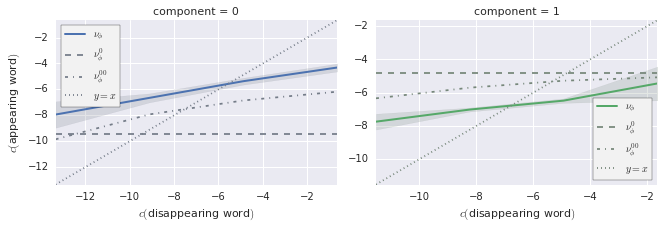

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 1997 (cluster-unique) substitutions, but the PCA is in fact computed on 1593 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
   ** global -> sentence-relative


  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
   ** global -> global


   ** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global


  ns. global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency


   ** global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> letters_count
    * global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count


    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency


   ** global -> global
    * global -> sentence-relative
   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global
  ns. global -> sentence-relative


   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
   ** global -> global
    * global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global


    * sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


   ** global -> global
    * global -> sentence-relative
  *** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> aoa


  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

-> letters_count


    * global -> global
    * global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> orthographic_density


    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global
    * global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 1252 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.05367859970013833

intercept                      5.645553
global_aoa                     0.020143
global_clustering             -0.046880
global_frequency               0.301073
global_letters_count          -0.004174
global_orthographic_density   -0.042994
global_synonyms_count         -0.003118
dtype: float64

Regressing global frequency with 1252 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.07162082588086482

intercept                                              14.913863
global_aoa                                             -0.177650
global_clustering                                       1.138055
global_frequency                                        0.293024
global_letters_count                                   -1.451809
global_orthographic_density                            -1.319885
glo

Regressing rel frequency with 1252 measures, no interactions
           ^^^^^^^^^^^^^
R^2 = 0.20770147847893383

intercept                  -1.739501
rel_aoa                     0.028586
rel_clustering              0.052020
rel_frequency               0.567682
rel_letters_count          -0.099409
rel_orthographic_density   -0.207653
rel_synonyms_count          0.042975
dtype: float64

Regressing rel frequency with 1252 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.22771454793584833

intercept                                       -1.794830
rel_aoa                                         -0.028516
rel_clustering                                   0.059185
rel_frequency                                    0.617635
rel_letters_count                               -0.027775
rel_orthographic_density                        -0.445561
rel_synonyms_count                               0.383927
rel_aoa * rel_clustering                        -0.040412
rel_aoa * rel_frequency          

Regressing rel frequency with 1252 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.34167768233910034

intercept                                                 2.085410
global_aoa                                               -0.151467
global_clustering                                        -2.785073
global_frequency                                         -0.834751
global_letters_count                                     -2.708537
global_orthographic_density                               2.627773
global_synonyms_count                                     0.105439
rel_aoa                                                   0.654115
rel_clustering                                            6.029333
rel_frequency                                             1.579673
rel_letters_count                                         2.025715
rel_orthographic_density                                 -0.652355
rel_synonyms_count                                        1.998997
global_aoa * g

Regressing global aoa with 1140 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.04849029528679849

intercept                                        6.767780
rel_aoa                                         -0.127494
rel_clustering                                  -0.138754
rel_frequency                                    0.003488
rel_letters_count                               -0.114101
rel_orthographic_density                        -0.476009
rel_synonyms_count                              -0.487619
rel_aoa * rel_clustering                        -0.088316
rel_aoa * rel_frequency                         -0.063481
rel_aoa * rel_letters_count                      0.036114
rel_aoa * rel_orthographic_density               0.050144
rel_aoa * rel_synonyms_count                     0.081149
rel_clustering * rel_frequency                   0.066610
rel_clustering * rel_letters_count               0.264484
rel_clustering * rel_orthographic_density        0.026109
rel_clustering * rel_

Regressing rel aoa with 1140 measures, with interactions
           ^^^^^^^
R^2 = 0.22420129137812372

intercept                                                -1.792746
global_aoa                                                0.413379
global_clustering                                        -1.035502
global_frequency                                          1.485787
global_letters_count                                     -0.126866
global_orthographic_density                              -7.791769
global_synonyms_count                                    -7.707985
rel_aoa                                                   0.909497
rel_clustering                                           -1.613968
rel_frequency                                            -0.262197
rel_letters_count                                         1.912131
rel_orthographic_density                                  8.372716
rel_synonyms_count                                        3.236945
global_aoa * global_cluste

Regressing global clustering with 1016 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.020387249958678244

intercept                                       -5.839126
rel_aoa                                         -0.019368
rel_clustering                                   0.007920
rel_frequency                                   -0.014252
rel_letters_count                               -0.007094
rel_orthographic_density                         0.024021
rel_synonyms_count                              -0.083642
rel_aoa * rel_clustering                        -0.013711
rel_aoa * rel_frequency                         -0.011379
rel_aoa * rel_letters_count                     -0.008646
rel_aoa * rel_orthographic_density              -0.012993
rel_aoa * rel_synonyms_count                    -0.022632
rel_clustering * rel_frequency                  -0.001778
rel_clustering * rel_letters_count               0.036330
rel_clustering * rel_orthographic_density        0.028778
rel_cl

Regressing rel clustering with 1016 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.24707315015175457

intercept                                                 9.009966
global_aoa                                                0.227410
global_clustering                                         1.604903
global_frequency                                         -0.962027
global_letters_count                                      0.580042
global_orthographic_density                              -1.513621
global_synonyms_count                                    -2.381031
rel_aoa                                                   0.044503
rel_clustering                                           -2.477924
rel_frequency                                             0.203649
rel_letters_count                                        -0.509554
rel_orthographic_density                                  1.720103
rel_synonyms_count                                        1.360943
global_aoa *

Regressing global letters_count with 1252 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.05286001854413769

intercept                                        5.861659
rel_aoa                                         -0.076846
rel_clustering                                  -0.097368
rel_frequency                                    0.047657
rel_letters_count                                0.172512
rel_orthographic_density                        -0.357091
rel_synonyms_count                              -0.722606
rel_aoa * rel_clustering                         0.062361
rel_aoa * rel_frequency                         -0.015186
rel_aoa * rel_letters_count                     -0.009655
rel_aoa * rel_orthographic_density              -0.005464
rel_aoa * rel_synonyms_count                    -0.094103
rel_clustering * rel_frequency                  -0.021236
rel_clustering * rel_letters_count               0.072500
rel_clustering * rel_orthographic_density        0.072326
r

Regressing rel letters_count with 1252 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.19686005441809137

intercept                                                 5.235964
global_aoa                                                1.145218
global_clustering                                         0.878797
global_frequency                                          0.043550
global_letters_count                                     -1.878417
global_orthographic_density                              -1.185361
global_synonyms_count                                     1.549768
rel_aoa                                                  -1.056842
rel_clustering                                           -7.812117
rel_frequency                                             0.935362
rel_letters_count                                         2.359539
rel_orthographic_density                                 -2.806650
rel_synonyms_count                                       -1.039247
global

Regressing global synonyms_count with 1208 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.03121855676622376

intercept                                        0.392650
rel_aoa                                         -0.024783
rel_clustering                                  -0.099422
rel_frequency                                    0.004745
rel_letters_count                                0.010169
rel_orthographic_density                         0.060106
rel_synonyms_count                               0.104065
rel_aoa * rel_clustering                        -0.018616
rel_aoa * rel_frequency                         -0.011790
rel_aoa * rel_letters_count                     -0.004745
rel_aoa * rel_orthographic_density              -0.011163
rel_aoa * rel_synonyms_count                     0.008369
rel_clustering * rel_frequency                  -0.002809
rel_clustering * rel_letters_count               0.012828
rel_clustering * rel_orthographic_density       -0.077345

Regressing rel synonyms_count with 1208 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.2015881280647186

intercept                                                 3.523855
global_aoa                                               -0.237607
global_clustering                                         0.855324
global_frequency                                         -0.322213
global_letters_count                                      0.270809
global_orthographic_density                               0.856594
global_synonyms_count                                     0.535113
rel_aoa                                                   0.045623
rel_clustering                                           -0.230813
rel_frequency                                            -0.253850
rel_letters_count                                        -0.382002
rel_orthographic_density                                 -0.885652
rel_synonyms_count                                       -1.597514
globa

Regressing global orthographic_density with 1024 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.06524061815991655

intercept                                        1.504088
rel_aoa                                          0.072993
rel_clustering                                   0.017339
rel_frequency                                   -0.035321
rel_letters_count                                0.015416
rel_orthographic_density                         0.338535
rel_synonyms_count                               0.294072
rel_aoa * rel_clustering                         0.029319
rel_aoa * rel_frequency                          0.020794
rel_aoa * rel_letters_count                      0.000668
rel_aoa * rel_orthographic_density               0.021407
rel_aoa * rel_synonyms_count                     0.061464
rel_clustering * rel_frequency                  -0.017206
rel_clustering * rel_letters_count              -0.021965
rel_clustering * rel_orthographic_density    

Regressing rel orthographic_density with 1024 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.1674910364660085

intercept                                                 2.201952
global_aoa                                               -0.536444
global_clustering                                         0.087523
global_frequency                                          0.189497
global_letters_count                                     -0.020128
global_orthographic_density                              -0.302916
global_synonyms_count                                     1.777373
rel_aoa                                                   0.253022
rel_clustering                                            1.525721
rel_frequency                                            -0.105200
rel_letters_count                                        -0.206647
rel_orthographic_density                                  1.056459
rel_synonyms_count                                        0.